# Stock Trading using Actor Critic Model



In [1]:
#imports
import pandas as pd
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

#for the trading environment
import gym
from gym import error, spaces, utils
from gym.utils import seeding

#for the models
import tensorflow as tf
import tensorflow.keras.layers as kl
import tensorflow.keras.backend as K
import tensorflow.keras.losses as kls

from src.gym_pairs_trading import PairsTradingEnvV2

In [2]:
print(tf.__version__)

2.0.0


## Data Collection

## Data cleaning

In [3]:
from src.gym_pairs_trading.envs.data_source import DataSource

ds = DataSource("AAPL", "MSFT", size='compact')
df = pd.DataFrame(columns=["Date", "S1 Close", "S2 Close", "S1 Change", "S2 Change"])

for date, data in ds:
    df = df.append({
     "Date": date,
     "S1 Close":  data[0],
     "S2 Close":  data[1],
     "S1 Change":  data[2],
     "S2 Change":  data[3],
      }, ignore_index=True)
    
df.head()
ds.reset()

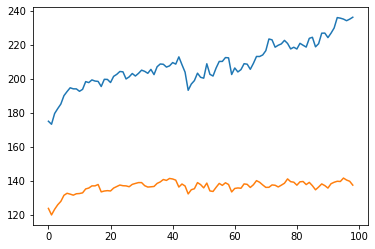

In [4]:
S1_price = df["S1 Close"]
S2_price = df["S2 Close"]
plt.plot(range(0, len(S1_price)), S1_price)
plt.plot(range(0, len(S2_price)), S2_price)

plt.show()

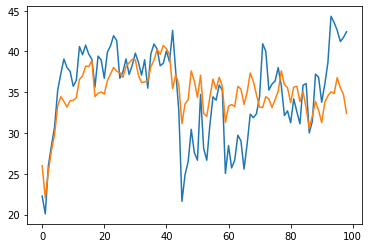

In [5]:
from scipy import signal
s1_detrend = signal.detrend(S1_price) + 35.
s2_detrend = signal.detrend(S2_price) + 35.

plt.plot(range(0, len(S1_price)), s1_detrend)
plt.plot(range(0, len(S2_price)), s2_detrend)

# Set up the environment

## Setting up the Models

In [147]:
from tensorflow.keras.models import Sequential, Model
class ActorCritic(object):
    """ActorCritic model for continous observation space, and discrete action space
    
    Arguments:
        object {[type]} -- [description]
    
    Returns:
        [type] -- [description]
    """
    def __init__(self, env, **kwargs):
        self.env=env

        self.learning_rate = kwargs.get('learning_rate', 0.001)
        self.gamma = kwargs.get('gamma', 0.99)
    
        self.saved_actions = []
        self.saved_values = []
        self.rewards = []
        
        self.actor_model  = self._create_actor_model()
        self.critic_model = self._create_critic_model()

    def _create_actor_model(self):
        model = tf.keras.Sequential([
            kl.Dense(48, activation='relu', input_shape=self.env.observation_space.shape),
            kl.Dense(128, activation='relu'),
            kl.Dense(3, activation='softmax', name='policy_logits')
        ])
        model.compile(loss=self._actor_loss(), optimizer='adam')
        return model

    def _create_critic_model(self):
        model = tf.keras.Sequential([
            kl.Dense(48, activation='relu', input_shape=self.env.observation_space.shape),
            kl.Dense(128, activation='relu'),
            kl.Dense(1, activation='relu')
        ])
        model.compile(loss="mse", optimizer='adam')

        return model
    
    
    def evaluate_loss(self, y_true, y_pred):
        print(y_true + y_pred)
        return K.mean(y_true - )
    
    def _actor_loss(self):
        def loss(y_true,y_pred):y_pred/100
            return self.evaluate_loss(y_true, y_pred)
        return loss

    def _critic_loss(self):
        def loss(y_true,y_pred):
            return K.mean(K.square(y_pred - y_true), axis=-1)
        
        return loss

    def train(self, obs_history):
        #pv magic number
        advantages = np.array(self.rewards) - np.array(self.saved_values)
        
        #take negative since we want to minimize LOSS
        #action_loss = -1*advantages*np.array(self.saved_actions)
        y_label = []
        for adv, action in zip(advantages, np.array(self.saved_actions)):
            y_label.append([adv,adv,adv])
        
        y_label = np.array(y_label)
        self.actor_model.train_on_batch(np.array(obs_history), y_label)
        self.critic_model.train_on_batch(np.array(obs_history), self.rewards)
    
    def eval_state(self, obs):
        return self.critic_model.predict(obs[None, :])
    
    def predict_action(self, obs):
        logits = self.actor_model.predict(obs[None, :])
        return logits[0]
    
    def predict(self,obs):
        return self.eval_state(obs), self.predict_action(obs)
    
    def reset(self):
        self.saved_actions = []
        self.saved_values = []
        self.rewards = []

In [148]:
env = PairsTradingEnvV2("AAPL","MSFT")
model = ActorCritic(env)

Tensor("loss_83/policy_logits_loss/add:0", shape=(None, 3), dtype=float32)


Observation: Changes 1, Changes 2, Spread

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.32121128 0.32124662 0.32058313]
 [0.33129233 0.3308067  0.33035007]
 [0.34753045 0.34837857 0.347438  ]
 [0.33391303 0.33232826 0.33511937]
 [0.33849984 0.3376352  0.3388358 ]
 [0.3468873  0.34639844 0.34804645]
 [0.32832733 0.327794   0.32828224]
 [0.3280115  0.32812217 0.3279987 ]
 [0.34837213 0.3476222  0.34711266]
 [0.3575496  0.3575422  0.3581503 ]
 [0.34803358 0.34564424 0.35009578]
 [0.34500614 0.34391034 0.3458415 ]
 [0.33193535 0.3321219  0.33239707]
 [0.31992602 0.31978738 0.31979397]], shape=(14, 3), dtype=float32)


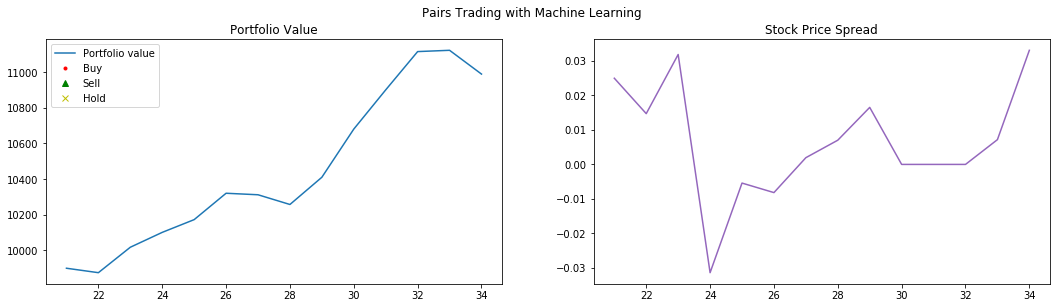

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22214717 0.22218251 0.22151902]
 [0.3236564  0.32317078 0.32271415]
 [0.3394103  0.34025842 0.33931786]
 [0.32263535 0.32105058 0.3238417 ]
 [0.32874137 0.3278767  0.3290773 ]
 [0.3361527  0.33566386 0.33731186]
 [0.3161923  0.31565896 0.3161472 ]
 [0.31972405 0.3198347  0.31971124]
 [0.33889472 0.33814478 0.33763525]
 [0.34775844 0.34775102 0.34835914]
 [0.33662048 0.33423114 0.33868268]
 [0.33302155 0.33192575 0.3338569 ]
 [0.32154518 0.32173175 0.3220069 ]
 [0.3098994  0.30976075 0.30976734]], shape=(14, 3), dtype=float32)


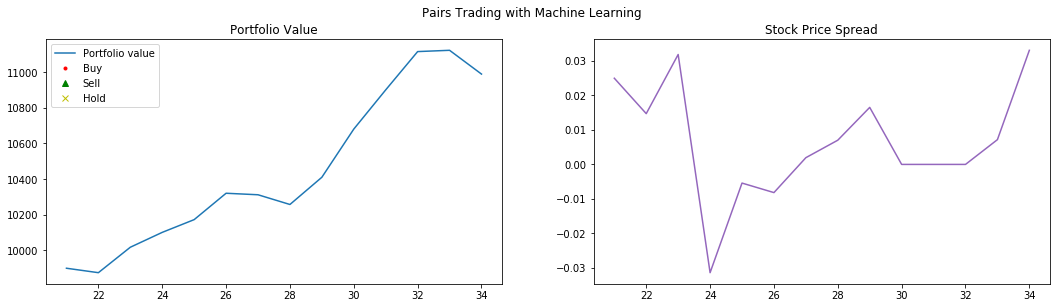

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22446054 0.22449589 0.2238324 ]
 [0.32963446 0.32914883 0.3286922 ]
 [0.34318963 0.34403774 0.34309718]
 [0.32560298 0.3240182  0.32680932]
 [0.32984433 0.32897967 0.3301803 ]
 [0.3379654  0.33747655 0.33912456]
 [0.31736097 0.31682763 0.31731588]
 [0.32341906 0.32352972 0.32340625]
 [0.34210467 0.34135473 0.3408452 ]
 [0.35039052 0.3503831  0.35099122]
 [0.33816016 0.3357708  0.34022236]
 [0.3334606  0.3323648  0.33429596]
 [0.32267717 0.32286373 0.3231389 ]
 [0.31233725 0.3121986  0.3122052 ]], shape=(14, 3), dtype=float32)


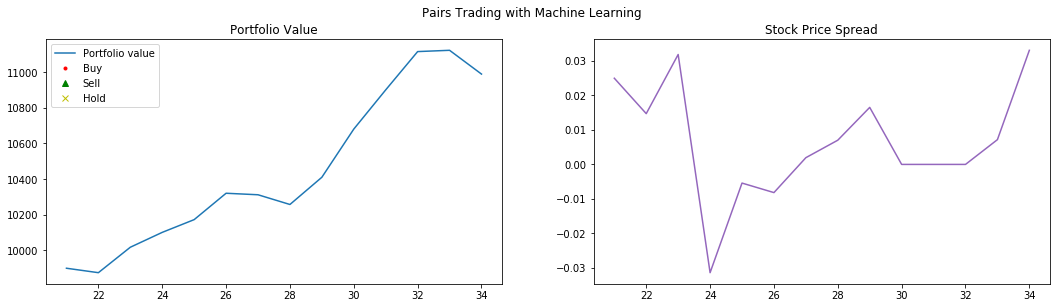

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22892801 0.22896336 0.22829987]
 [0.33129233 0.3308067  0.33035007]
 [0.34753045 0.34837857 0.347438  ]
 [0.33063248 0.32904774 0.33183882]
 [0.33272603 0.33186138 0.333062  ]
 [0.34130242 0.34081358 0.3424616 ]
 [0.32003832 0.31950498 0.31999323]
 [0.3280115  0.32812217 0.3279987 ]
 [0.34741235 0.3466624  0.34615287]
 [0.3544247  0.35441726 0.35502538]
 [0.34106597 0.33867663 0.34312817]
 [0.33626014 0.33516434 0.3370955 ]
 [0.32618508 0.32637164 0.3266468 ]
 [0.31689683 0.3167582  0.31676477]], shape=(14, 3), dtype=float32)


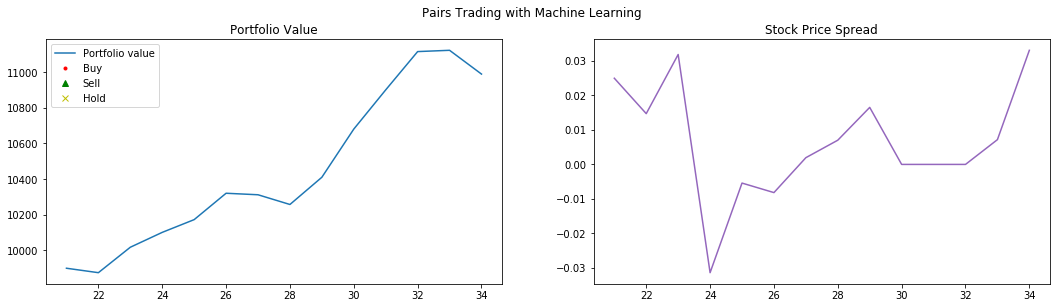

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.23179466 0.23182997 0.23116648]
 [0.33129233 0.3308067  0.33035007]
 [0.34753045 0.34837857 0.347438  ]
 [0.3334388  0.33185408 0.33464515]
 [0.3342694  0.33340475 0.33460537]
 [0.34310913 0.34262028 0.3442683 ]
 [0.32095066 0.3204173  0.32090557]
 [0.32801154 0.3281222  0.3279987 ]
 [0.348893   0.34814304 0.3476335 ]
 [0.35651574 0.3565083  0.35711643]
 [0.34212178 0.33973244 0.34418398]
 [0.33713943 0.33604363 0.3379748 ]
 [0.32825753 0.3284441  0.32871926]
 [0.3200964  0.31995776 0.31996435]], shape=(14, 3), dtype=float32)


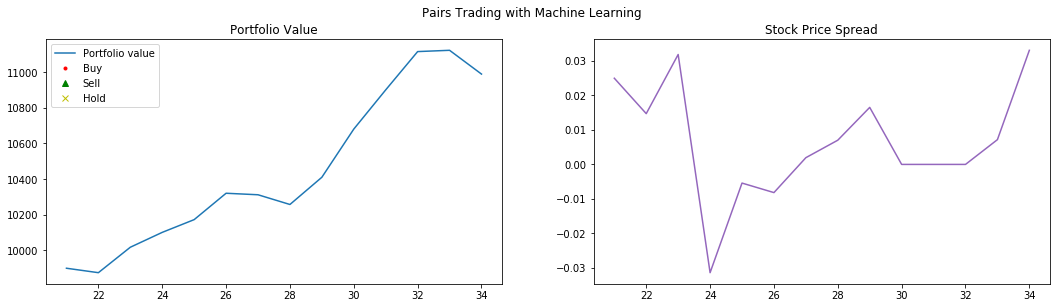

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.23237032 0.23240563 0.23174214]
 [0.33129233 0.3308067  0.33035004]
 [0.34753045 0.34837857 0.347438  ]
 [0.33402988 0.33244514 0.33523622]
 [0.3340585  0.33319384 0.33439445]
 [0.34311813 0.3426293  0.3442773 ]
 [0.3200976  0.31956425 0.3200525 ]
 [0.32801154 0.3281222  0.3279987 ]
 [0.348893   0.34814304 0.3476335 ]
 [0.35690722 0.3568998  0.3575079 ]
 [0.34162113 0.3392318  0.34368333]
 [0.33596483 0.33486903 0.3368002 ]
 [0.32831952 0.3285061  0.32878125]
 [0.32083207 0.32069343 0.32070002]], shape=(14, 3), dtype=float32)


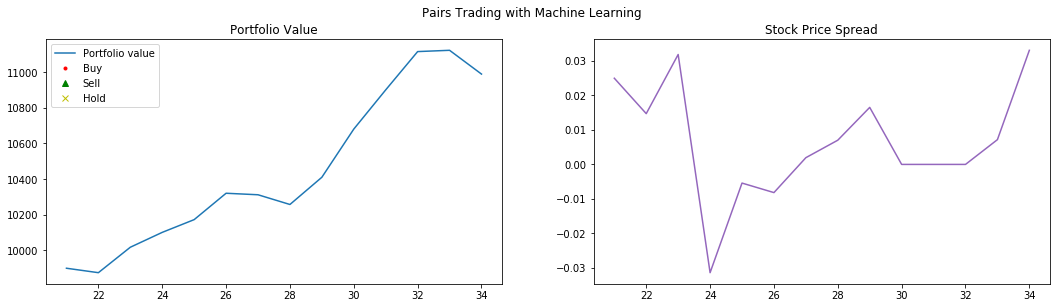

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.23105735 0.23109266 0.23042917]
 [0.33129233 0.3308067  0.33035004]
 [0.34753045 0.34837857 0.347438  ]
 [0.33261278 0.33102804 0.33381912]
 [0.33251885 0.3316542  0.3328548 ]
 [0.34152377 0.34103495 0.34268293]
 [0.31799638 0.31746304 0.31795126]
 [0.32801154 0.3281222  0.3279987 ]
 [0.348893   0.34814304 0.3476335 ]
 [0.3557093  0.3557019  0.35631   ]
 [0.33949217 0.33710283 0.34155437]
 [0.33296895 0.33187315 0.3338043 ]
 [0.3266067  0.32679328 0.32706842]
 [0.31961188 0.31947324 0.31947982]], shape=(14, 3), dtype=float32)


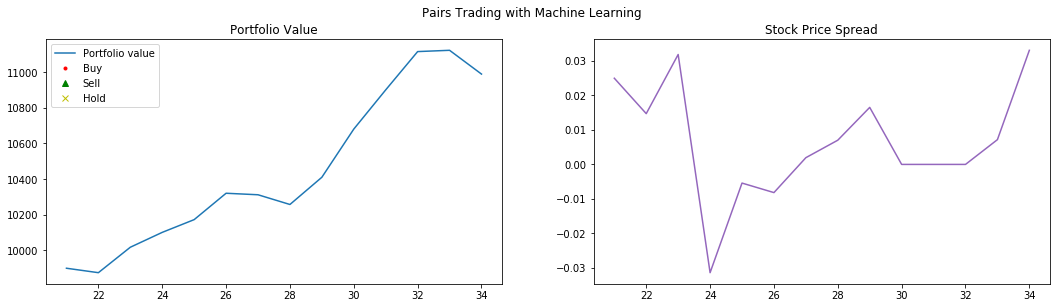

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22860658 0.2286419  0.22797841]
 [0.33129233 0.3308067  0.33035004]
 [0.34753045 0.34837857 0.347438  ]
 [0.3301143  0.32852957 0.33132064]
 [0.3302146  0.32934994 0.33055055]
 [0.33909714 0.3386083  0.34025627]
 [0.31501958 0.31448624 0.3149745 ]
 [0.32801154 0.3281222  0.3279987 ]
 [0.3484479  0.34769794 0.3471884 ]
 [0.3534221  0.35341468 0.3540228 ]
 [0.33652946 0.33414012 0.33859167]
 [0.32905075 0.32795495 0.3298861 ]
 [0.3238456  0.3240322  0.32430732]
 [0.3171496  0.31701097 0.31701756]], shape=(14, 3), dtype=float32)


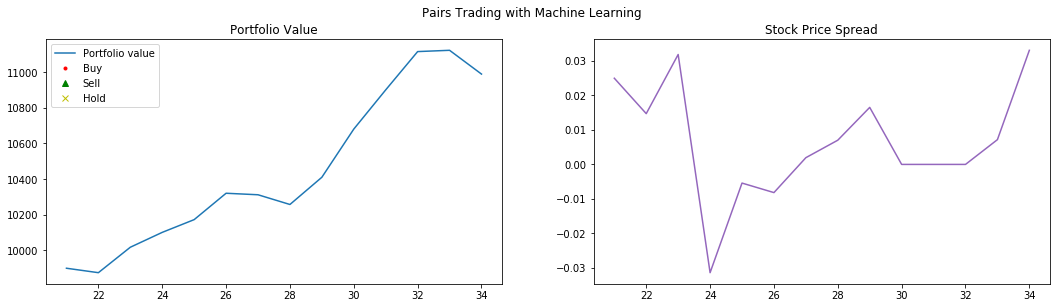

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22598635 0.22602166 0.22535817]
 [0.33129233 0.3308067  0.33035004]
 [0.34753045 0.34837857 0.347438  ]
 [0.32739937 0.32581463 0.3286057 ]
 [0.3280189  0.32715425 0.32835487]
 [0.33664057 0.33615172 0.3377997 ]
 [0.3119696  0.31143627 0.31192452]
 [0.32801154 0.3281222  0.3279987 ]
 [0.34601927 0.34526932 0.34475976]
 [0.35099745 0.35099003 0.35159814]
 [0.33348075 0.3310914  0.33554295]
 [0.32549885 0.32440305 0.3263342 ]
 [0.3210805  0.3212671  0.32154223]
 [0.31460577 0.31446713 0.31447372]], shape=(14, 3), dtype=float32)


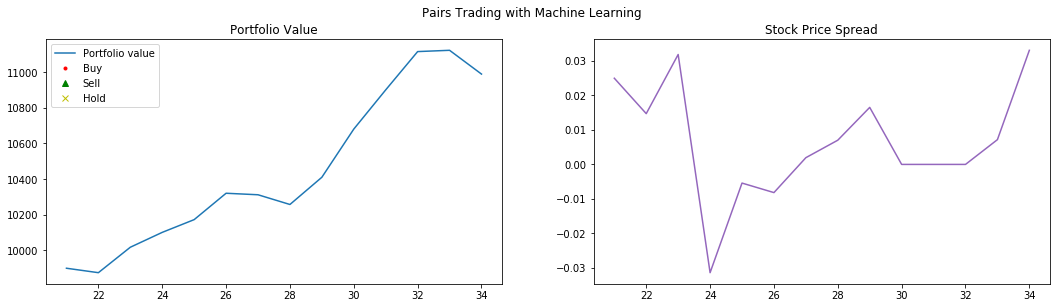

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22433338 0.22436869 0.2237052 ]
 [0.33129233 0.3308067  0.33035004]
 [0.34753045 0.34837857 0.347438  ]
 [0.32543412 0.32384938 0.32664046]
 [0.3268813  0.32601663 0.32721725]
 [0.33506957 0.33458072 0.3362287 ]
 [0.30981714 0.3092838  0.30977204]
 [0.32707822 0.32718888 0.32706538]
 [0.34456348 0.34381354 0.34330398]
 [0.34932476 0.3493173  0.3499254 ]
 [0.33130497 0.32891566 0.33336717]
 [0.32292557 0.3218298  0.32376093]
 [0.3193036  0.3194902  0.31976533]
 [0.31303552 0.31289688 0.31290346]], shape=(14, 3), dtype=float32)


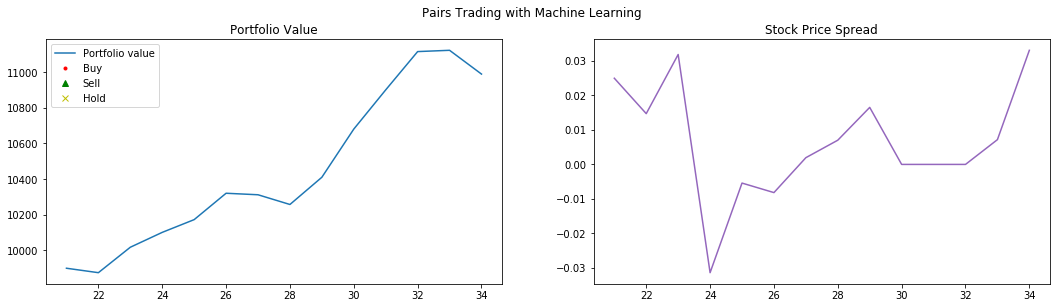

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22451828 0.2245536  0.22389011]
 [0.33129233 0.3308067  0.33035004]
 [0.34753045 0.34837857 0.347438  ]
 [0.3250904  0.32350567 0.32629675]
 [0.32729802 0.32643336 0.32763398]
 [0.33500615 0.3345173  0.33616528]
 [0.3092219  0.30868855 0.3091768 ]
 [0.32747695 0.3275876  0.3274641 ]
 [0.3449093  0.34415936 0.3436498 ]
 [0.34911755 0.3491101  0.3497182 ]
 [0.3306437  0.32825437 0.33270591]
 [0.32219112 0.32109532 0.32302648]
 [0.31917444 0.31936103 0.31963617]
 [0.31326053 0.31312189 0.31312847]], shape=(14, 3), dtype=float32)


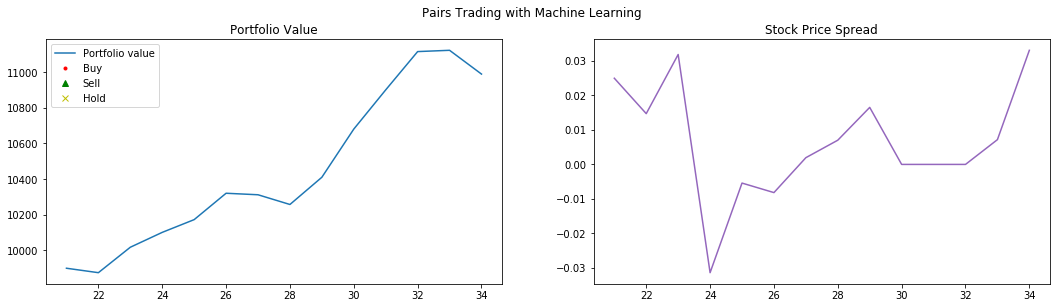

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22619662 0.22623193 0.22556844]
 [0.33129233 0.3308067  0.33035004]
 [0.34753045 0.34837857 0.34743798]
 [0.32609022 0.32450548 0.32729656]
 [0.32895017 0.3280855  0.32928613]
 [0.33627898 0.33579013 0.3374381 ]
 [0.3099023  0.30936897 0.30985722]
 [0.32801154 0.3281222  0.3279987 ]
 [0.34668016 0.34593022 0.34542066]
 [0.35029736 0.3502899  0.35089803]
 [0.331318   0.32892865 0.3333802 ]
 [0.32308105 0.32198524 0.3239164 ]
 [0.3204826  0.3206692  0.32094434]
 [0.31499308 0.31485444 0.31486103]], shape=(14, 3), dtype=float32)


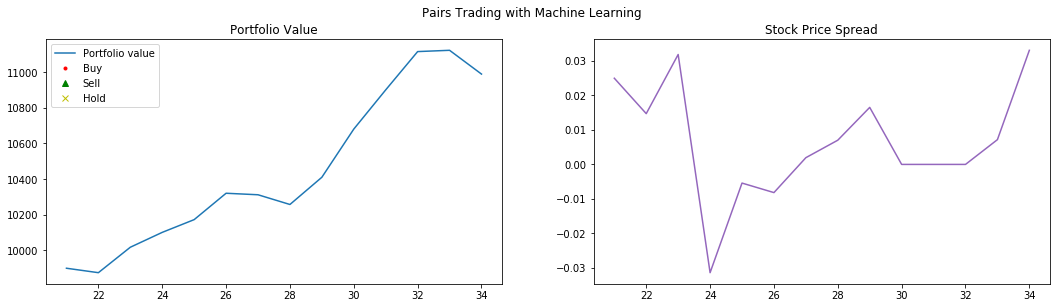

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22857693 0.22861224 0.22794876]
 [0.33129233 0.3308067  0.33035004]
 [0.34753045 0.34837857 0.34743798]
 [0.3278197  0.32623497 0.32902604]
 [0.33118778 0.33032313 0.33152375]
 [0.3383554  0.33786654 0.33951452]
 [0.31129012 0.31075677 0.31124502]
 [0.32801154 0.3281222  0.3279987 ]
 [0.348893   0.34814304 0.34763348]
 [0.35214293 0.35213548 0.3527436 ]
 [0.33265325 0.3302639  0.33471546]
 [0.32477987 0.32368407 0.32561523]
 [0.32267553 0.3228621  0.32313722]
 [0.3174297  0.31729105 0.31729764]], shape=(14, 3), dtype=float32)


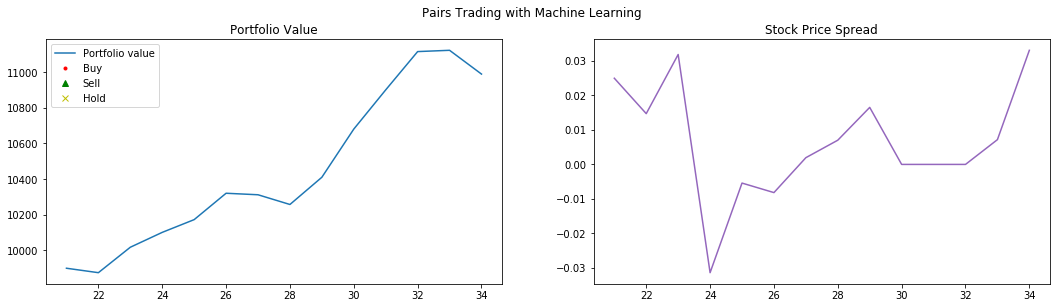

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.23057866 0.23061398 0.22995049]
 [0.33129233 0.3308067  0.33035004]
 [0.34753045 0.34837857 0.34743798]
 [0.32938638 0.32780164 0.33059272]
 [0.3331281  0.33226344 0.33346406]
 [0.34015828 0.33966944 0.34131742]
 [0.31252524 0.3119919  0.31248015]
 [0.32801154 0.3281222  0.3279987 ]
 [0.348893   0.34814304 0.34763345]
 [0.35369173 0.35368428 0.3542924 ]
 [0.33382726 0.33143792 0.33588946]
 [0.3264705  0.3253747  0.32730585]
 [0.3246494  0.32483596 0.3251111 ]
 [0.31948942 0.31935078 0.31935737]], shape=(14, 3), dtype=float32)


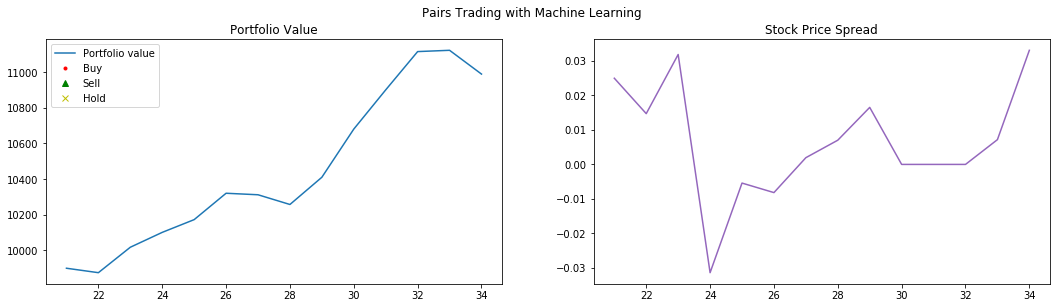

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.23165083 0.23168615 0.23102266]
 [0.33129233 0.3308067  0.33035004]
 [0.34753045 0.34837857 0.34743798]
 [0.33020285 0.3286181  0.3314092 ]
 [0.33430067 0.33343598 0.3346366 ]
 [0.3412036  0.34071475 0.34236273]
 [0.31324524 0.3127119  0.31320018]
 [0.32801154 0.3281222  0.3279987 ]
 [0.348893   0.34814304 0.34763345]
 [0.3543666  0.35435915 0.35496727]
 [0.33442828 0.33203894 0.33649048]
 [0.32765132 0.32655552 0.32848668]
 [0.32572958 0.32591614 0.32619128]
 [0.320577   0.32043833 0.32044494]], shape=(14, 3), dtype=float32)


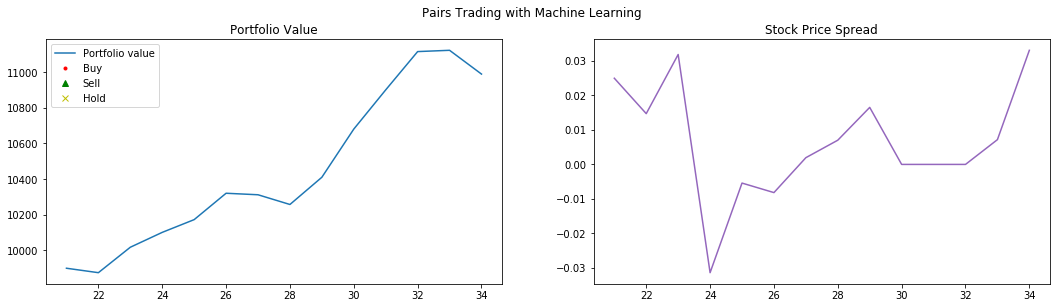

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.23151582 0.23155114 0.23088765]
 [0.33129233 0.3308067  0.33035004]
 [0.34753045 0.34837857 0.34743798]
 [0.32997265 0.32838792 0.331179  ]
 [0.33462656 0.33376187 0.3349625 ]
 [0.34124398 0.34075513 0.3424031 ]
 [0.31326696 0.31273362 0.31322187]
 [0.32801154 0.3281222  0.3279987 ]
 [0.34889302 0.34814307 0.34763348]
 [0.35396674 0.3539593  0.3545674 ]
 [0.33433673 0.3319474  0.33639893]
 [0.32810786 0.32701206 0.32894322]
 [0.32571894 0.3259055  0.32618064]
 [0.32049406 0.32035542 0.320362  ]], shape=(14, 3), dtype=float32)


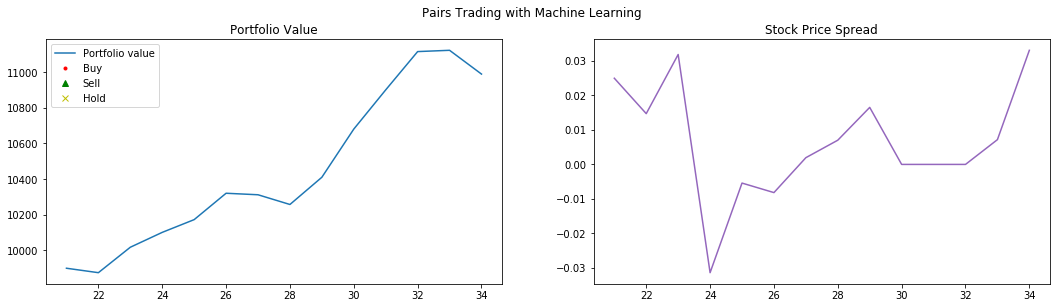

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.23040476 0.23044008 0.22977659]
 [0.33129233 0.3308067  0.33035004]
 [0.34753045 0.34837857 0.34743798]
 [0.32885104 0.3272663  0.33005738]
 [0.334244   0.33337933 0.33457994]
 [0.34042856 0.3399397  0.3415877 ]
 [0.31265125 0.3121179  0.31260616]
 [0.32801154 0.3281222  0.3279987 ]
 [0.34889302 0.34814307 0.34763348]
 [0.35264057 0.35263312 0.35324124]
 [0.33359104 0.3312017  0.33565325]
 [0.32790703 0.32681122 0.32874238]
 [0.32476017 0.32494673 0.32522187]
 [0.31943431 0.31929564 0.31930226]], shape=(14, 3), dtype=float32)


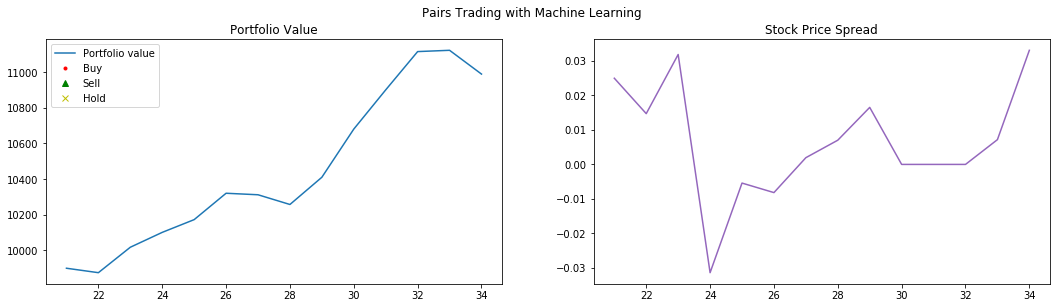

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22868136 0.22871667 0.22805318]
 [0.3312923  0.3308067  0.33035   ]
 [0.34753045 0.34837857 0.34743798]
 [0.32722765 0.3256429  0.328434  ]
 [0.33333525 0.33247057 0.33367118]
 [0.33903116 0.3385423  0.3401903 ]
 [0.3116335  0.31110016 0.3115884 ]
 [0.32801154 0.3281222  0.3279987 ]
 [0.34889302 0.34814307 0.34763348]
 [0.3508458  0.35083836 0.35144648]
 [0.332442   0.33005264 0.3345042 ]
 [0.32726544 0.32616964 0.3281008 ]
 [0.32323727 0.32342383 0.32369897]
 [0.31776926 0.3176306  0.3176372 ]], shape=(14, 3), dtype=float32)


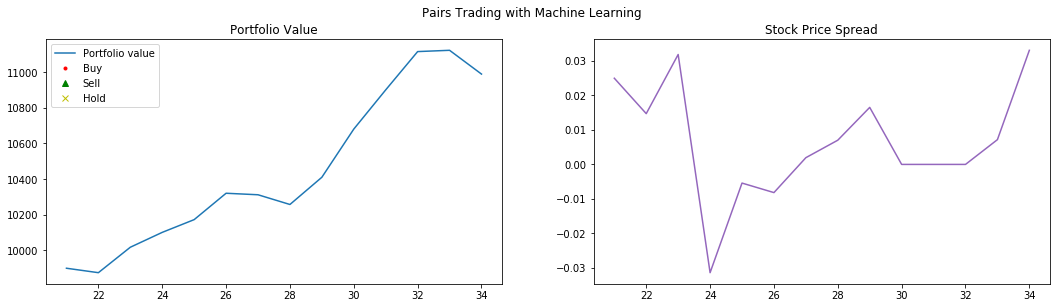

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2269052  0.22694051 0.22627702]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.32559106 0.32400632 0.3267974 ]
 [0.3323117  0.331447   0.33264762]
 [0.33751002 0.33702117 0.33866915]
 [0.31053704 0.3100037  0.31049195]
 [0.32801154 0.3281222  0.3279987 ]
 [0.34729484 0.3465449  0.3460353 ]
 [0.34901062 0.34900317 0.34961128]
 [0.3313276  0.32893825 0.3333898 ]
 [0.3265711  0.32547534 0.32740647]
 [0.32178327 0.32196984 0.32224497]
 [0.31601077 0.3158721  0.31587872]], shape=(14, 3), dtype=float32)


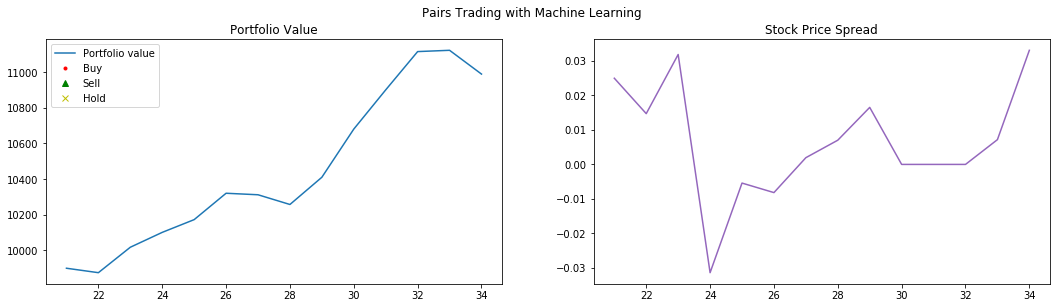

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22586034 0.22589566 0.22523217]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.3246647  0.32307997 0.32587105]
 [0.33181688 0.3309522  0.3321528 ]
 [0.3366793  0.33619046 0.33783844]
 [0.31002086 0.30948752 0.30997577]
 [0.32801154 0.3281222  0.3279987 ]
 [0.34624407 0.34549412 0.34498453]
 [0.3479106  0.34790316 0.34851128]
 [0.33078757 0.32839823 0.33284977]
 [0.32645795 0.32536215 0.3272933 ]
 [0.32107046 0.32125703 0.32153216]
 [0.31497517 0.3148365  0.31484312]], shape=(14, 3), dtype=float32)


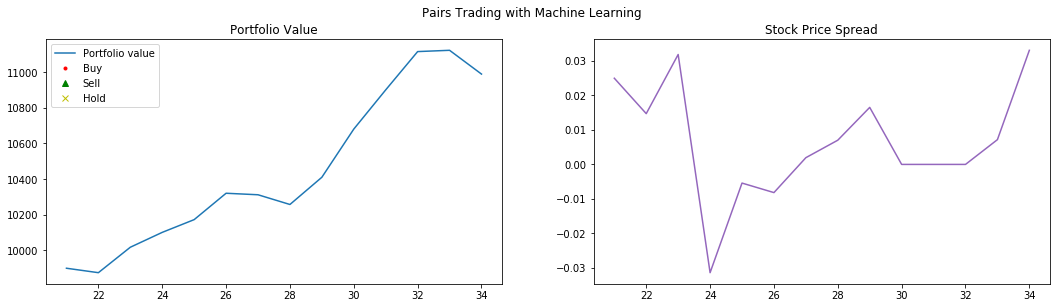

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22579958 0.22583489 0.2251714 ]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.3246758  0.32309106 0.32588214]
 [0.33206818 0.3312035  0.3324041 ]
 [0.33675548 0.33626664 0.33791462]
 [0.31029272 0.30975938 0.31024766]
 [0.32801154 0.3281222  0.3279987 ]
 [0.34617236 0.34542242 0.34491283]
 [0.34773085 0.3477234  0.3483315 ]
 [0.33103752 0.32864818 0.33309972]
 [0.32714474 0.32604894 0.3279801 ]
 [0.32120374 0.3213903  0.32166544]
 [0.31491873 0.31478006 0.31478667]], shape=(14, 3), dtype=float32)


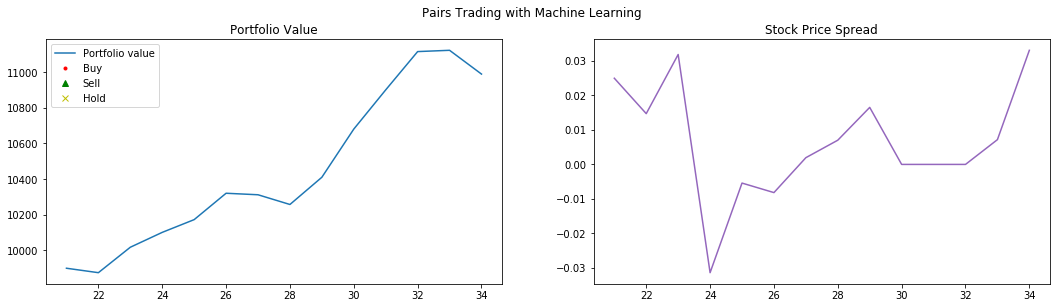

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22656704 0.22660236 0.22593887]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.32548678 0.32390204 0.32669312]
 [0.33292842 0.33206373 0.33326435]
 [0.3375405  0.33705166 0.33869964]
 [0.3112097  0.31067637 0.31116462]
 [0.32801154 0.3281222  0.3279987 ]
 [0.34692678 0.34617683 0.34566724]
 [0.34829426 0.34828678 0.3488949 ]
 [0.33195573 0.3295664  0.33401793]
 [0.3285184  0.3274226  0.32935375]
 [0.32203332 0.32221988 0.322495  ]
 [0.3156739  0.31553525 0.31554186]], shape=(14, 3), dtype=float32)


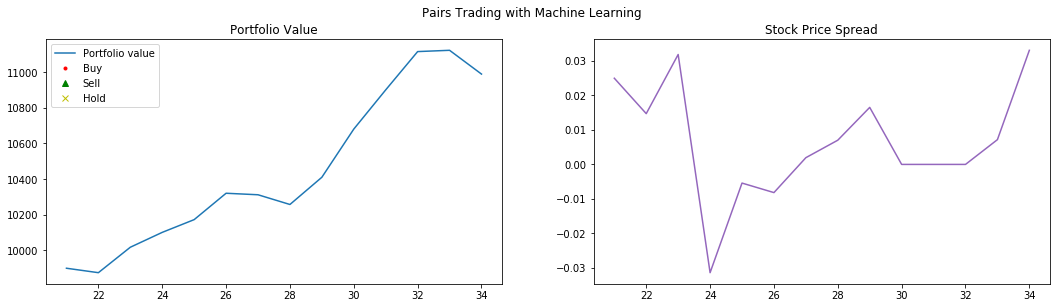

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22777297 0.22780828 0.2271448 ]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.3266886  0.32510385 0.32789493]
 [0.33401802 0.33315334 0.33435395]
 [0.33865947 0.33817062 0.3398186 ]
 [0.3124745  0.31194115 0.3124294 ]
 [0.32801154 0.3281222  0.3279987 ]
 [0.3481151  0.34736514 0.34685555]
 [0.3492525  0.349245   0.34985313]
 [0.3331921  0.33080277 0.3352543 ]
 [0.33022174 0.32912594 0.3310571 ]
 [0.32320863 0.3233952  0.32367033]
 [0.31687102 0.31673235 0.31673896]], shape=(14, 3), dtype=float32)


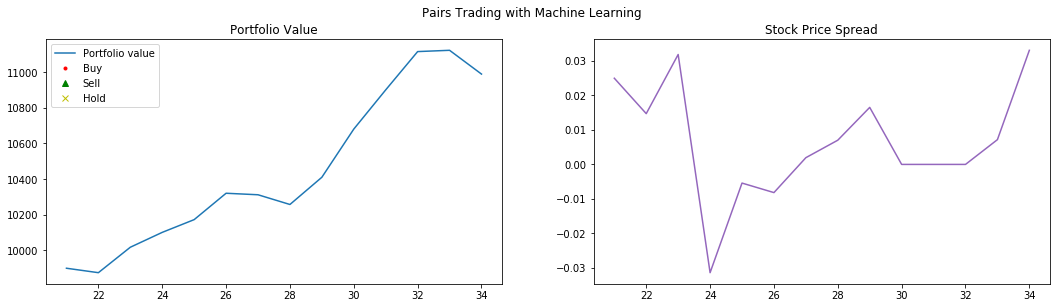

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22892761 0.22896293 0.22829944]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.32780406 0.32621932 0.3290104 ]
 [0.3349712  0.3341065  0.33530712]
 [0.33971587 0.33922702 0.340875  ]
 [0.31364894 0.3131156  0.31360385]
 [0.32801157 0.3281222  0.3279987 ]
 [0.34889302 0.34814307 0.34763348]
 [0.35016763 0.35016015 0.35076827]
 [0.33432648 0.33193713 0.33638868]
 [0.33177745 0.33068165 0.3326128 ]
 [0.3243009  0.32448745 0.32476258]
 [0.31802374 0.31788507 0.3178917 ]], shape=(14, 3), dtype=float32)


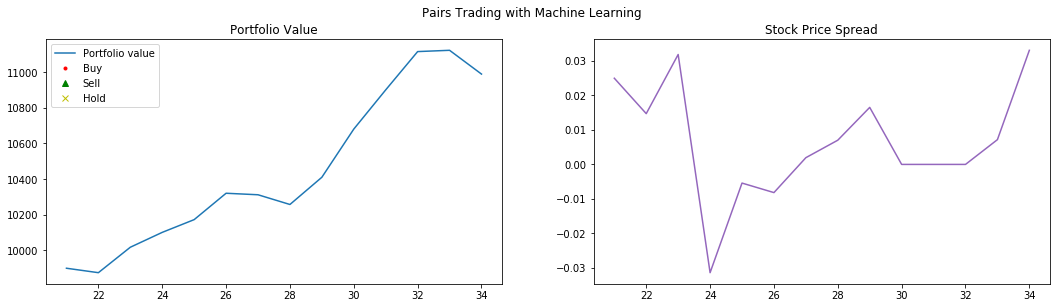

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22937539 0.22941071 0.22874722]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.32823762 0.32665288 0.32944396]
 [0.33532575 0.33446106 0.33566168]
 [0.3401485  0.33965966 0.34130764]
 [0.3141951  0.31366175 0.31415   ]
 [0.32801157 0.3281222  0.3279987 ]
 [0.34889302 0.34814307 0.34763348]
 [0.3504822  0.35047472 0.35108283]
 [0.3348424  0.33245307 0.33690462]
 [0.33263597 0.33154017 0.33347133]
 [0.32470027 0.32488683 0.32516196]
 [0.31847224 0.31833357 0.31834018]], shape=(14, 3), dtype=float32)


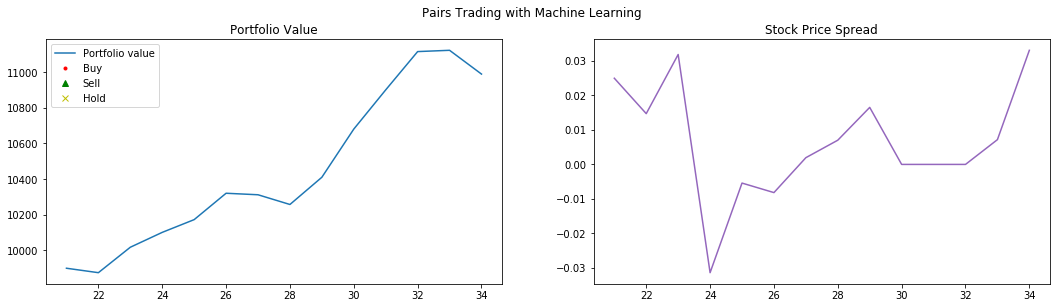

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22902444 0.22905976 0.22839627]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.32792222 0.32633752 0.32912856]
 [0.33496615 0.33410147 0.33530208]
 [0.33982283 0.33933398 0.34098196]
 [0.3140062  0.31347287 0.31396112]
 [0.32801157 0.3281222  0.3279987 ]
 [0.34889302 0.34814307 0.34763348]
 [0.35006958 0.3500621  0.35067022]
 [0.33462757 0.33223823 0.33668977]
 [0.33269495 0.33159912 0.33353028]
 [0.32433242 0.32451898 0.3247941 ]
 [0.3181277  0.31798902 0.31799564]], shape=(14, 3), dtype=float32)


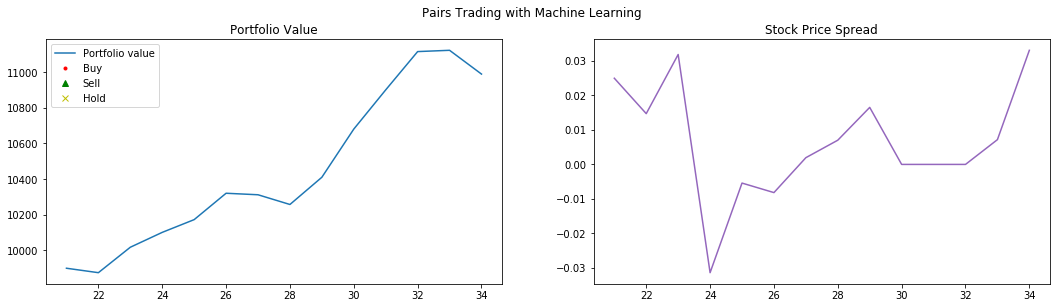

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22804657 0.22808188 0.2274184 ]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.32701874 0.325434   0.32822508]
 [0.33407095 0.33320627 0.33440688]
 [0.3388859  0.33839706 0.34004503]
 [0.3132372  0.31270385 0.3131921 ]
 [0.32801157 0.3281222  0.3279987 ]
 [0.3483153  0.34756535 0.34705573]
 [0.34908527 0.34907782 0.3496859 ]
 [0.33383283 0.3314435  0.33589503]
 [0.33211654 0.3310207  0.33295187]
 [0.32335263 0.3235392  0.32381433]
 [0.31713945 0.31700078 0.3170074 ]], shape=(14, 3), dtype=float32)


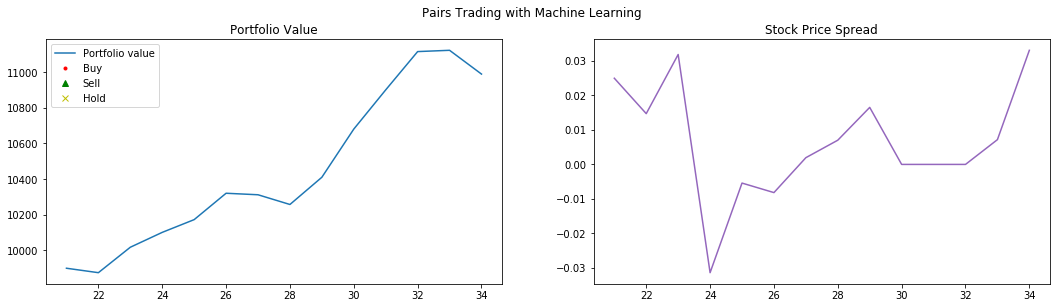

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22704856 0.22708388 0.22642039]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.3260526  0.32446787 0.32725894]
 [0.33314914 0.33228445 0.33348507]
 [0.33791658 0.33742774 0.3390757 ]
 [0.31236646 0.3118331  0.31232136]
 [0.32801157 0.3281222  0.3279987 ]
 [0.34736356 0.34661362 0.346104  ]
 [0.34806314 0.34805566 0.34866378]
 [0.3329622  0.33057284 0.3350244 ]
 [0.33139858 0.33030275 0.3322339 ]
 [0.3222982  0.32248476 0.3227599 ]
 [0.31614426 0.3160056  0.3160122 ]], shape=(14, 3), dtype=float32)


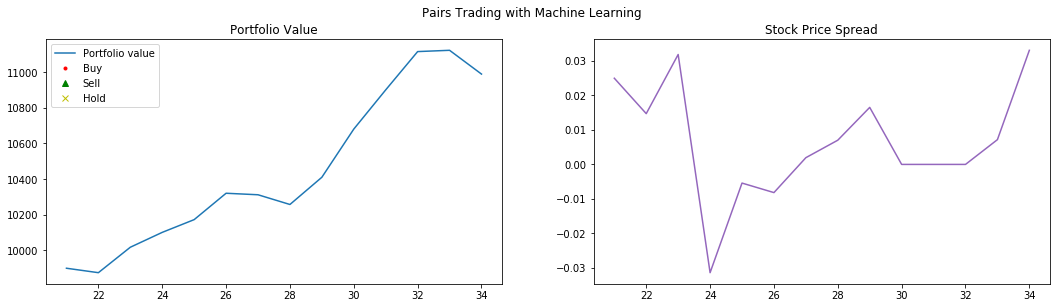

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22640401 0.22643933 0.22577584]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.32537615 0.3237914  0.3265825 ]
 [0.33253157 0.3316669  0.3328675 ]
 [0.33728114 0.3367923  0.33844027]
 [0.31176513 0.3112318  0.31172004]
 [0.32801157 0.3281222  0.3279987 ]
 [0.34675702 0.34600708 0.34549746]
 [0.34739834 0.34739086 0.34799898]
 [0.33234072 0.32995138 0.33440292]
 [0.33087832 0.3297825  0.33171365]
 [0.3215121  0.32169864 0.32197377]
 [0.31551388 0.3153752  0.31538182]], shape=(14, 3), dtype=float32)


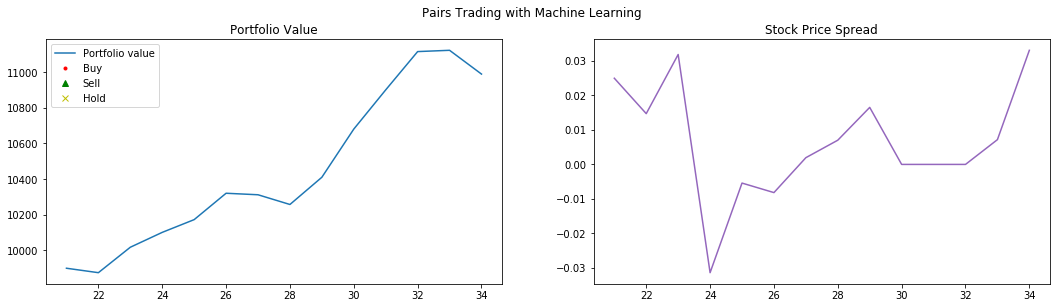

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22636157 0.22639689 0.2257334 ]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.32521644 0.3236317  0.32642278]
 [0.33235595 0.33149126 0.33269188]
 [0.3371899  0.33670104 0.338349  ]
 [0.31163138 0.31109804 0.3115863 ]
 [0.32801157 0.3281222  0.3279987 ]
 [0.34674275 0.34599277 0.34548318]
 [0.3472439  0.34723642 0.34784454]
 [0.332131   0.32974166 0.3341932 ]
 [0.33078465 0.32968882 0.33161998]
 [0.32121485 0.3214014  0.32167652]
 [0.31549293 0.31535426 0.31536087]], shape=(14, 3), dtype=float32)


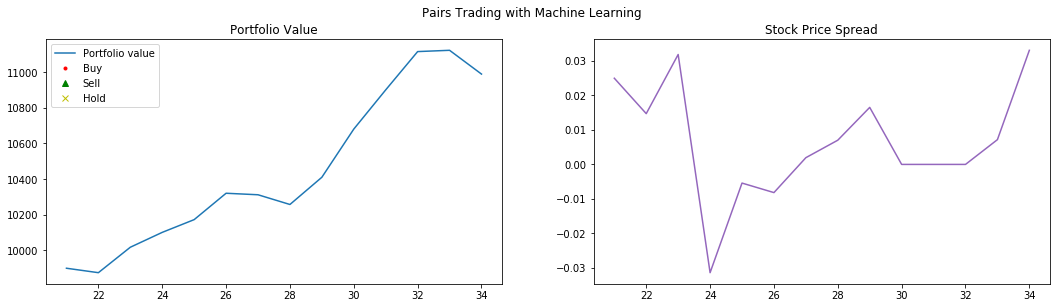

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22693916 0.22697447 0.22631098]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.32557562 0.32399088 0.32678196]
 [0.33259824 0.33173355 0.33293417]
 [0.3376606  0.33717173 0.3388197 ]
 [0.31193516 0.3114018  0.31189007]
 [0.32801157 0.3281222  0.3279987 ]
 [0.34735143 0.34660146 0.34609187]
 [0.34762833 0.34762084 0.34822896]
 [0.33239403 0.3300047  0.33445624]
 [0.33114478 0.33004895 0.3319801 ]
 [0.3214583  0.32164484 0.32191998]
 [0.31607863 0.31593996 0.31594658]], shape=(14, 3), dtype=float32)


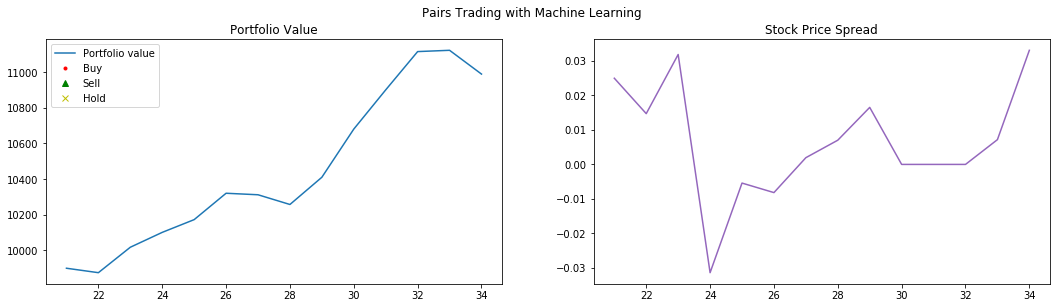

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22785139 0.2278867  0.22722322]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.32624778 0.32466304 0.32745412]
 [0.33314398 0.3322793  0.3334799 ]
 [0.33840758 0.3379187  0.33956668]
 [0.31252047 0.31198713 0.31247538]
 [0.32801157 0.3281222  0.3279987 ]
 [0.34834874 0.34759876 0.34708917]
 [0.34843063 0.34842315 0.34903127]
 [0.33294246 0.3305531  0.33500466]
 [0.33175784 0.330662   0.33259317]
 [0.32207704 0.32226357 0.3225387 ]
 [0.31701237 0.3168737  0.31688032]], shape=(14, 3), dtype=float32)


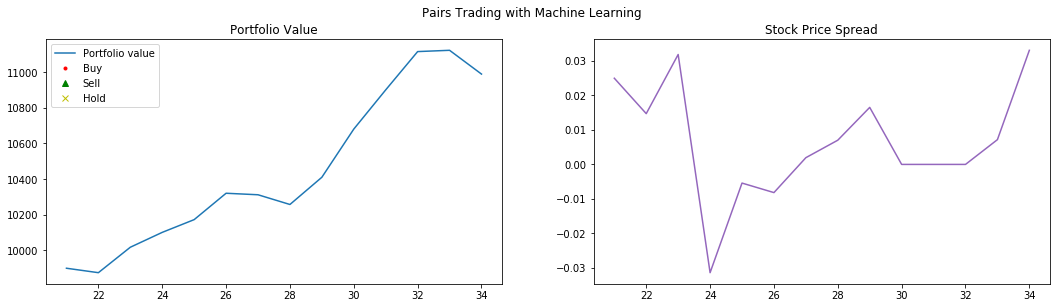

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22881505 0.22885036 0.22818688]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.32694447 0.32535973 0.3281508 ]
 [0.3337117  0.33284703 0.33404765]
 [0.33917168 0.3386828  0.34033078]
 [0.31314984 0.3126165  0.31310475]
 [0.32801157 0.3281222  0.3279987 ]
 [0.34889302 0.34814304 0.34763345]
 [0.34927016 0.34926268 0.3498708 ]
 [0.3334892  0.33109987 0.3355514 ]
 [0.33234426 0.33124843 0.3331796 ]
 [0.32270938 0.3228959  0.32317105]
 [0.3179786  0.31783992 0.31784654]], shape=(14, 3), dtype=float32)


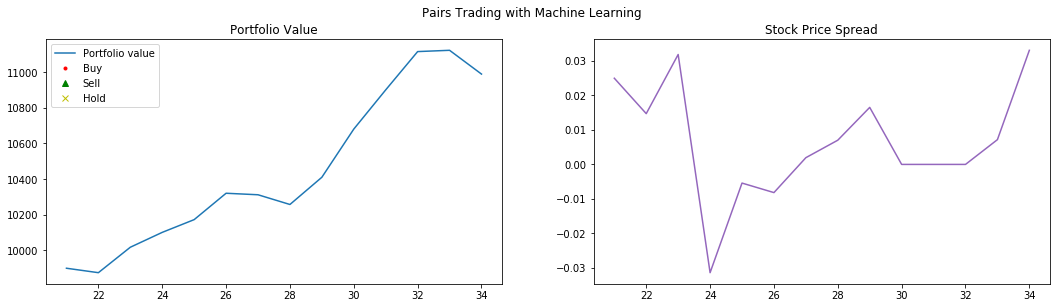

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22924152 0.22927684 0.22861335]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.32716653 0.3255818  0.32837287]
 [0.33388644 0.33302176 0.33422238]
 [0.3394676  0.33897874 0.34062672]
 [0.31334502 0.31281167 0.31329992]
 [0.32801157 0.3281222  0.3279987 ]
 [0.3488929  0.34814292 0.34763333]
 [0.34961432 0.34960687 0.35021496]
 [0.33358777 0.33119842 0.33564997]
 [0.33247918 0.33138335 0.3333145 ]
 [0.32284325 0.3230298  0.32330492]
 [0.3184073  0.3182686  0.3182752 ]], shape=(14, 3), dtype=float32)


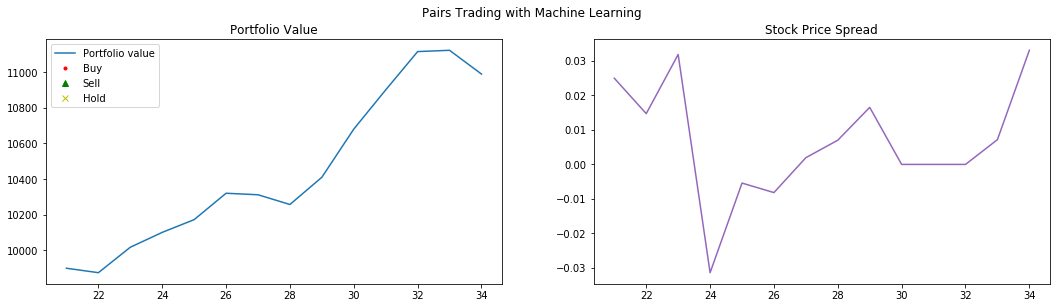

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22908212 0.22911744 0.22845395]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.32686898 0.32528424 0.32807532]
 [0.33361608 0.3327514  0.333952  ]
 [0.33924168 0.3387528  0.3404008 ]
 [0.31306484 0.3125315  0.31301975]
 [0.32801157 0.3281222  0.3279987 ]
 [0.34889302 0.34814304 0.34763345]
 [0.34939024 0.34938276 0.34999087]
 [0.3332201  0.33083075 0.3352823 ]
 [0.3321203  0.33102447 0.33295563]
 [0.32239464 0.32258117 0.3228563 ]
 [0.31822103 0.31808236 0.31808898]], shape=(14, 3), dtype=float32)


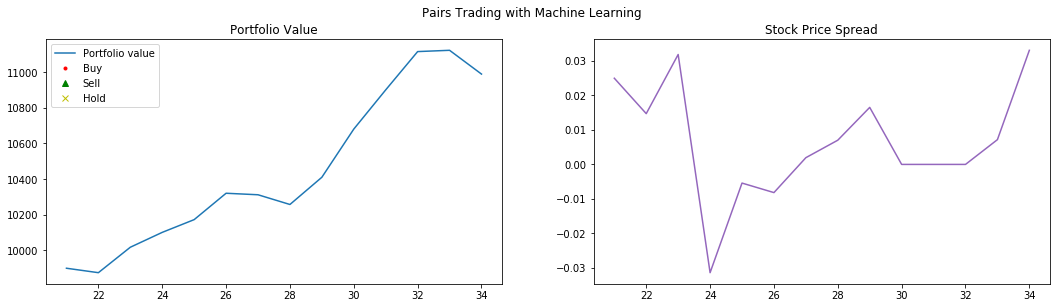

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2284663  0.22850162 0.22783816]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.32620275 0.324618   0.3274091 ]
 [0.3330479  0.3321832  0.33338383]
 [0.3386465  0.33815762 0.3398056 ]
 [0.31242773 0.3118944  0.31238264]
 [0.32801157 0.3281222  0.3279987 ]
 [0.34889305 0.34814307 0.34763345]
 [0.34875882 0.34875134 0.34935945]
 [0.33251977 0.3301304  0.33458197]
 [0.3314204  0.33032456 0.33225572]
 [0.32163146 0.321818   0.32209313]
 [0.31760383 0.3174652  0.3174718 ]], shape=(14, 3), dtype=float32)


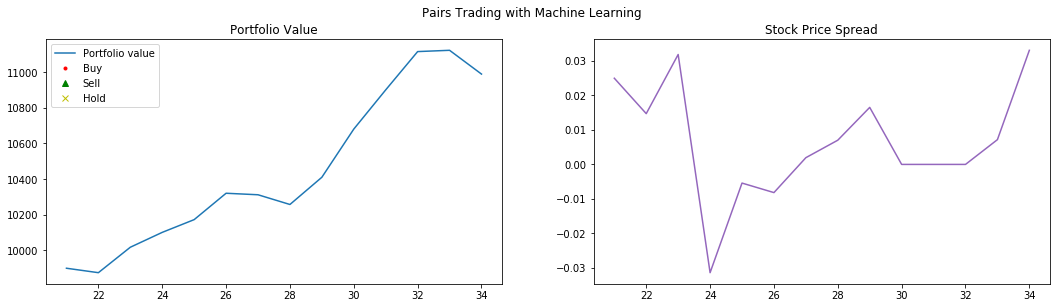

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22769654 0.22773185 0.2270684 ]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837857 0.34743798]
 [0.32542908 0.32384437 0.32663542]
 [0.33238876 0.33152407 0.3327247 ]
 [0.3379646  0.33747572 0.3391237 ]
 [0.31168678 0.31115344 0.3116417 ]
 [0.32801157 0.3281222  0.3279987 ]
 [0.3483347  0.34758472 0.3470751 ]
 [0.34797966 0.34797218 0.3485803 ]
 [0.33176804 0.3293787  0.33383024]
 [0.33060732 0.3295115  0.33144265]
 [0.32086894 0.32105547 0.3213306 ]
 [0.31684762 0.31670892 0.31671554]], shape=(14, 3), dtype=float32)


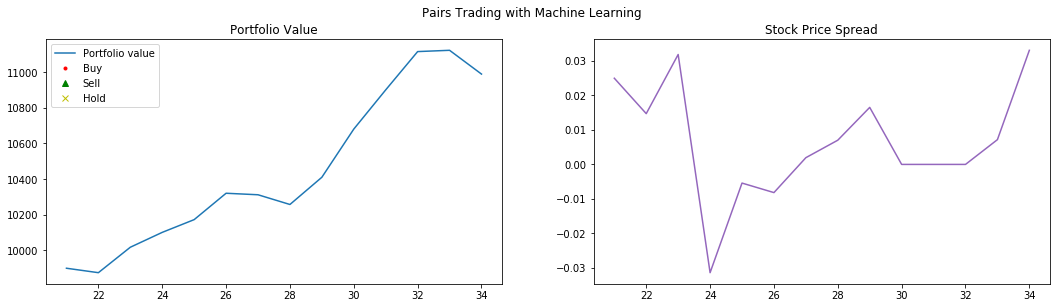

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2274212  0.22745651 0.22679305]
 [0.33129233 0.33080673 0.33035   ]
 [0.34753045 0.34837854 0.34743795]
 [0.32509884 0.3235141  0.32630518]
 [0.3320853  0.33122063 0.33242124]
 [0.33772096 0.33723208 0.33888006]
 [0.3113675  0.31083417 0.31132242]
 [0.32801157 0.3281222  0.3279987 ]
 [0.34809658 0.3473466  0.34683698]
 [0.34765586 0.34764838 0.3482565 ]
 [0.33146003 0.3290707  0.33352223]
 [0.3302229  0.32912707 0.33105823]
 [0.32059434 0.32078087 0.321056  ]
 [0.31657976 0.3164411  0.3164477 ]], shape=(14, 3), dtype=float32)


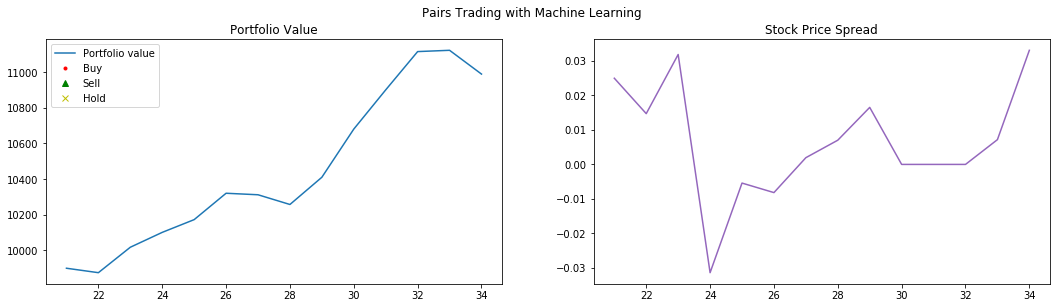

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22774243 0.22777775 0.22711429]
 [0.33129233 0.33080673 0.33035   ]
 [0.34753045 0.34837854 0.34743795]
 [0.3253196  0.32373485 0.32652593]
 [0.33223683 0.33137214 0.33257276]
 [0.33803013 0.33754125 0.33918923]
 [0.31158692 0.31105357 0.31154183]
 [0.32801157 0.3281222  0.3279987 ]
 [0.3484392  0.3476892  0.3471796 ]
 [0.34787098 0.3478635  0.3484716 ]
 [0.3316776  0.32928824 0.3337398 ]
 [0.33036983 0.329274   0.33120513]
 [0.32087636 0.32106286 0.321338  ]
 [0.31690085 0.31676218 0.3167688 ]], shape=(14, 3), dtype=float32)


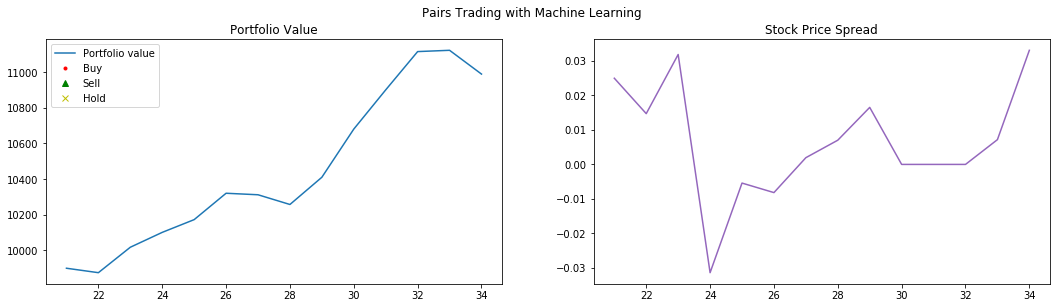

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22848183 0.22851714 0.22785369]
 [0.33129233 0.33080673 0.33035   ]
 [0.34753045 0.34837854 0.34743795]
 [0.32592064 0.3243359  0.32712698]
 [0.33271927 0.33185458 0.3330552 ]
 [0.33873802 0.33824915 0.33989713]
 [0.31219316 0.3116598  0.31214806]
 [0.32801157 0.3281222  0.3279987 ]
 [0.34889305 0.34814307 0.34763345]
 [0.34845343 0.34844595 0.34905407]
 [0.3322636  0.32987425 0.3343258 ]
 [0.33089086 0.32979503 0.3317262 ]
 [0.3215959  0.32178244 0.32205757]
 [0.31763476 0.3174961  0.3175027 ]], shape=(14, 3), dtype=float32)


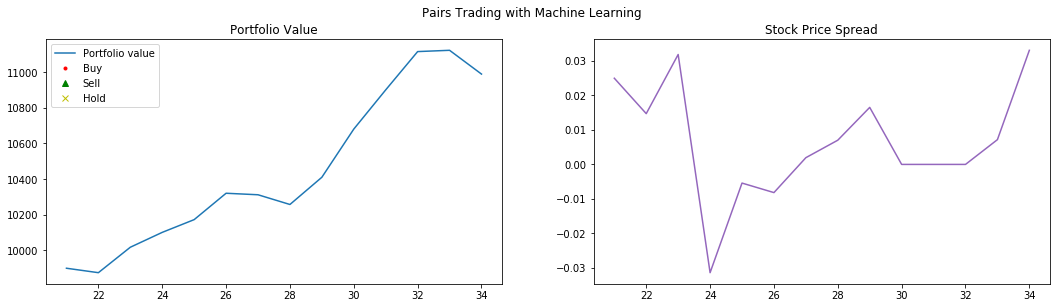

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22898641 0.22902173 0.22835827]
 [0.33129233 0.33080673 0.33035   ]
 [0.34753045 0.34837854 0.34743795]
 [0.32634714 0.3247624  0.32755348]
 [0.3331044  0.33223972 0.33344033]
 [0.3392497  0.33876082 0.3404088 ]
 [0.31267542 0.31214207 0.31263033]
 [0.32801154 0.32812217 0.32799867]
 [0.34889305 0.34814307 0.34763345]
 [0.34885228 0.3488448  0.3494529 ]
 [0.33271983 0.3303305  0.33478203]
 [0.3313007  0.33020487 0.33213603]
 [0.32209206 0.3222786  0.32255372]
 [0.31813386 0.3179952  0.3180018 ]], shape=(14, 3), dtype=float32)


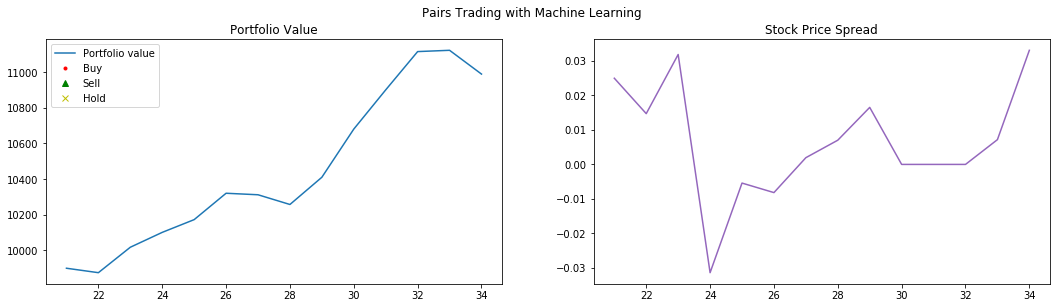

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22908005 0.22911537 0.22845191]
 [0.33129233 0.33080673 0.33035   ]
 [0.34753045 0.34837854 0.34743795]
 [0.32641587 0.32483113 0.3276222 ]
 [0.33316332 0.33229864 0.33349925]
 [0.33933768 0.3388488  0.34049678]
 [0.31285715 0.3123238  0.31281206]
 [0.32801154 0.32812217 0.32799867]
 [0.34889305 0.34814307 0.34763345]
 [0.34886977 0.3488623  0.3494704 ]
 [0.33286652 0.33047718 0.33492872]
 [0.33142707 0.33033124 0.3322624 ]
 [0.32216567 0.3223522  0.32262734]
 [0.31822398 0.3180853  0.31809193]], shape=(14, 3), dtype=float32)


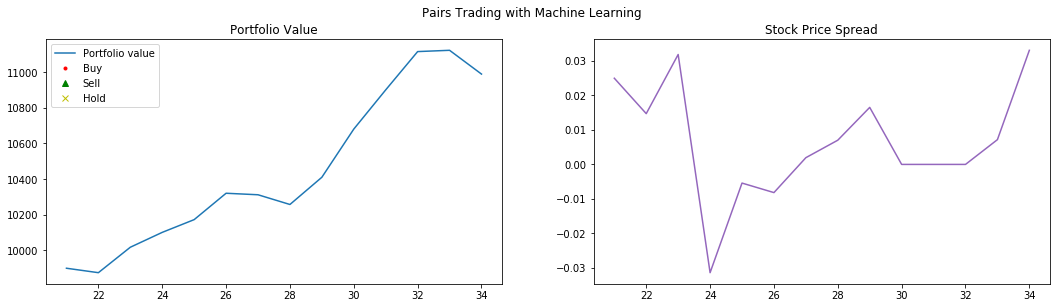

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22874075 0.22877607 0.22811261]
 [0.33129233 0.33080673 0.33035   ]
 [0.34753045 0.34837854 0.34743795]
 [0.32610285 0.3245181  0.3273092 ]
 [0.3328636  0.3319989  0.33319953]
 [0.33900088 0.338512   0.34015995]
 [0.31271857 0.31218523 0.31267348]
 [0.32801154 0.32812217 0.32799867]
 [0.34889305 0.34814307 0.34763345]
 [0.34847832 0.34847084 0.34907895]
 [0.3327084  0.33031905 0.3347706 ]
 [0.3312456  0.33014977 0.33208093]
 [0.32181686 0.3220034  0.32227853]
 [0.31788713 0.31774846 0.31775507]], shape=(14, 3), dtype=float32)


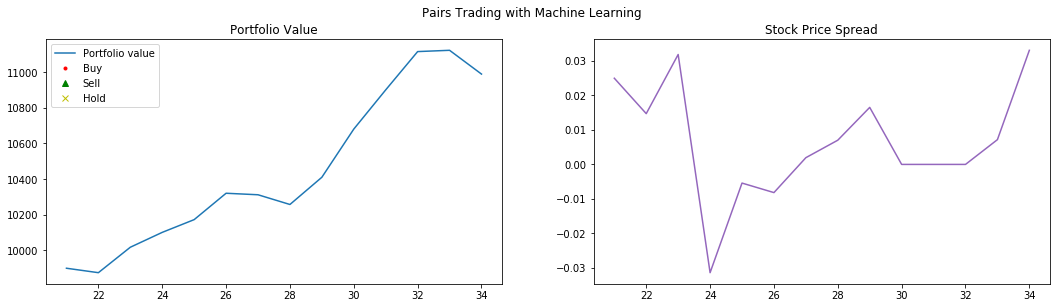

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22816259 0.2281979  0.22753444]
 [0.33129233 0.33080673 0.33035   ]
 [0.34753045 0.34837854 0.34743795]
 [0.32558134 0.3239966  0.32678768]
 [0.3323744  0.3315097  0.33271033]
 [0.33841783 0.33792895 0.33957693]
 [0.31240755 0.3118742  0.31236246]
 [0.32801154 0.32812217 0.32799867]
 [0.34889305 0.34814307 0.34763345]
 [0.3478416  0.3478341  0.34844223]
 [0.33238876 0.32999942 0.33445096]
 [0.33089638 0.32980055 0.3317317 ]
 [0.32121906 0.3214056  0.32168072]
 [0.31731197 0.3171733  0.31717992]], shape=(14, 3), dtype=float32)


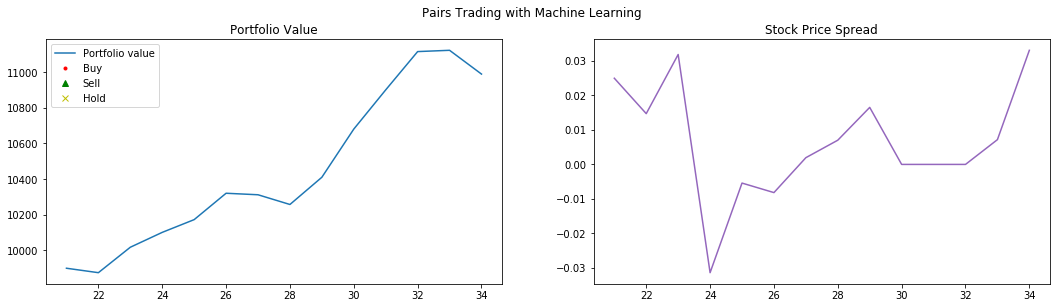

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22758774 0.22762306 0.2269596 ]
 [0.33129233 0.33080673 0.33035004]
 [0.34753045 0.34837854 0.34743795]
 [0.3250942  0.32350948 0.32630053]
 [0.33191162 0.33104694 0.33224756]
 [0.33785713 0.33736825 0.33901626]
 [0.31210974 0.3115764  0.31206465]
 [0.32801154 0.32812217 0.32799867]
 [0.3483174  0.34756744 0.34705785]
 [0.34718895 0.34718147 0.3477896 ]
 [0.33209735 0.329708   0.33415955]
 [0.33057928 0.32948345 0.3314146 ]
 [0.32060757 0.3207941  0.32106924]
 [0.31673983 0.31660116 0.31660777]], shape=(14, 3), dtype=float32)


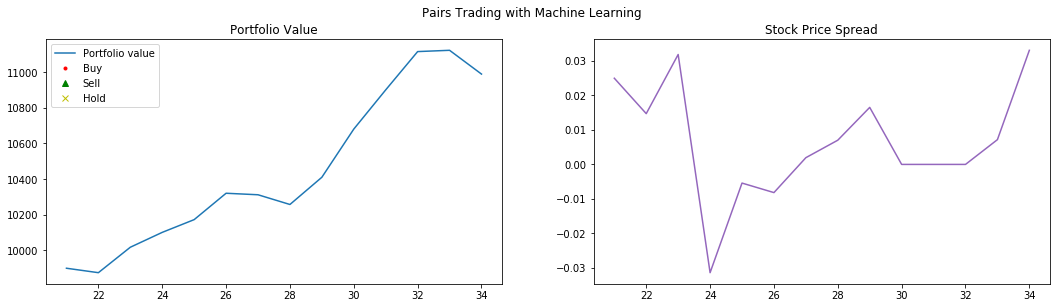

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22758308 0.2276184  0.22695494]
 [0.33129233 0.33080673 0.33035004]
 [0.34753045 0.34837854 0.34743795]
 [0.32512814 0.32354343 0.32633448]
 [0.33192158 0.3310569  0.3322575 ]
 [0.33788794 0.33739907 0.33904704]
 [0.3122543  0.31172097 0.3122092 ]
 [0.32801154 0.32812217 0.32799867]
 [0.3482909  0.3475409  0.34703133]
 [0.34706375 0.34705627 0.3476644 ]
 [0.33223128 0.3298419  0.33429345]
 [0.33072966 0.32963383 0.33156496]
 [0.32055917 0.3207457  0.32102084]
 [0.31673583 0.31659716 0.31660378]], shape=(14, 3), dtype=float32)


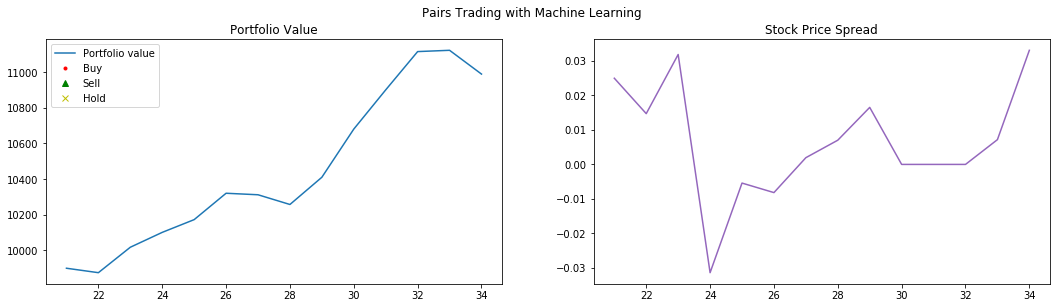

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22808024 0.22811556 0.2274521 ]
 [0.33129233 0.33080673 0.33035004]
 [0.34753045 0.34837854 0.34743795]
 [0.32561016 0.32402545 0.3268165 ]
 [0.3323429  0.3314782  0.33267882]
 [0.33843127 0.3379424  0.33959037]
 [0.31277642 0.31224307 0.31273133]
 [0.32801154 0.32812217 0.32799867]
 [0.3487644  0.34801438 0.34750482]
 [0.34746316 0.34745568 0.3480638 ]
 [0.33273938 0.33035    0.33480155]
 [0.3312752  0.33017936 0.33211052]
 [0.32103744 0.32122397 0.3214991 ]
 [0.31723225 0.31709358 0.3171002 ]], shape=(14, 3), dtype=float32)


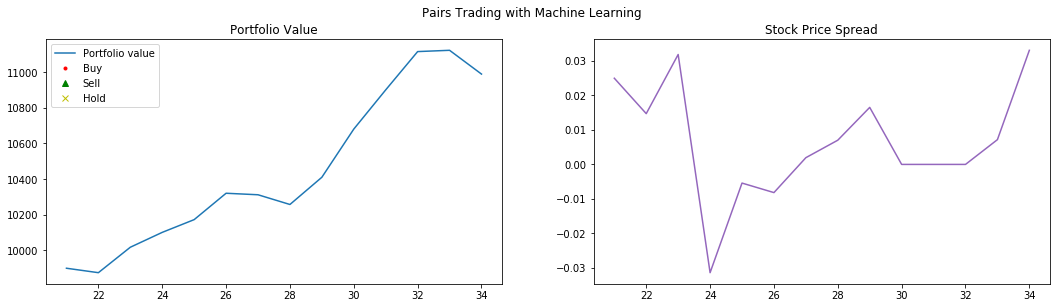

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22875765 0.22879297 0.2281295 ]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837854 0.34743795]
 [0.3262559  0.32467118 0.32746223]
 [0.3329177  0.332053   0.33325362]
 [0.33914682 0.33865795 0.34030592]
 [0.31339204 0.3128587  0.31334695]
 [0.32801154 0.32812217 0.32799867]
 [0.34889302 0.348143   0.34763345]
 [0.3480628  0.34805533 0.34866345]
 [0.33333516 0.3309458  0.33539733]
 [0.3319497  0.33085388 0.33278504]
 [0.32171246 0.321899   0.32217413]
 [0.31790888 0.3177702  0.31777683]], shape=(14, 3), dtype=float32)


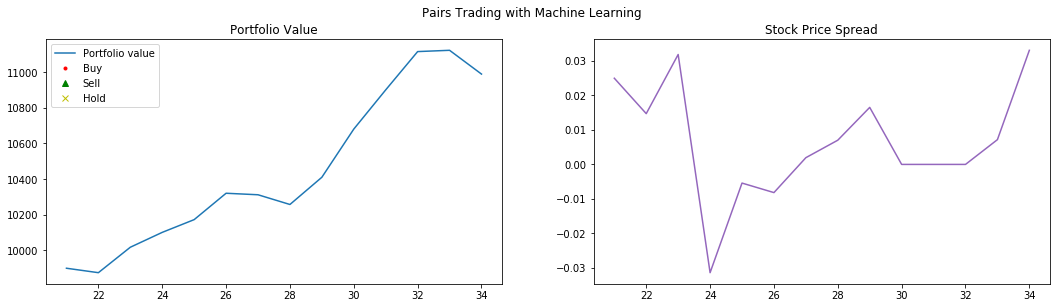

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22895616 0.22899148 0.22832802]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837854 0.34743795]
 [0.32648    0.3248953  0.32768634]
 [0.33307752 0.33221284 0.33341345]
 [0.33938247 0.3388936  0.3405416 ]
 [0.31358507 0.31305173 0.31353998]
 [0.32801154 0.32812217 0.32799867]
 [0.34889302 0.348143   0.34763345]
 [0.3481769  0.34816942 0.34877753]
 [0.33353457 0.3311452  0.33559674]
 [0.3322177  0.33112186 0.33305302]
 [0.32191148 0.32209802 0.32237315]
 [0.31810907 0.3179704  0.317977  ]], shape=(14, 3), dtype=float32)


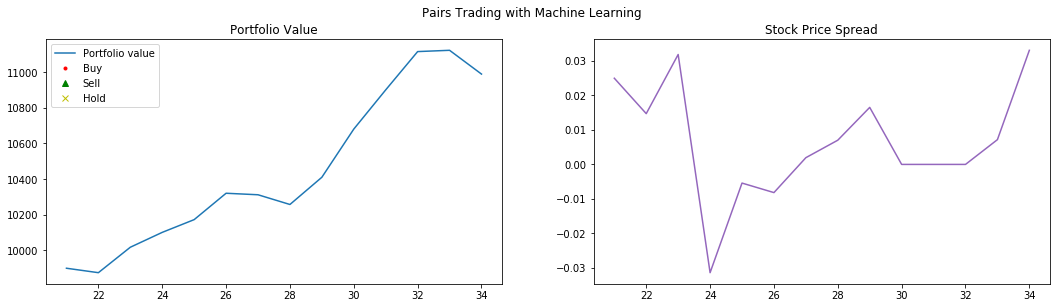

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2286428  0.22867812 0.22801466]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837854 0.34743795]
 [0.32623574 0.32465103 0.32744208]
 [0.332831   0.3319663  0.33316693]
 [0.33910424 0.33861536 0.34026334]
 [0.3133439  0.31281057 0.31329882]
 [0.32801154 0.32812217 0.32799867]
 [0.34889302 0.348143   0.34763345]
 [0.34779507 0.3477876  0.3483957 ]
 [0.33327785 0.33088848 0.33534002]
 [0.33206278 0.33096695 0.3328981 ]
 [0.3215574  0.32174394 0.32201907]
 [0.31780016 0.3176615  0.3176681 ]], shape=(14, 3), dtype=float32)


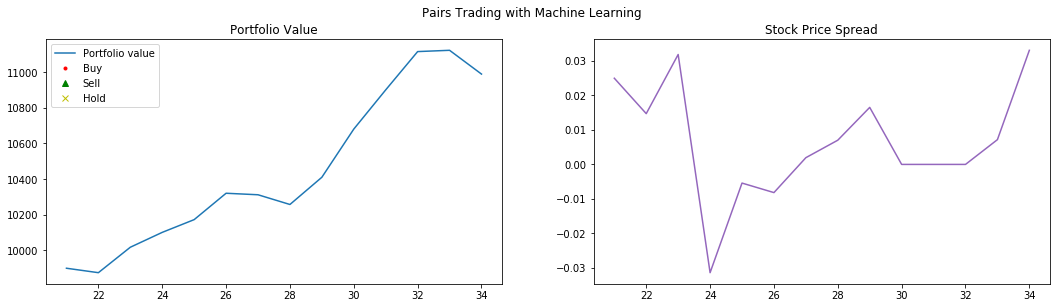

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22800002 0.22803533 0.22737187]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837854 0.34743795]
 [0.325686   0.3241013  0.32689235]
 [0.3323372  0.33147252 0.33267313]
 [0.3384949  0.33800605 0.33965403]
 [0.31281808 0.31228474 0.312773  ]
 [0.32801154 0.32812217 0.32799867]
 [0.3486284  0.3478784  0.34736884]
 [0.34710854 0.34710106 0.34770918]
 [0.33273798 0.3303486  0.33480018]
 [0.33165026 0.33055443 0.3324856 ]
 [0.3208711  0.32105765 0.32133278]
 [0.31716397 0.3170253  0.31703192]], shape=(14, 3), dtype=float32)


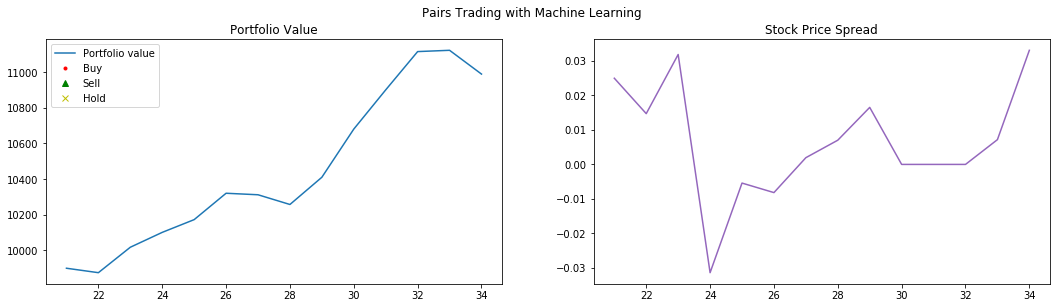

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22767845 0.22771376 0.2270503 ]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.34837854 0.34743798]
 [0.3254313  0.32384658 0.32663763]
 [0.33214706 0.33128238 0.332483  ]
 [0.33821023 0.33772138 0.33936936]
 [0.3125678  0.31203446 0.3125227 ]
 [0.32801154 0.32812217 0.32799867]
 [0.34827894 0.34752893 0.34701937]
 [0.34675947 0.346752   0.3473601 ]
 [0.33245596 0.3300666  0.33451813]
 [0.33149    0.33039418 0.33232534]
 [0.32049447 0.320681   0.32095614]
 [0.31685284 0.31671417 0.31672078]], shape=(14, 3), dtype=float32)


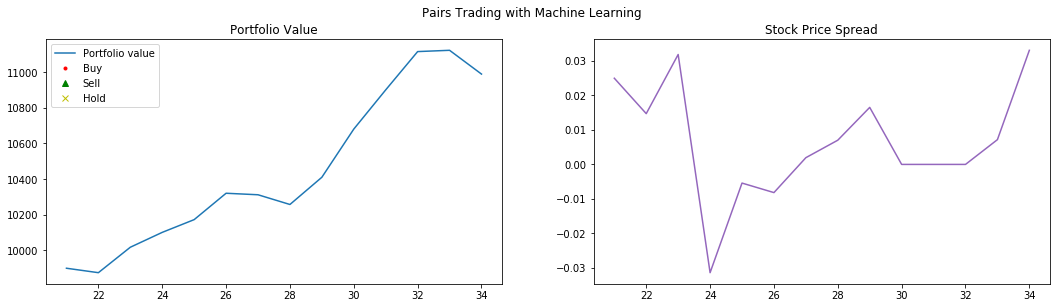

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2278436  0.22787891 0.22721545]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.34837854 0.34743798]
 [0.32560953 0.32402483 0.32681587]
 [0.3323624  0.33149773 0.33269835]
 [0.3383968  0.33790794 0.33955592]
 [0.31272385 0.3121905  0.31267875]
 [0.32801154 0.32812217 0.32799867]
 [0.3484466  0.3476966  0.34718707]
 [0.34686616 0.34685868 0.3474668 ]
 [0.33256087 0.3301715  0.33462304]
 [0.3316915  0.33059567 0.33252683]
 [0.3205692  0.32075572 0.32103086]
 [0.31702572 0.31688705 0.31689367]], shape=(14, 3), dtype=float32)


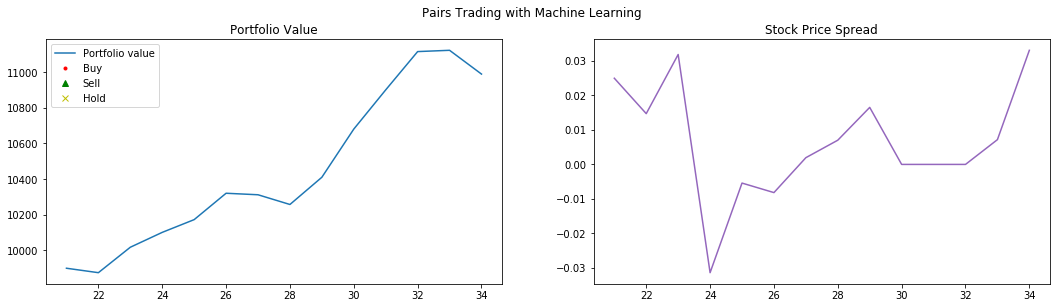

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2283722  0.22840752 0.22774406]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.34837854 0.34743798]
 [0.32609978 0.32451507 0.32730612]
 [0.33286458 0.3319999  0.3332005 ]
 [0.33893767 0.33844882 0.3400968 ]
 [0.31317586 0.3126425  0.31313077]
 [0.32801154 0.32812214 0.32799864]
 [0.34889302 0.348143   0.34763348]
 [0.3473119  0.34730443 0.34791255]
 [0.3329623  0.33057293 0.33502448]
 [0.33214718 0.33105135 0.3329825 ]
 [0.32101244 0.32119897 0.3214741 ]
 [0.31756228 0.3174236  0.31743023]], shape=(14, 3), dtype=float32)


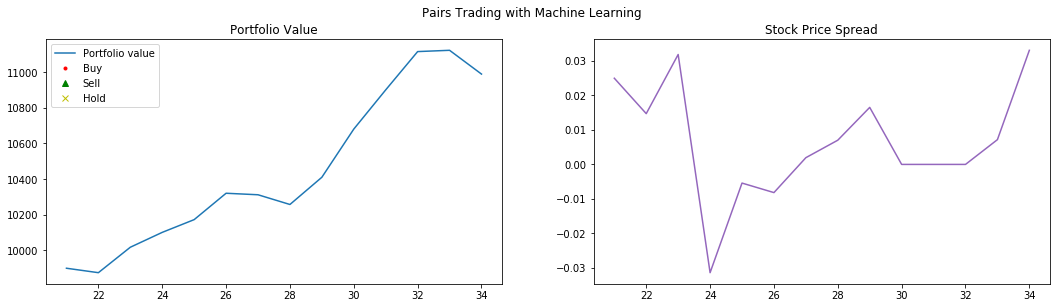

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22860533 0.22864065 0.22797719]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.34837854 0.34743798]
 [0.3263189  0.32473418 0.32752523]
 [0.33312547 0.3322608  0.3334614 ]
 [0.33921614 0.3387273  0.34037527]
 [0.31340432 0.31287098 0.31335923]
 [0.32801154 0.32812214 0.32799864]
 [0.34889302 0.348143   0.34763348]
 [0.34750015 0.34749264 0.34810078]
 [0.3331965  0.33080712 0.33525866]
 [0.33237848 0.33128265 0.3332138 ]
 [0.3212048  0.32139134 0.32166648]
 [0.3178047  0.31766602 0.31767264]], shape=(14, 3), dtype=float32)


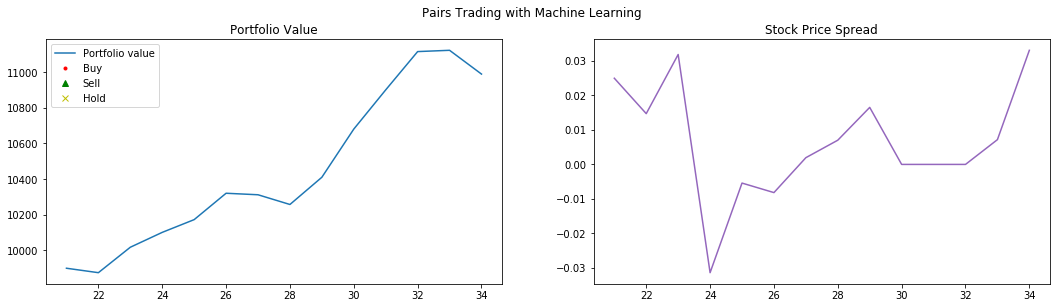

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22846797 0.22850329 0.22783983]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.34837854 0.34743798]
 [0.32620835 0.32462364 0.3274147 ]
 [0.33304876 0.33218408 0.3333847 ]
 [0.33913234 0.3386435  0.34029147]
 [0.3133016  0.31276825 0.3132565 ]
 [0.32801154 0.32812214 0.32799864]
 [0.34889302 0.348143   0.34763348]
 [0.34731516 0.34730765 0.3479158 ]
 [0.33310103 0.33071166 0.3351632 ]
 [0.33229396 0.33119816 0.33312932]
 [0.32103646 0.321223   0.32149813]
 [0.3176742  0.31753552 0.31754214]], shape=(14, 3), dtype=float32)


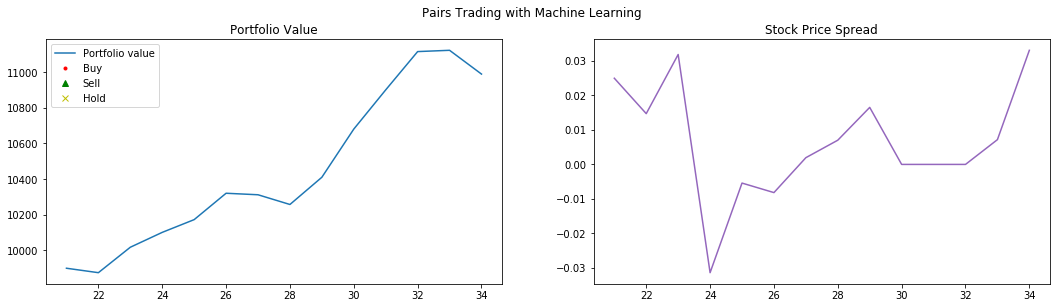

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22803743 0.22807275 0.22740929]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.34837854 0.34743798]
 [0.32585415 0.32426944 0.3270605 ]
 [0.33266917 0.3318045  0.33300513]
 [0.3387414  0.33825254 0.33990052]
 [0.31292242 0.31238908 0.31287733]
 [0.32801154 0.32812214 0.32799864]
 [0.3486206  0.3478706  0.34736106]
 [0.3468227  0.3468152  0.34742334]
 [0.33271304 0.33032367 0.3347752 ]
 [0.33195856 0.33086276 0.33279392]
 [0.32055146 0.320738   0.32101312]
 [0.3172496  0.31711096 0.31711757]], shape=(14, 3), dtype=float32)


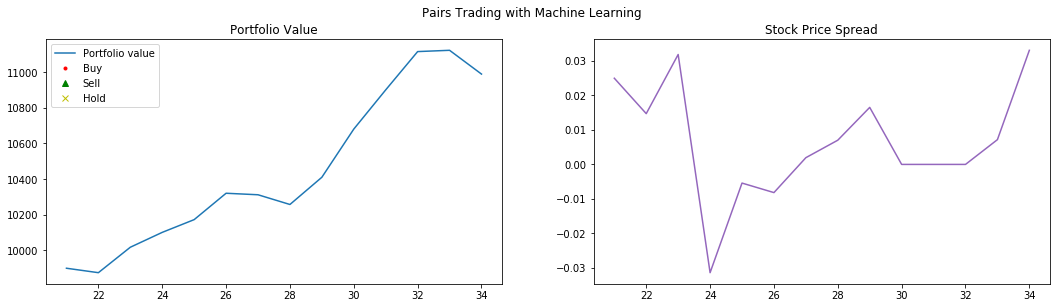

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22794478 0.22798009 0.22731663]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.34837854 0.34743798]
 [0.3257841  0.32419938 0.32699043]
 [0.33250234 0.33163768 0.3328383 ]
 [0.33861113 0.33812228 0.33977026]
 [0.31278005 0.3122467  0.31273496]
 [0.32801154 0.32812214 0.32799864]
 [0.34852463 0.34777462 0.3472651 ]
 [0.3466623  0.3466548  0.34726295]
 [0.33254164 0.3301523  0.33460385]
 [0.33182368 0.33072788 0.33265904]
 [0.3204079  0.32059443 0.32086957]
 [0.3171639  0.31702524 0.31703186]], shape=(14, 3), dtype=float32)


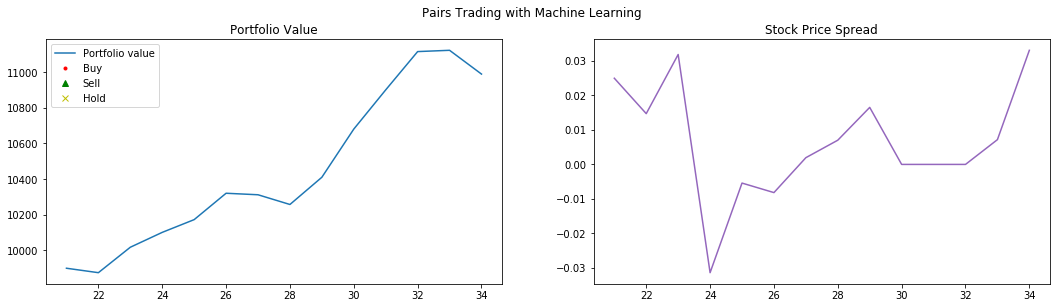

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2282485  0.22828382 0.22762036]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.34837854 0.34743798]
 [0.326043   0.3244583  0.32724935]
 [0.33264092 0.33177626 0.33297688]
 [0.33883905 0.33835018 0.3399982 ]
 [0.312955   0.31242165 0.3129099 ]
 [0.32801154 0.32812214 0.32799864]
 [0.34885496 0.34810495 0.34759542]
 [0.34688696 0.34687945 0.3474876 ]
 [0.3326851  0.33029577 0.3347473 ]
 [0.33197197 0.33087617 0.33280733]
 [0.3206349  0.32082143 0.32109657]
 [0.31747147 0.3173328  0.31733942]], shape=(14, 3), dtype=float32)


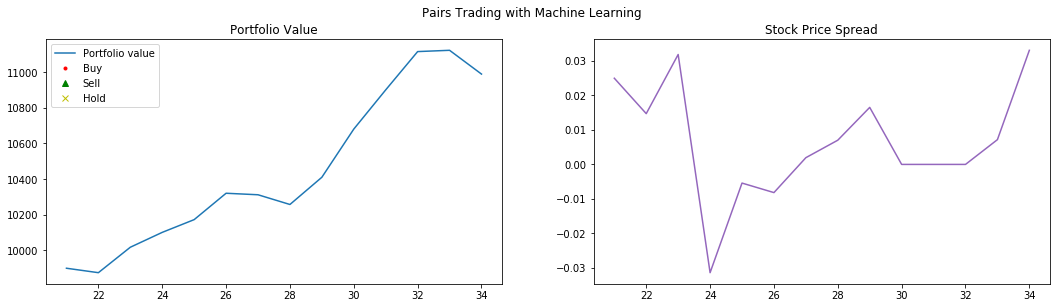

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22874886 0.22878417 0.22812071]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.34837854 0.34743798]
 [0.3264624  0.32487768 0.32766873]
 [0.33295116 0.3320865  0.33328712]
 [0.3392762  0.33878732 0.34043533]
 [0.31331116 0.31277782 0.31326607]
 [0.32801154 0.32812214 0.32799864]
 [0.34889302 0.348143   0.34763348]
 [0.34735432 0.3473468  0.34795496]
 [0.33300915 0.3306198  0.33507136]
 [0.33226117 0.33116537 0.33309653]
 [0.3210595  0.32124603 0.32152116]
 [0.31797636 0.3178377  0.3178443 ]], shape=(14, 3), dtype=float32)


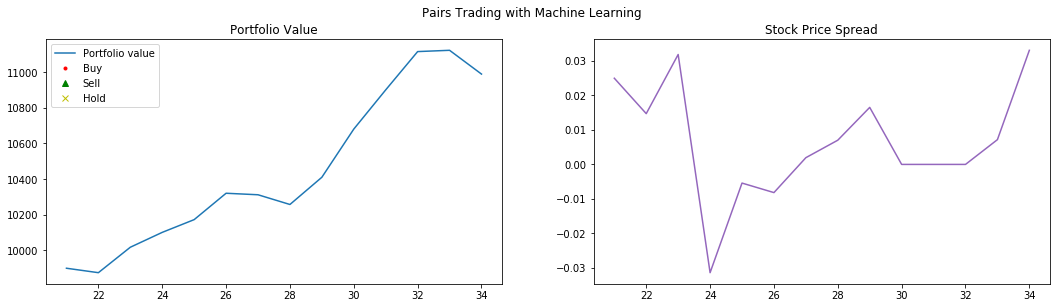

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22879335 0.22882867 0.22816521]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.34837854 0.34743798]
 [0.3264918  0.3249071  0.32769814]
 [0.33295158 0.33208692 0.33328754]
 [0.33931312 0.33882424 0.34047225]
 [0.31338158 0.31284824 0.31333646]
 [0.32801154 0.32812214 0.32799864]
 [0.34889302 0.348143   0.34763348]
 [0.3473968  0.34738928 0.34799743]
 [0.3330587  0.33066937 0.33512092]
 [0.33225793 0.33116212 0.3330933 ]
 [0.32103404 0.32122058 0.3214957 ]
 [0.31802765 0.31788898 0.3178956 ]], shape=(14, 3), dtype=float32)


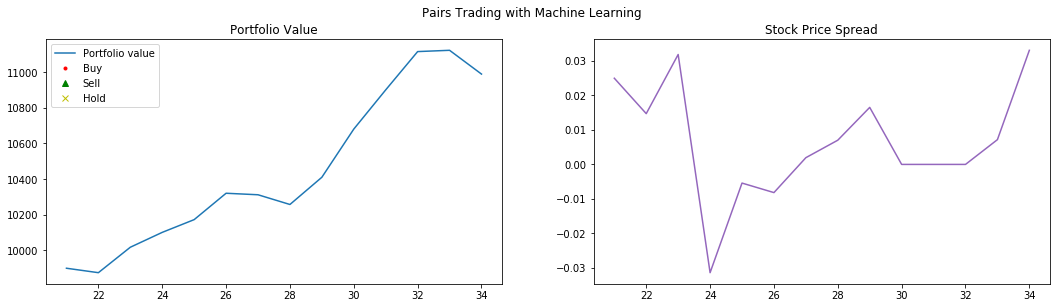

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22840773 0.22844304 0.22777958]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.34837854 0.34743798]
 [0.32614145 0.32455674 0.3273478 ]
 [0.33262748 0.33176282 0.33296344]
 [0.33896634 0.33847746 0.34012547]
 [0.3131691  0.31263575 0.31312397]
 [0.32801154 0.32812214 0.32799864]
 [0.348893   0.34814298 0.34763348]
 [0.34699285 0.34698534 0.3475935 ]
 [0.33282268 0.33043334 0.33488488]
 [0.33197105 0.33087525 0.3328064 ]
 [0.32057917 0.3207657  0.32104084]
 [0.31764424 0.31750557 0.31751218]], shape=(14, 3), dtype=float32)


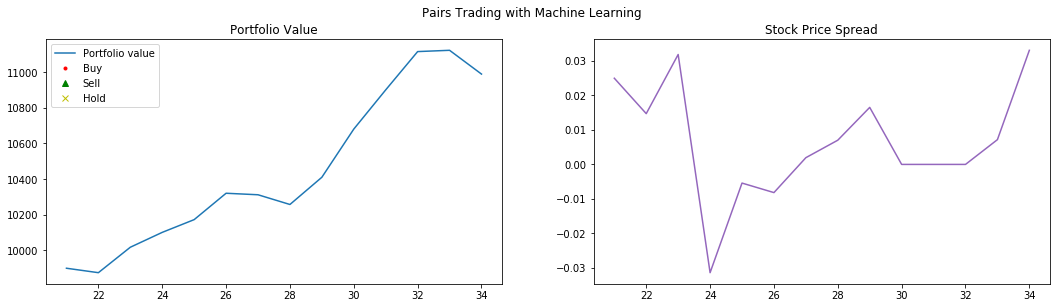

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22786617 0.22790149 0.22723803]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.34837854 0.34743798]
 [0.32566786 0.32408315 0.3268742 ]
 [0.33221635 0.3313517  0.3325523 ]
 [0.33850014 0.33801126 0.33965927]
 [0.3128541  0.31232077 0.312809  ]
 [0.32801154 0.32812214 0.32799867]
 [0.34858415 0.34783414 0.34732464]
 [0.34644526 0.34643775 0.3470459 ]
 [0.3324932  0.33010387 0.3345554 ]
 [0.3315916  0.3304958  0.33242697]
 [0.3200491  0.32023564 0.32051077]
 [0.31710407 0.3169654  0.31697202]], shape=(14, 3), dtype=float32)


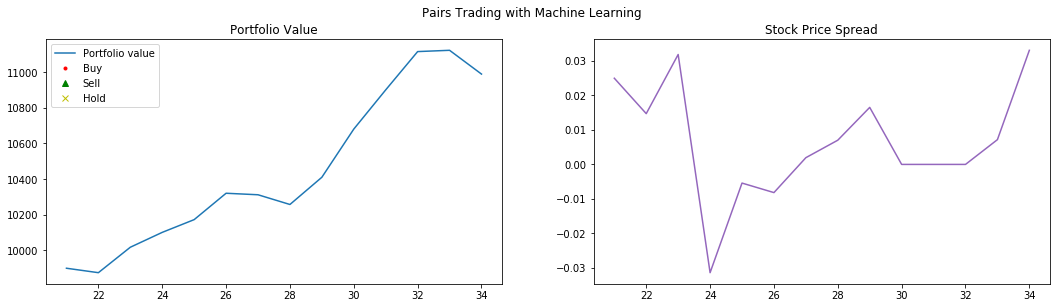

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22786795 0.22790326 0.2272398 ]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.34837854 0.34743798]
 [0.325677   0.3240923  0.32688335]
 [0.33223012 0.33136547 0.33256608]
 [0.33853132 0.33804244 0.33969045]
 [0.31291053 0.31237718 0.3128654 ]
 [0.32801154 0.32812214 0.32799867]
 [0.34862778 0.3478778  0.34736827]
 [0.34645104 0.34644353 0.34705168]
 [0.3325311  0.33014178 0.3345933 ]
 [0.33160594 0.33051014 0.3324413 ]
 [0.3199615  0.32014802 0.32042316]
 [0.31710827 0.3169696  0.31697622]], shape=(14, 3), dtype=float32)


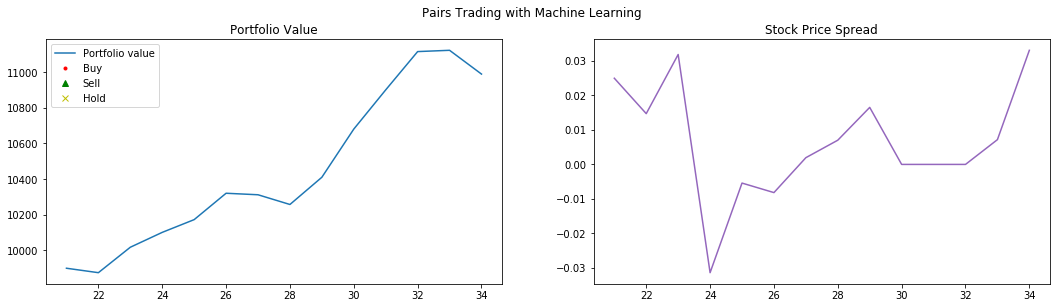

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2283498  0.22838512 0.22772166]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.34743798]
 [0.3261053  0.3245206  0.32731164]
 [0.33259287 0.33172822 0.33292884]
 [0.3389879  0.338499   0.34014702]
 [0.31328097 0.31274763 0.31323585]
 [0.32801154 0.32812214 0.32799867]
 [0.348893   0.348143   0.34763348]
 [0.3469137  0.3469062  0.34751433]
 [0.33287936 0.33049005 0.33494157]
 [0.3319665  0.3308707  0.33280185]
 [0.3203193  0.32050583 0.32078096]
 [0.3175901  0.31745142 0.31745803]], shape=(14, 3), dtype=float32)


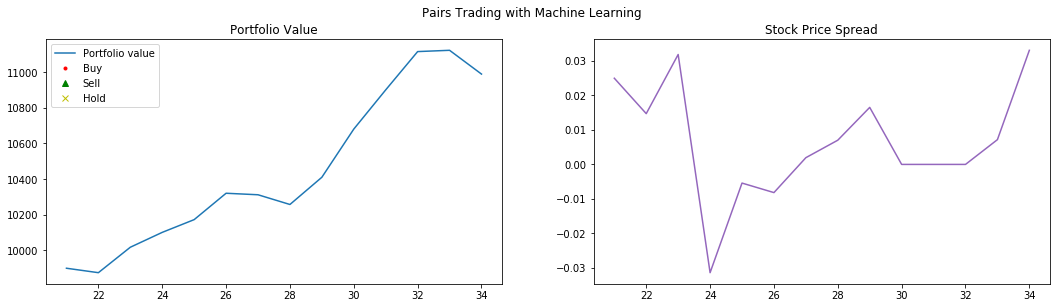

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22862181 0.22865713 0.22799367]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.34743798]
 [0.32634053 0.32475582 0.32754686]
 [0.33277357 0.3319089  0.33310953]
 [0.33921093 0.33872205 0.34037006]
 [0.31346574 0.3129324  0.31342062]
 [0.32801154 0.32812214 0.32799867]
 [0.348893   0.348143   0.3476335 ]
 [0.34716576 0.34715825 0.3477664 ]
 [0.33304358 0.33065426 0.33510578]
 [0.3321758  0.33108002 0.33301115]
 [0.32049093 0.32067746 0.3209526 ]
 [0.31786627 0.3177276  0.3177342 ]], shape=(14, 3), dtype=float32)


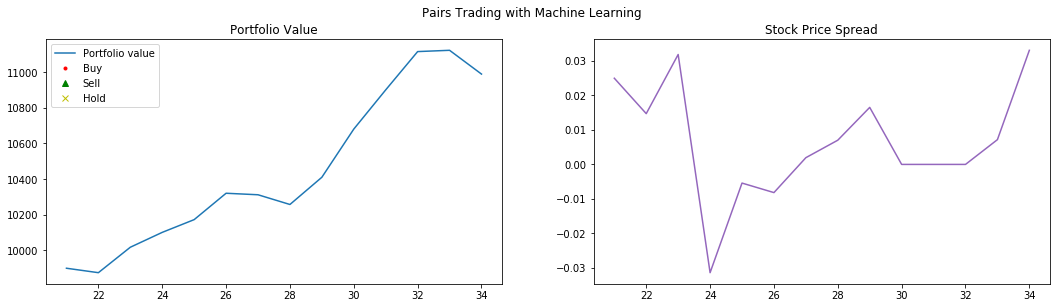

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2285659  0.22860122 0.22793776]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.34743798]
 [0.32628167 0.32469696 0.327488  ]
 [0.33268374 0.3318191  0.3330197 ]
 [0.3391318  0.33864293 0.34029093]
 [0.313375   0.31284165 0.31332988]
 [0.32801154 0.32812214 0.32799867]
 [0.348893   0.348143   0.3476335 ]
 [0.3470719  0.34706438 0.34767252]
 [0.33293438 0.33054507 0.33499658]
 [0.33211887 0.33102307 0.33295423]
 [0.3203627  0.32054922 0.32082435]
 [0.31782007 0.3176814  0.31768802]], shape=(14, 3), dtype=float32)


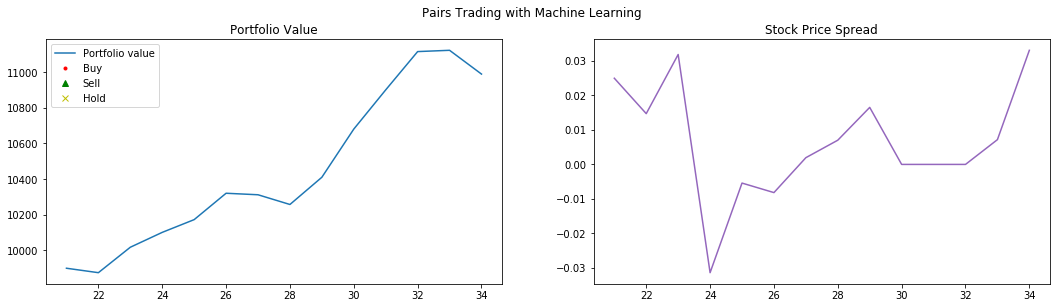

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22822778 0.2282631  0.22759964]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.34743798]
 [0.32597604 0.32439134 0.32718238]
 [0.33235732 0.33149266 0.33269328]
 [0.33880055 0.33831167 0.33995968]
 [0.31305778 0.31252444 0.31301266]
 [0.32801154 0.32812214 0.32799867]
 [0.348893   0.348143   0.3476335 ]
 [0.34669468 0.34668714 0.3472953 ]
 [0.33261514 0.3302258  0.3346773 ]
 [0.33181882 0.33072302 0.33265418]
 [0.3199864  0.32017294 0.32044807]
 [0.31749326 0.3173546  0.3173612 ]], shape=(14, 3), dtype=float32)


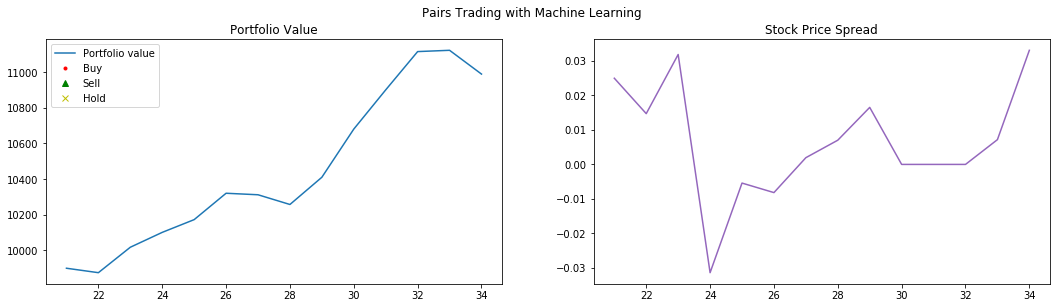

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22786534 0.22790065 0.2272372 ]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.34743798]
 [0.32563022 0.3240455  0.32683656]
 [0.33201987 0.3311552  0.33235583]
 [0.3384335  0.3379446  0.33959264]
 [0.31272432 0.31219098 0.3126792 ]
 [0.32801154 0.32812214 0.32799867]
 [0.34860626 0.34785628 0.34734678]
 [0.34628415 0.3462766  0.3468848 ]
 [0.33227184 0.3298825  0.33433402]
 [0.33148634 0.33039054 0.3323217 ]
 [0.31956476 0.3197513  0.32002643]
 [0.31714025 0.31700158 0.3170082 ]], shape=(14, 3), dtype=float32)


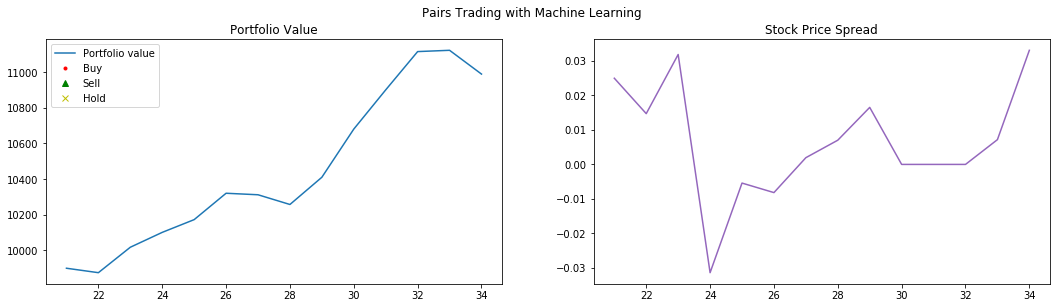

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22815385 0.22818917 0.22752571]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.34743798]
 [0.32583526 0.32425058 0.3270416 ]
 [0.33222622 0.33136156 0.33256218]
 [0.33868286 0.33819395 0.339842  ]
 [0.3129271  0.31239375 0.31288198]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.348143   0.3476335 ]
 [0.34649584 0.34648833 0.3470965 ]
 [0.3324468  0.33005747 0.334509  ]
 [0.33162972 0.33053392 0.33246508]
 [0.31973118 0.3199177  0.32019284]
 [0.31743163 0.31729296 0.31729957]], shape=(14, 3), dtype=float32)


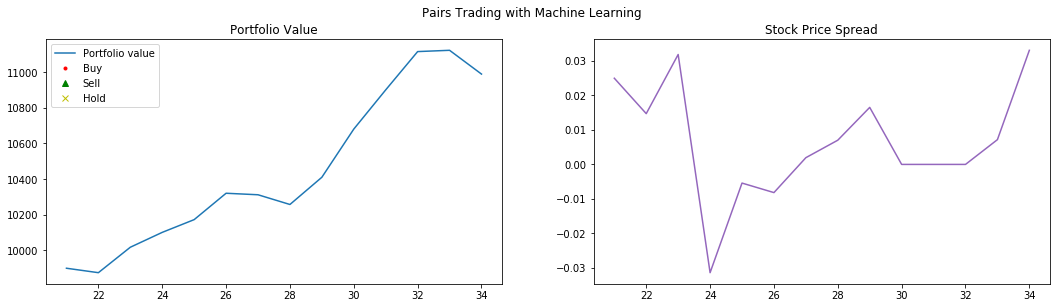

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2284215  0.22845681 0.22779335]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.34743798]
 [0.32604954 0.32446486 0.32725587]
 [0.33244753 0.33158287 0.3327835 ]
 [0.33892646 0.33843756 0.3400856 ]
 [0.31317088 0.31263754 0.31312576]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34671578 0.34670827 0.34731644]
 [0.33266425 0.3302749  0.33472642]
 [0.3317924  0.3306966  0.33262777]
 [0.31993255 0.32011908 0.32039422]
 [0.3177048  0.3175661  0.31757277]], shape=(14, 3), dtype=float32)


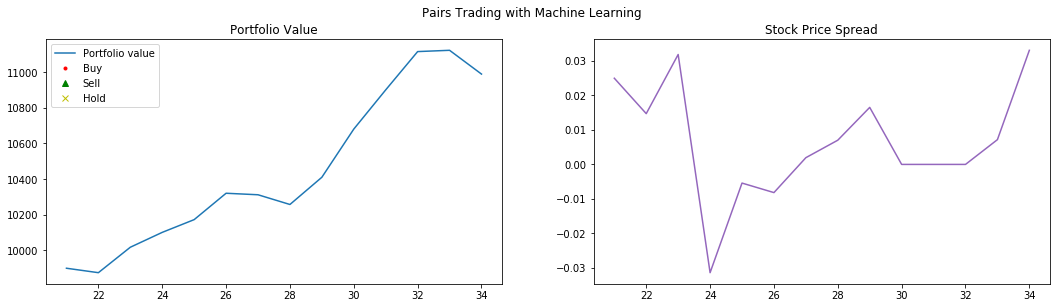

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22850177 0.22853708 0.22787362]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.34743798]
 [0.32612684 0.32454216 0.32733318]
 [0.33254945 0.3316848  0.3328854 ]
 [0.3390187  0.3385298  0.34017783]
 [0.31330526 0.31277192 0.31326014]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34675777 0.34675026 0.34735844]
 [0.33277297 0.33038363 0.33483514]
 [0.33186102 0.33076522 0.33269638]
 [0.31999177 0.3201783  0.32045344]
 [0.317797   0.3176583  0.31766495]], shape=(14, 3), dtype=float32)


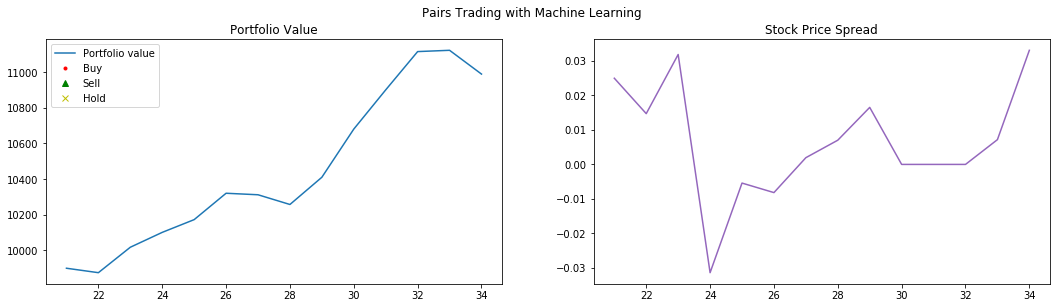

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22840562 0.22844094 0.22777748]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.32605404 0.32446936 0.32726038]
 [0.33252874 0.3316641  0.3328647 ]
 [0.3389715  0.3384826  0.34013063]
 [0.3133183  0.31278497 0.3132732 ]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.3466216  0.3466141  0.34722227]
 [0.33276406 0.33037472 0.33482623]
 [0.33181256 0.33071676 0.33264792]
 [0.31987447 0.320061   0.32033613]
 [0.31770957 0.31757087 0.3175775 ]], shape=(14, 3), dtype=float32)


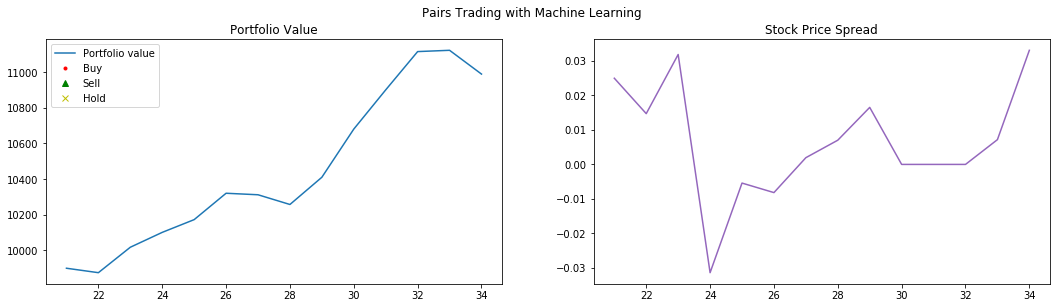

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2282232  0.22825852 0.22759506]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.32591072 0.32432604 0.32711706]
 [0.33243233 0.33156767 0.3327683 ]
 [0.3388552  0.3383663  0.34001434]
 [0.31325078 0.31271744 0.31320566]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34639132 0.3463838  0.346992  ]
 [0.33267477 0.33028543 0.33473694]
 [0.33169037 0.33059457 0.33252573]
 [0.31965294 0.31983948 0.3201146 ]
 [0.31753698 0.31739828 0.31740493]], shape=(14, 3), dtype=float32)


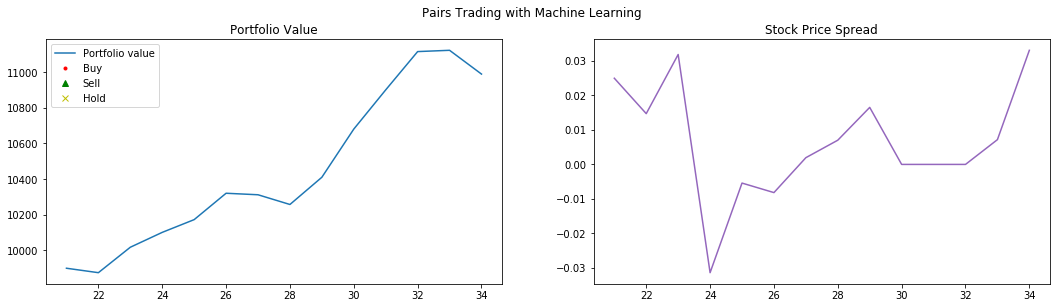

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2280643  0.22809961 0.22743616]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.3257919  0.3242072  0.3269982 ]
 [0.33234555 0.3314809  0.3326815 ]
 [0.33873606 0.33824715 0.3398952 ]
 [0.31318158 0.31264824 0.31313646]
 [0.32801157 0.32812214 0.32799867]
 [0.348781   0.34803098 0.3475215 ]
 [0.34617478 0.34616727 0.34677547]
 [0.33258182 0.33019248 0.334644  ]
 [0.33160147 0.33050567 0.33243683]
 [0.3194582  0.31964472 0.31991985]
 [0.31738245 0.31724375 0.3172504 ]], shape=(14, 3), dtype=float32)


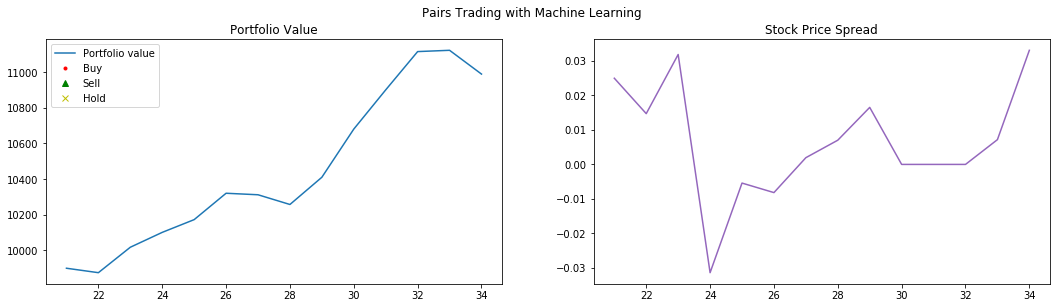

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22846927 0.22850458 0.22784112]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.32614288 0.32455817 0.3273492 ]
 [0.33269954 0.33183488 0.3330355 ]
 [0.33914727 0.33865836 0.3403064 ]
 [0.3135244  0.31299105 0.31347927]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34652185 0.34651434 0.34712252]
 [0.33289316 0.33050382 0.33495533]
 [0.3318974  0.3308016  0.33273277]
 [0.31977132 0.31995788 0.320233  ]
 [0.31778803 0.31764933 0.31765598]], shape=(14, 3), dtype=float32)


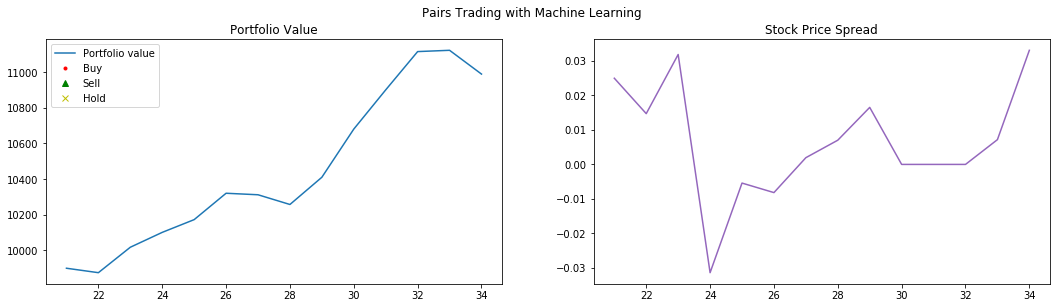

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22868167 0.22871698 0.22805353]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.32632533 0.32474065 0.32753164]
 [0.33285767 0.331993   0.33319363]
 [0.33930546 0.33881655 0.3404646 ]
 [0.31366336 0.31313002 0.31361824]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34667826 0.34667075 0.34727892]
 [0.33301115 0.3306218  0.33507332]
 [0.33204237 0.33094656 0.33287773]
 [0.31992063 0.3201072  0.3203823 ]
 [0.31800154 0.31786284 0.31786948]], shape=(14, 3), dtype=float32)


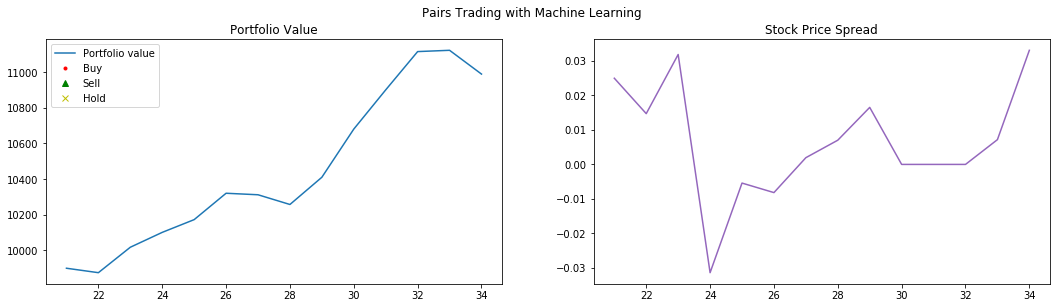

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22858195 0.22861727 0.2279538 ]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.3262269  0.3246422  0.3274332 ]
 [0.33270234 0.33183768 0.3330383 ]
 [0.33912054 0.33863163 0.34027967]
 [0.31351027 0.31297693 0.31346515]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34652066 0.34651315 0.34712133]
 [0.3328367  0.33044738 0.33489886]
 [0.33189565 0.33079985 0.332731  ]
 [0.3197206  0.31990716 0.32018226]
 [0.31790423 0.31776553 0.31777218]], shape=(14, 3), dtype=float32)


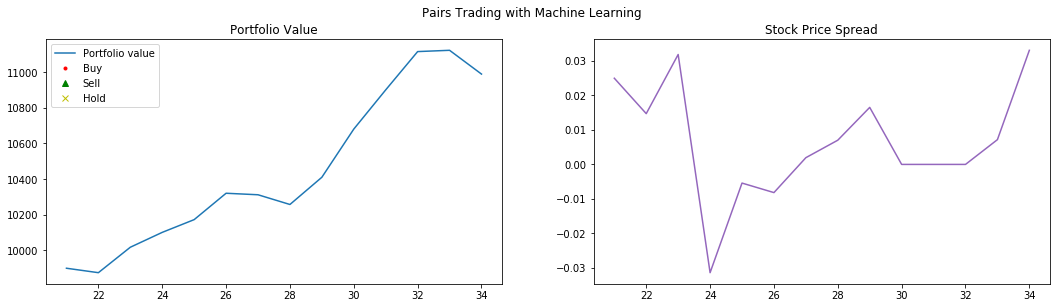

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22831137 0.22834669 0.22768323]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.32597023 0.32438555 0.32717654]
 [0.33243847 0.3315738  0.33277443]
 [0.33880538 0.33831647 0.3399645 ]
 [0.3132646  0.31273127 0.3132195 ]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.3461942  0.3461867  0.3467949 ]
 [0.3325707  0.3301814  0.33463287]
 [0.33164072 0.33054492 0.33247608]
 [0.319421   0.31960756 0.31988266]
 [0.31763792 0.31749922 0.31750587]], shape=(14, 3), dtype=float32)


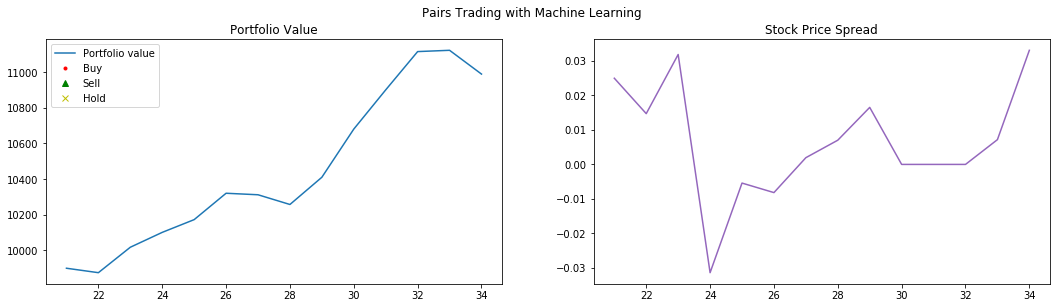

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2281011  0.22813642 0.22747296]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.32578415 0.32419947 0.32699046]
 [0.33223608 0.33137143 0.33257204]
 [0.33858675 0.33809784 0.33974588]
 [0.31307974 0.3125464  0.31303462]
 [0.32801157 0.32812214 0.32799867]
 [0.34878534 0.34803534 0.34752586]
 [0.34592453 0.34591702 0.3465252 ]
 [0.33237675 0.32998744 0.33443892]
 [0.33147186 0.33037606 0.33230722]
 [0.3191945  0.31938106 0.31965616]
 [0.31743225 0.31729355 0.3173002 ]], shape=(14, 3), dtype=float32)


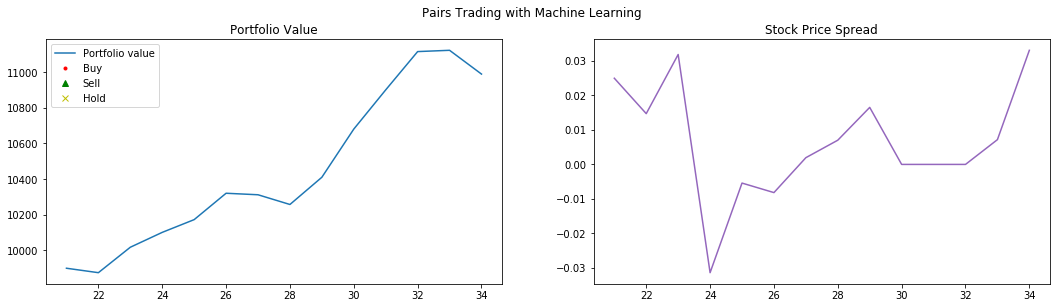

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2285864  0.22862172 0.22795826]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.3261845  0.32459983 0.32739082]
 [0.33260635 0.33174172 0.33294234]
 [0.3390951  0.33860618 0.34025422]
 [0.31343314 0.3128998  0.31338802]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.3463495  0.346342   0.34695017]
 [0.33269665 0.33030733 0.33475882]
 [0.33177385 0.33067805 0.3326092 ]
 [0.3195502  0.31973675 0.32001185]
 [0.31792113 0.31778243 0.31778908]], shape=(14, 3), dtype=float32)


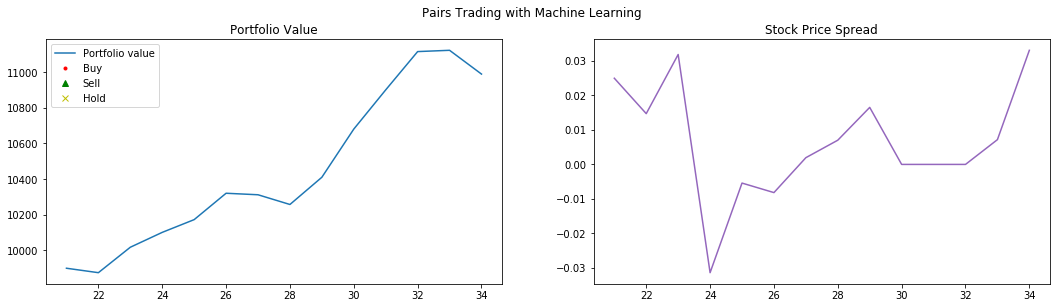

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22887309 0.2289084  0.22824495]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.32645264 0.32486796 0.32765895]
 [0.33282116 0.33195654 0.33315715]
 [0.33938548 0.33889657 0.3405446 ]
 [0.31366405 0.3131307  0.31361893]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34660703 0.34659952 0.3472077 ]
 [0.33290443 0.33051512 0.3349666 ]
 [0.33196378 0.33086798 0.33279914]
 [0.31978127 0.31996784 0.32024294]
 [0.31821048 0.31807178 0.31807843]], shape=(14, 3), dtype=float32)


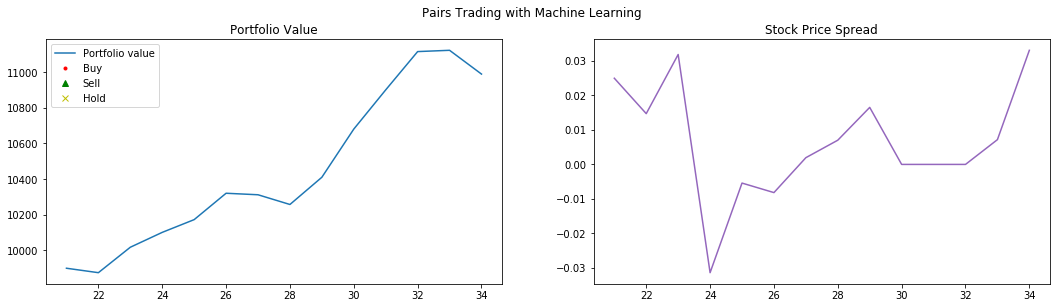

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22879678 0.2288321  0.22816864]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.32641783 0.32483315 0.32762414]
 [0.33273962 0.331875   0.3330756 ]
 [0.33932367 0.33883476 0.3404828 ]
 [0.31364417 0.31311083 0.31359905]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34648767 0.34648016 0.34708834]
 [0.33286223 0.33047292 0.3349244 ]
 [0.33189413 0.33079833 0.3327295 ]
 [0.3196695  0.31985608 0.32013118]
 [0.3181373  0.3179986  0.31800523]], shape=(14, 3), dtype=float32)


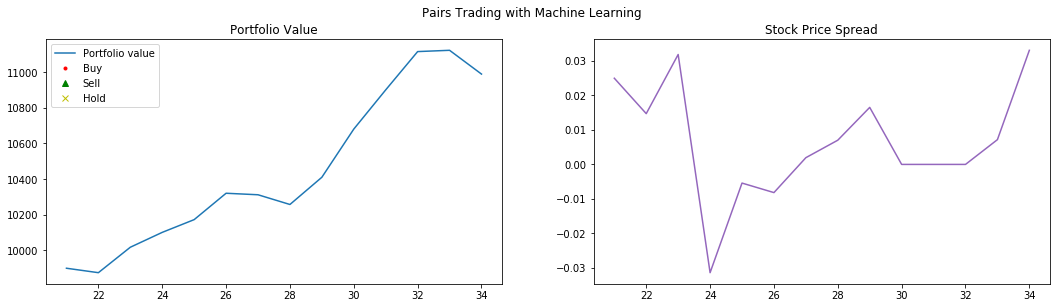

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22844473 0.22848004 0.22781658]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.3261406  0.32455593 0.32734692]
 [0.3324381  0.3315735  0.3327741 ]
 [0.33899876 0.33850986 0.3401579 ]
 [0.31343874 0.3129054  0.31339362]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34610352 0.346096   0.34670419]
 [0.33263868 0.33024937 0.33470085]
 [0.33162507 0.33052924 0.3324604 ]
 [0.3192879  0.31947446 0.31974956]
 [0.3177992  0.3176605  0.31766716]], shape=(14, 3), dtype=float32)


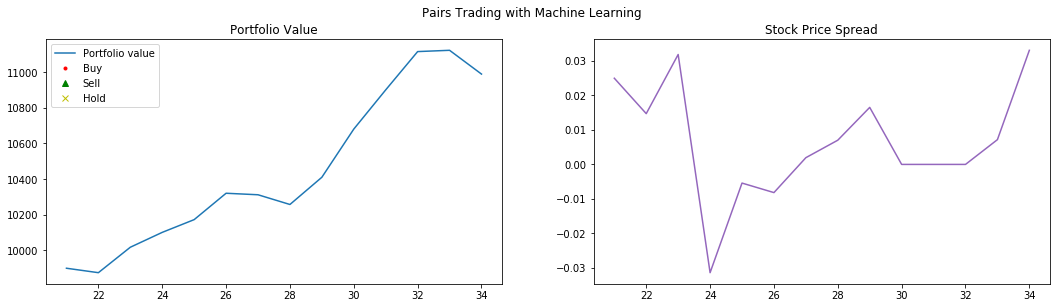

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22810793 0.22814324 0.22747979]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.32584673 0.32426205 0.32705304]
 [0.3321737  0.33130908 0.3325097 ]
 [0.33871576 0.33822685 0.3398749 ]
 [0.31326905 0.3127357  0.31322393]
 [0.32801157 0.32812214 0.32799867]
 [0.34877944 0.34802943 0.34751996]
 [0.3457263  0.3457188  0.34632698]
 [0.33245215 0.33006284 0.33451432]
 [0.33137685 0.33028102 0.33221218]
 [0.31892464 0.3191112  0.3193863 ]
 [0.31747088 0.31733215 0.31733882]], shape=(14, 3), dtype=float32)


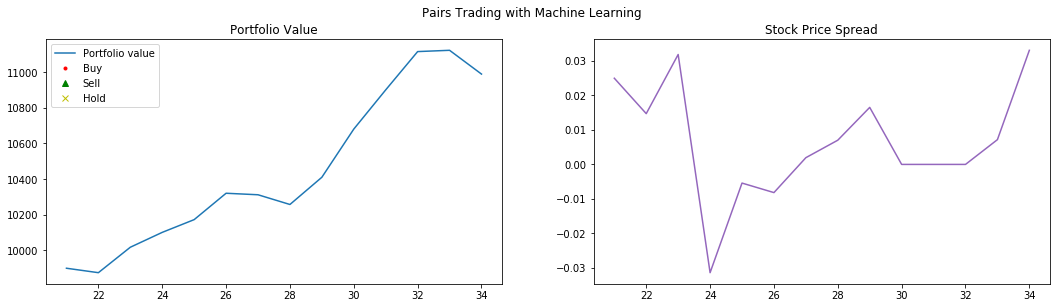

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22851112 0.22854644 0.22788298]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.32613316 0.32454848 0.32733947]
 [0.33250746 0.33164284 0.33284345]
 [0.33912754 0.33863863 0.34028667]
 [0.31362844 0.3130951  0.3135833 ]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34612113 0.34611362 0.3467218 ]
 [0.33278587 0.33039656 0.33484805]
 [0.33160454 0.3305087  0.3324399 ]
 [0.31921694 0.3194035  0.3196786 ]
 [0.31786454 0.31772578 0.31773245]], shape=(14, 3), dtype=float32)


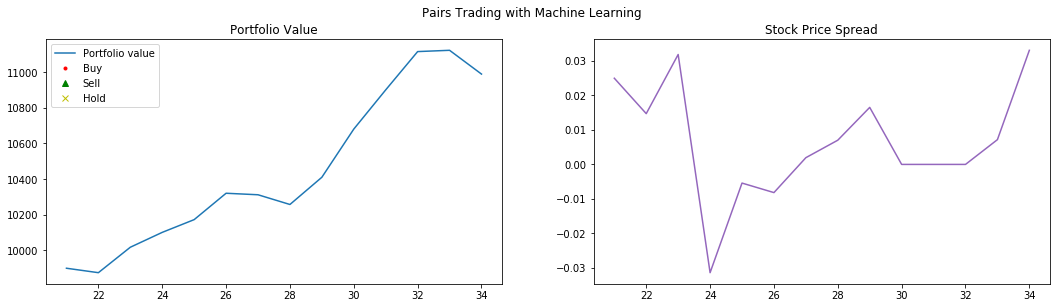

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2287425  0.22877781 0.22811435]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.32631907 0.3247344  0.32752538]
 [0.33269623 0.3318316  0.33303222]
 [0.33932447 0.33883554 0.3404836 ]
 [0.31380582 0.31327248 0.3137607 ]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.3463394  0.3463319  0.34694007]
 [0.33293685 0.33054754 0.33499902]
 [0.33175594 0.3306601  0.33259127]
 [0.31940532 0.31959188 0.31986699]
 [0.31809422 0.3179555  0.31796217]], shape=(14, 3), dtype=float32)


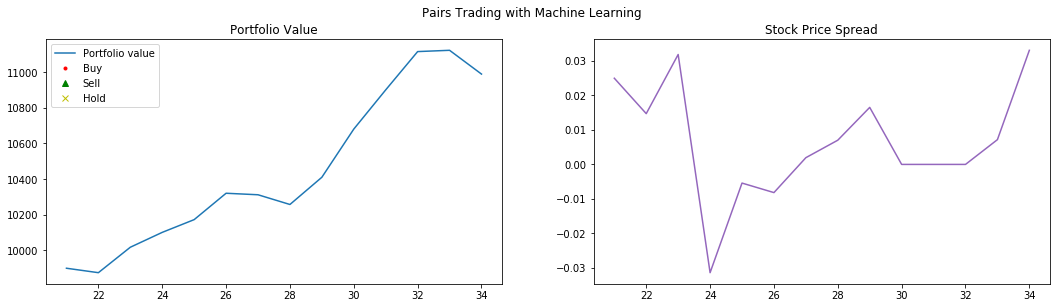

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22869551 0.22873083 0.22806737]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.326298   0.32471332 0.3275043 ]
 [0.33262846 0.33176383 0.33296445]
 [0.33923614 0.33874723 0.34039527]
 [0.3137196  0.31318626 0.31367448]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34621552 0.346208   0.34681618]
 [0.33282635 0.33043703 0.33488852]
 [0.33174473 0.3306489  0.33258006]
 [0.31931496 0.31950152 0.31977662]
 [0.31805128 0.31791252 0.3179192 ]], shape=(14, 3), dtype=float32)


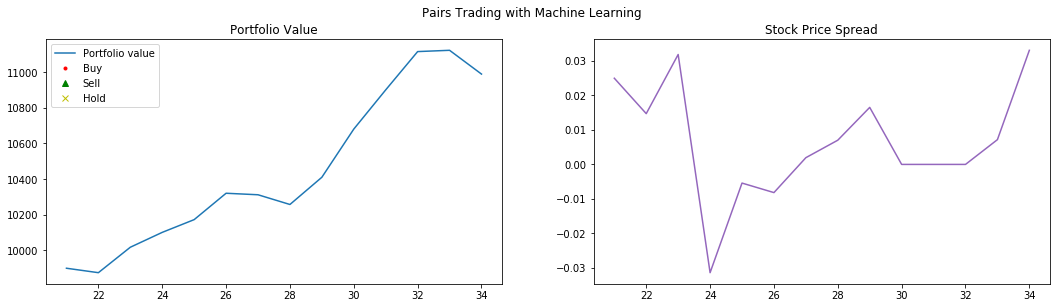

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22850446 0.22853978 0.22787632]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.32617214 0.32458746 0.32737845]
 [0.33237284 0.33150822 0.33270884]
 [0.33897808 0.33848917 0.3401372 ]
 [0.31345308 0.31291974 0.31340796]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34591314 0.34590563 0.3465138 ]
 [0.33253986 0.33015054 0.33460203]
 [0.3316144  0.33051857 0.33244973]
 [0.3190573  0.31924385 0.31951895]
 [0.3178729  0.31773418 0.31774086]], shape=(14, 3), dtype=float32)


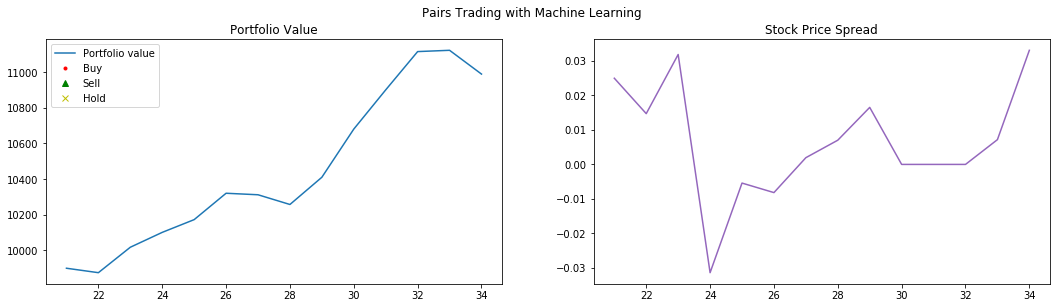

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22832088 0.2283562  0.22769274]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.32607263 0.32448795 0.32727894]
 [0.33214766 0.33128303 0.33248365]
 [0.33874893 0.33826002 0.33990806]
 [0.3132583  0.31272495 0.31321317]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34565336 0.34564584 0.34625402]
 [0.33232227 0.32993296 0.33438444]
 [0.3315107  0.33041486 0.33234602]
 [0.31884643 0.319033   0.3193081 ]
 [0.31771278 0.31757408 0.31758076]], shape=(14, 3), dtype=float32)


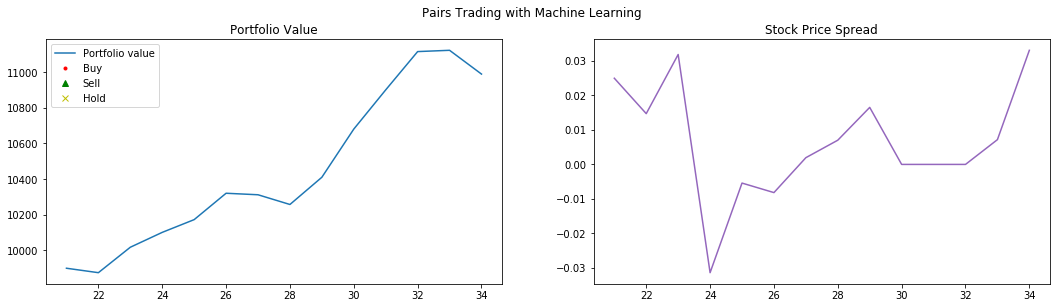

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22828186 0.22831717 0.22765371]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.3261304  0.3245457  0.3273367 ]
 [0.33209446 0.33122984 0.33243045]
 [0.3387318  0.3382429  0.33989093]
 [0.31325942 0.31272608 0.3132143 ]
 [0.32801157 0.32812214 0.32799867]
 [0.3488765  0.3481265  0.34761703]
 [0.34557062 0.3455631  0.3461713 ]
 [0.3323021  0.32991278 0.33436427]
 [0.33156013 0.3304643  0.33239546]
 [0.31883225 0.3190188  0.31929392]
 [0.31772378 0.31758505 0.31759173]], shape=(14, 3), dtype=float32)


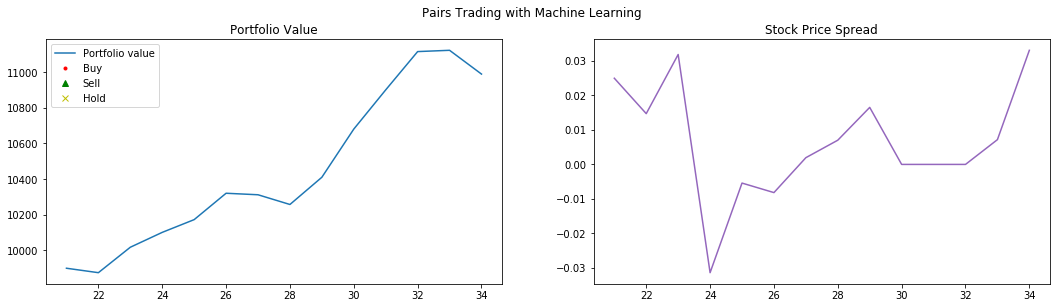

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.228947   0.22898231 0.22831886]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.32671788 0.32513323 0.3279242 ]
 [0.33260804 0.33174342 0.33294404]
 [0.3394122  0.3389233  0.34057134]
 [0.31380418 0.31327084 0.31375906]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.3461944  0.34618688 0.34679505]
 [0.33281854 0.33042923 0.3348807 ]
 [0.33203653 0.3309407  0.33287185]
 [0.3193646  0.31955117 0.31982628]
 [0.31837428 0.31823555 0.31824222]], shape=(14, 3), dtype=float32)


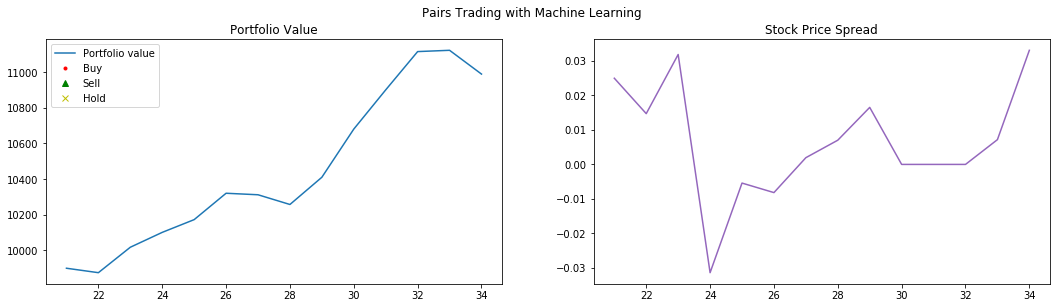

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2291848  0.22922012 0.22855666]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.32695085 0.3253662  0.32815713]
 [0.33281967 0.33195505 0.33315566]
 [0.33966422 0.3391753  0.34082335]
 [0.3140583  0.31352496 0.31401318]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34645602 0.3464485  0.3470567 ]
 [0.33304644 0.33065712 0.3351086 ]
 [0.33222184 0.331126   0.33305717]
 [0.3195591  0.31974566 0.32002077]
 [0.31860614 0.31846744 0.31847405]], shape=(14, 3), dtype=float32)


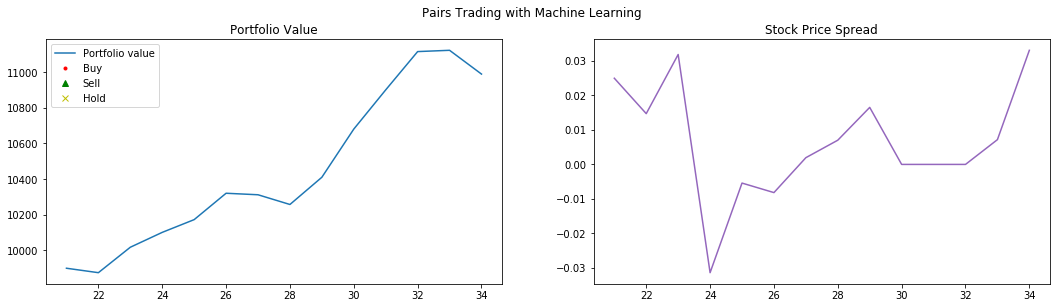

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22888978 0.2289251  0.22826163]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.32669592 0.32511127 0.32790223]
 [0.332612   0.33174738 0.332948  ]
 [0.33935612 0.33886722 0.34051526]
 [0.31387863 0.31334528 0.3138335 ]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.3461535  0.346146   0.34675416]
 [0.33284292 0.33045357 0.33490506]
 [0.33201018 0.33091435 0.3328455 ]
 [0.31922472 0.31941128 0.31968638]
 [0.31830755 0.31816882 0.31817546]], shape=(14, 3), dtype=float32)


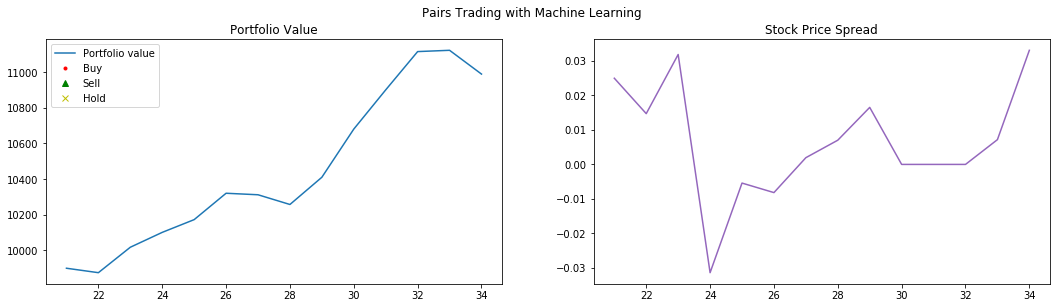

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22838905 0.22842437 0.22776091]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.32622886 0.3246442  0.32743517]
 [0.3322331  0.33136848 0.3325691 ]
 [0.33881602 0.3383271  0.33997515]
 [0.31346217 0.31292883 0.31341705]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34563825 0.34563074 0.3462389 ]
 [0.33240432 0.33001497 0.33446646]
 [0.3316147  0.33051887 0.33245003]
 [0.31870893 0.3188955  0.3191706 ]
 [0.31779346 0.31765473 0.31766137]], shape=(14, 3), dtype=float32)


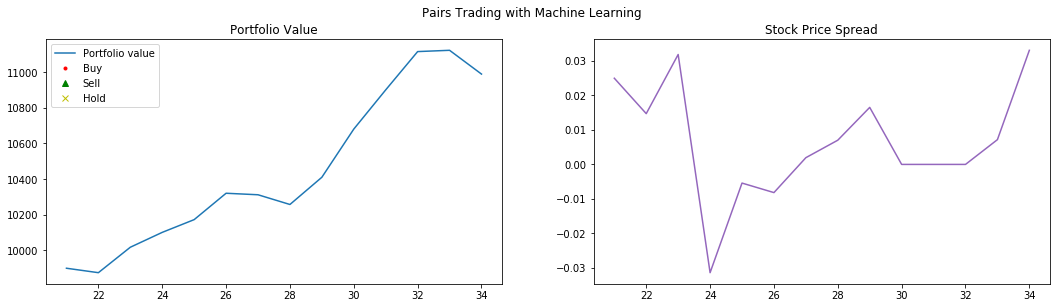

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22809651 0.22813183 0.22746837]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.3259491  0.32436445 0.3271554 ]
 [0.33204806 0.33118343 0.33238405]
 [0.33851844 0.33802953 0.33967757]
 [0.31321466 0.31268132 0.31316954]
 [0.32801157 0.32812214 0.32799867]
 [0.34882164 0.34807163 0.34756216]
 [0.34533837 0.34533086 0.34593904]
 [0.33213022 0.32974088 0.33419237]
 [0.33137795 0.33028212 0.33221328]
 [0.31842747 0.31861404 0.31888914]
 [0.31750023 0.3173615  0.31736815]], shape=(14, 3), dtype=float32)


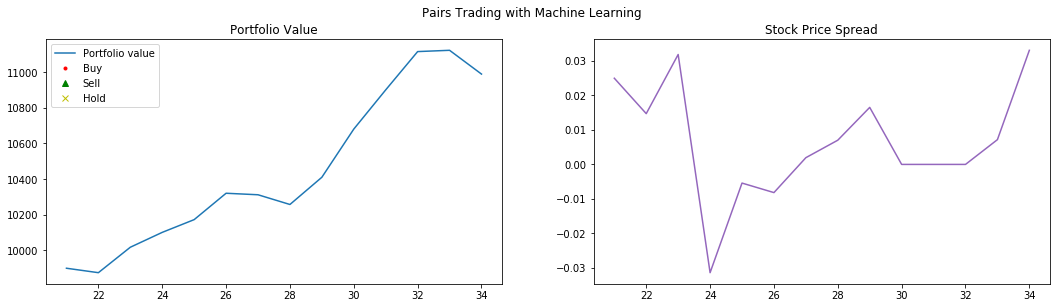

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22876215 0.22879747 0.228134  ]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.32647407 0.32488942 0.32768038]
 [0.3326287  0.33176407 0.3329647 ]
 [0.33917928 0.33869037 0.3403384 ]
 [0.3137144  0.31318107 0.31366926]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34596375 0.34595624 0.3465644 ]
 [0.33259952 0.33021018 0.33466166]
 [0.33177102 0.33067518 0.33260635]
 [0.31884125 0.3190278  0.31930292]
 [0.31817755 0.31803882 0.31804547]], shape=(14, 3), dtype=float32)


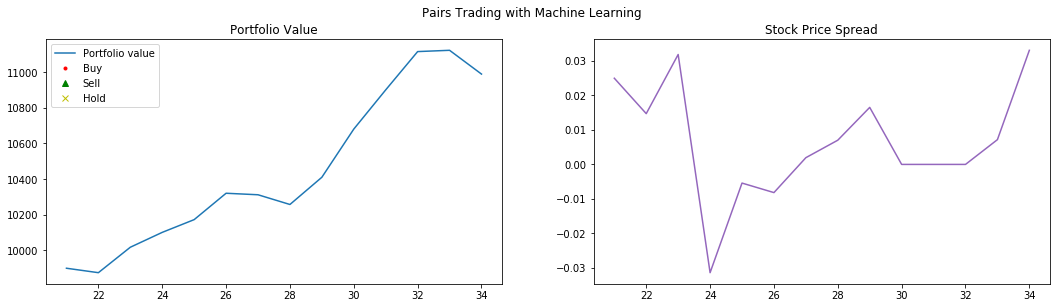

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22925445 0.22928977 0.22862631]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32689047 0.32530582 0.32809678]
 [0.33307242 0.33220783 0.33340842]
 [0.339688   0.3391991  0.34084713]
 [0.3140876  0.31355423 0.31404245]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.3464708  0.3464633  0.34707147]
 [0.33294463 0.33055532 0.33500677]
 [0.3320822  0.33098638 0.33291754]
 [0.31928512 0.3194717  0.3197468 ]
 [0.31868196 0.31854323 0.31854987]], shape=(14, 3), dtype=float32)


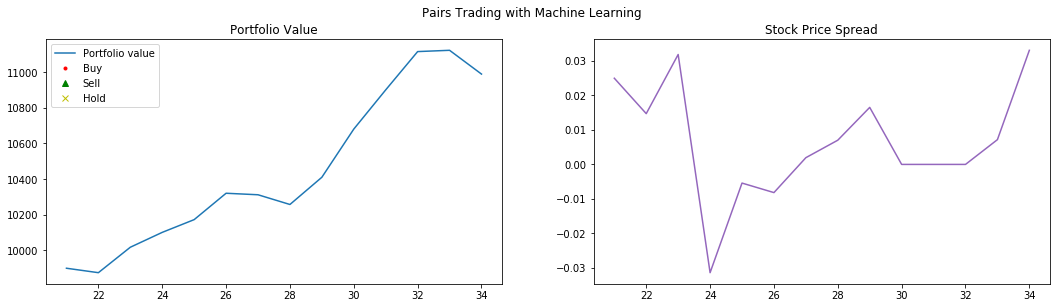

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22919516 0.22923048 0.22856702]
 [0.33129233 0.3308067  0.33035004]
 [0.3475305  0.34837854 0.347438  ]
 [0.326841   0.32525635 0.32804728]
 [0.33303896 0.33217436 0.33337495]
 [0.33963105 0.33914214 0.34079018]
 [0.31400082 0.31346744 0.31395566]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34637582 0.3463683  0.3469765 ]
 [0.33283174 0.3304424  0.33489388]
 [0.33203843 0.3309426  0.33287376]
 [0.31915882 0.31934538 0.3196205 ]
 [0.31862646 0.31848773 0.31849438]], shape=(14, 3), dtype=float32)


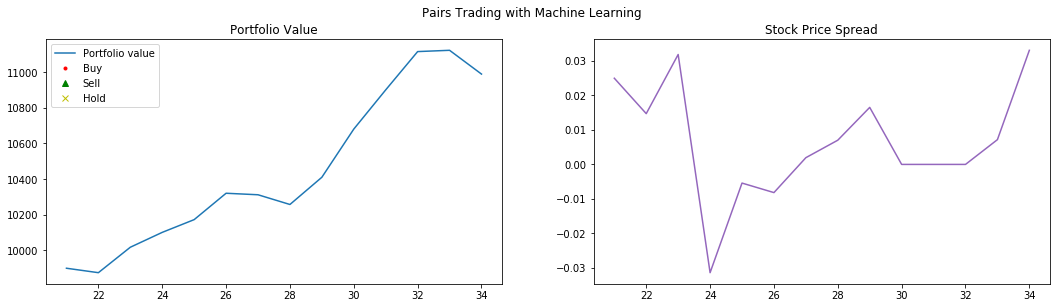

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22868997 0.22872528 0.22806183]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.3264159  0.32483125 0.32762218]
 [0.3326166  0.331752   0.3329526 ]
 [0.3391324  0.3386435  0.34029153]
 [0.31356794 0.31303456 0.3135228 ]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34581977 0.34581226 0.34642044]
 [0.33237353 0.3299842  0.33443567]
 [0.33172455 0.33062872 0.33255988]
 [0.31858563 0.3187722  0.3190473 ]
 [0.31810817 0.31796944 0.3179761 ]], shape=(14, 3), dtype=float32)


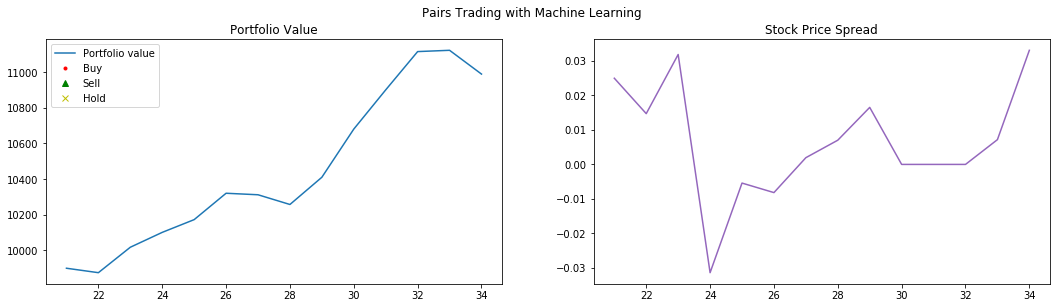

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22817466 0.22820997 0.22754651]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32601547 0.32443082 0.32722175]
 [0.33222368 0.3313591  0.33255967]
 [0.33867806 0.33818915 0.3398372 ]
 [0.3132016  0.31266823 0.31315646]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.3452958  0.34528828 0.34589645]
 [0.33200702 0.32961768 0.33406916]
 [0.33146626 0.33037043 0.3323016 ]
 [0.31808066 0.31826723 0.31854233]
 [0.31758577 0.31744704 0.31745368]], shape=(14, 3), dtype=float32)


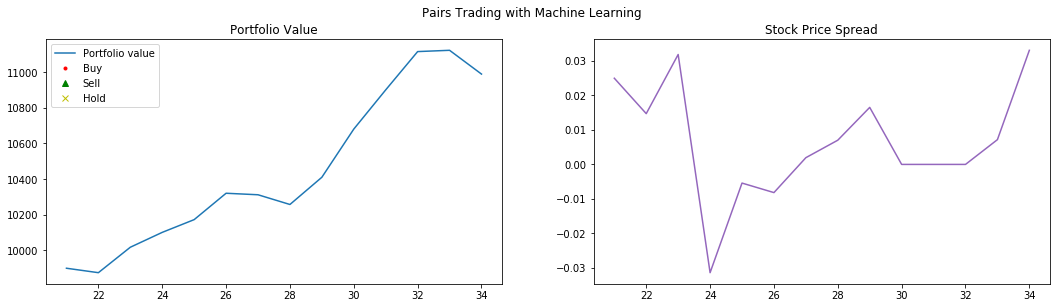

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22807917 0.22811449 0.22745103]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32595927 0.32437462 0.32716554]
 [0.33222267 0.33135808 0.33255866]
 [0.3386942  0.3382053  0.33985335]
 [0.3132872  0.31275383 0.31324205]
 [0.32801157 0.32812214 0.32799867]
 [0.34886488 0.34811488 0.3476054 ]
 [0.34514284 0.34513533 0.3457435 ]
 [0.33205175 0.3296624  0.3341139 ]
 [0.33151922 0.3304234  0.33235455]
 [0.31804955 0.3182361  0.31851122]
 [0.31749877 0.31736004 0.3173667 ]], shape=(14, 3), dtype=float32)


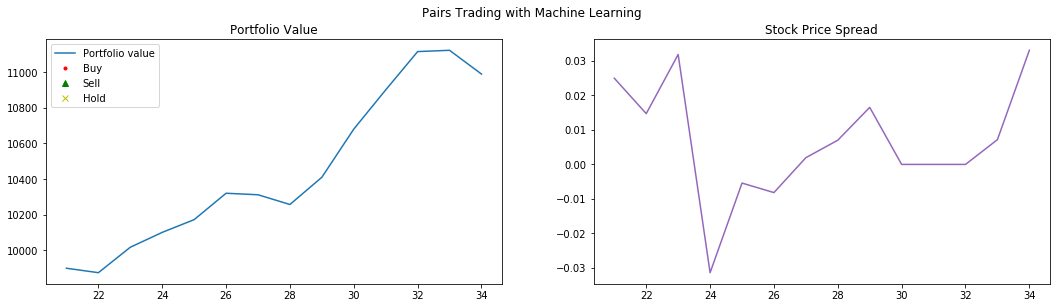

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22894233 0.22897765 0.22831419]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32668418 0.32509953 0.32789046]
 [0.33298257 0.33211797 0.33331856]
 [0.33963877 0.3391499  0.34079793]
 [0.31409085 0.31355748 0.3140457 ]
 [0.32801157 0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34595793 0.34595042 0.3465586 ]
 [0.33281764 0.3304283  0.3348798 ]
 [0.33213884 0.33104303 0.33297417]
 [0.31885806 0.31904462 0.31931973]
 [0.3183729  0.31823418 0.3182408 ]], shape=(14, 3), dtype=float32)


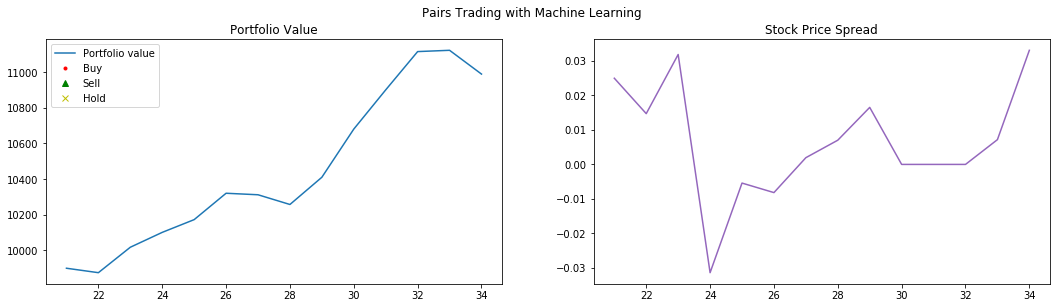

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22935611 0.22939143 0.22872797]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.3270367  0.3254521  0.328243  ]
 [0.33329204 0.33242744 0.33362803]
 [0.3400508  0.3395619  0.34120995]
 [0.3144561  0.31392273 0.31441095]
 [0.3280116  0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34637213 0.34636462 0.3469728 ]
 [0.33315396 0.3307646  0.3352161 ]
 [0.33238068 0.33128488 0.333216  ]
 [0.31921625 0.3194028  0.3196779 ]
 [0.31879157 0.31865284 0.31865945]], shape=(14, 3), dtype=float32)


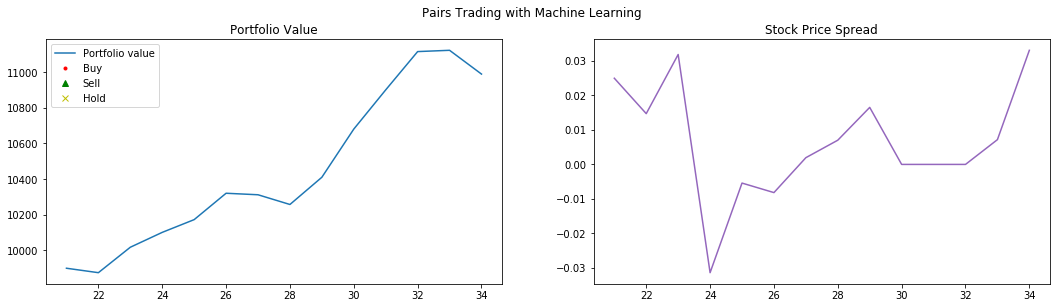

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22909425 0.22912957 0.22846611]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32678074 0.32519612 0.32798702]
 [0.33296087 0.33209628 0.33329687]
 [0.33967972 0.33919084 0.34083888]
 [0.31415173 0.31361836 0.31410658]
 [0.3280116  0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34608907 0.34608158 0.34668976]
 [0.33282745 0.3304381  0.3348896 ]
 [0.33205968 0.33096388 0.332895  ]
 [0.31875712 0.31894368 0.31921878]
 [0.31852585 0.31838712 0.31839374]], shape=(14, 3), dtype=float32)


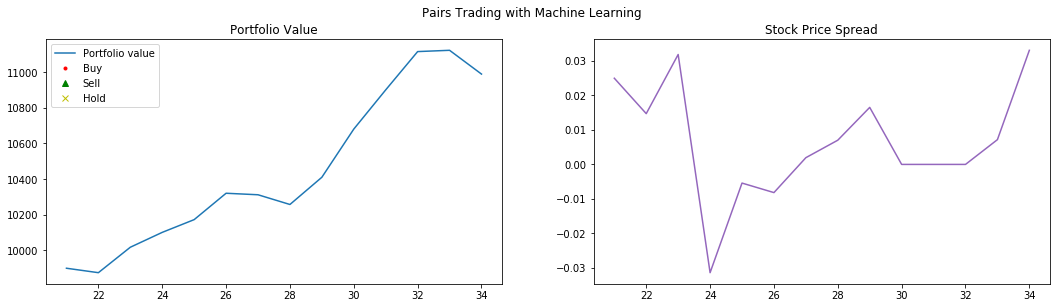

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22850654 0.22854185 0.22787839]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32624757 0.32466295 0.32745385]
 [0.33234635 0.33148178 0.33268237]
 [0.338953   0.3384641  0.34011215]
 [0.3135257  0.31299233 0.31348056]
 [0.3280116  0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34547752 0.34547004 0.34607822]
 [0.3321801  0.32979077 0.33424225]
 [0.33147854 0.33038276 0.3323139 ]
 [0.31813607 0.31832263 0.31859773]
 [0.31792602 0.3177873  0.3177939 ]], shape=(14, 3), dtype=float32)


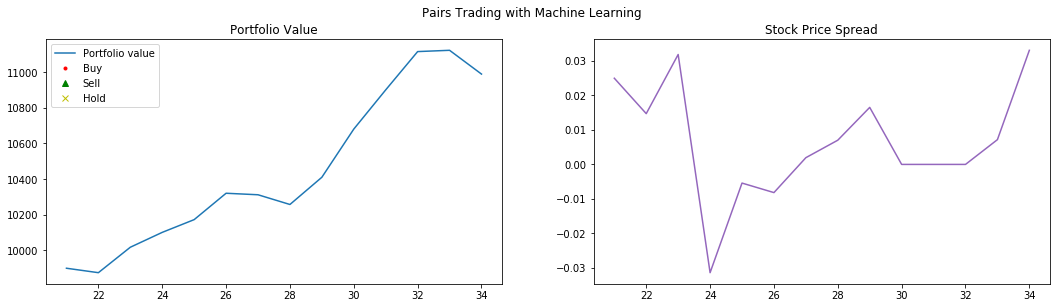

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22817521 0.22821052 0.22754706]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32595357 0.32436895 0.32715985]
 [0.33199155 0.331127   0.33232754]
 [0.33856162 0.33807275 0.3397208 ]
 [0.31314114 0.31260777 0.31309596]
 [0.3280116  0.32812214 0.32799867]
 [0.348893   0.34814298 0.3476335 ]
 [0.34509265 0.34508517 0.34569335]
 [0.33177724 0.3293879  0.3338394 ]
 [0.3311407  0.3300449  0.33197603]
 [0.31779996 0.31798652 0.31826162]
 [0.31760293 0.3174642  0.31747082]], shape=(14, 3), dtype=float32)


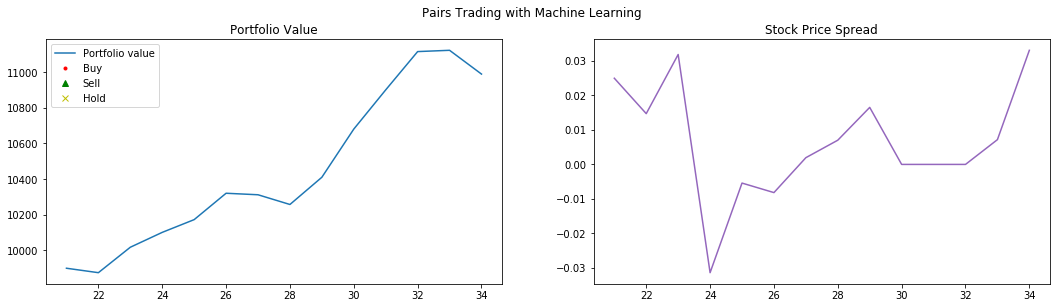

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2284128  0.22844812 0.22778466]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.3261533  0.3245687  0.3273596 ]
 [0.33216402 0.33129945 0.33250004]
 [0.33883417 0.3383453  0.33999333]
 [0.31330225 0.31276888 0.31325707]
 [0.3280116  0.32812214 0.32799867]
 [0.348893   0.34814298 0.34763354]
 [0.34521738 0.3452099  0.34581807]
 [0.33189848 0.32950914 0.33396062]
 [0.33127338 0.33017758 0.3321087 ]
 [0.3179247  0.31811127 0.31838638]
 [0.31786788 0.31772915 0.31773576]], shape=(14, 3), dtype=float32)


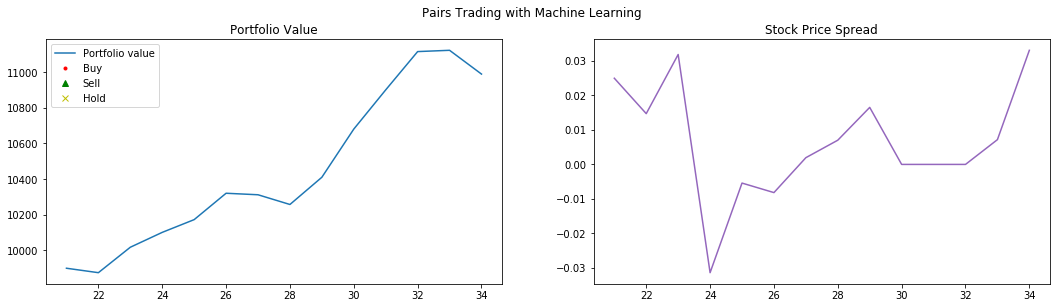

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22895621 0.22899152 0.22832806]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32665342 0.3250688  0.3278597 ]
 [0.33260983 0.33174527 0.33294585]
 [0.3394213  0.33893242 0.34058046]
 [0.31377688 0.3132435  0.3137317 ]
 [0.3280116  0.32812214 0.32799867]
 [0.348893   0.34814298 0.34763354]
 [0.3456519  0.3456444  0.3462526 ]
 [0.3323372  0.32994786 0.33439934]
 [0.33171648 0.33062068 0.3325518 ]
 [0.3183952  0.31858176 0.31885687]
 [0.31843445 0.31829572 0.31830233]], shape=(14, 3), dtype=float32)


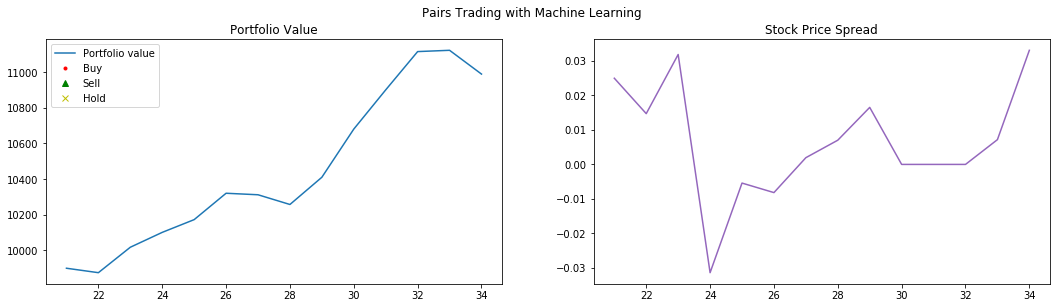

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22929281 0.22932813 0.22866467]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32700467 0.32542005 0.32821095]
 [0.33291414 0.33204958 0.33325016]
 [0.33980724 0.33931836 0.3409664 ]
 [0.3141206  0.31358722 0.3140754 ]
 [0.3280116  0.32812214 0.32799867]
 [0.348893   0.34814298 0.34763354]
 [0.34591192 0.34590444 0.34651262]
 [0.3326528  0.33026347 0.33471495]
 [0.33209875 0.33100295 0.33293408]
 [0.3187342  0.31892076 0.31919587]
 [0.31880525 0.31866652 0.31867313]], shape=(14, 3), dtype=float32)


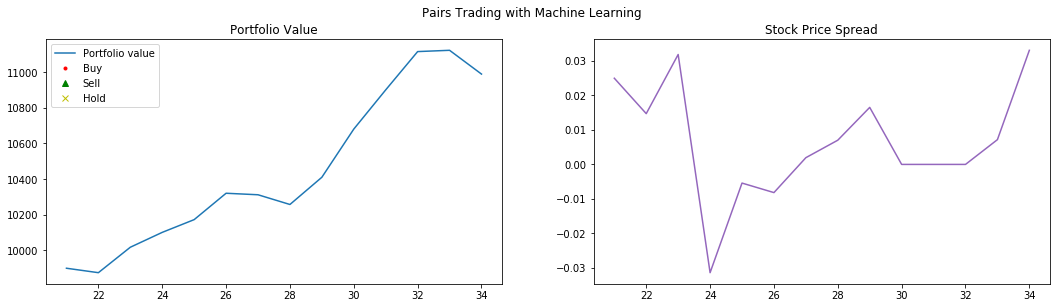

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22913918 0.2291745  0.22851104]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32694545 0.32536083 0.32815173]
 [0.33284295 0.33197838 0.33317897]
 [0.33971494 0.33922607 0.3408741 ]
 [0.31409135 0.31355798 0.31404617]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.3456907  0.3456832  0.3462914 ]
 [0.3326035  0.33021417 0.33466566]
 [0.33217013 0.33107433 0.33300546]
 [0.31861258 0.31879914 0.31907424]
 [0.31869733 0.3185586  0.31856522]], shape=(14, 3), dtype=float32)


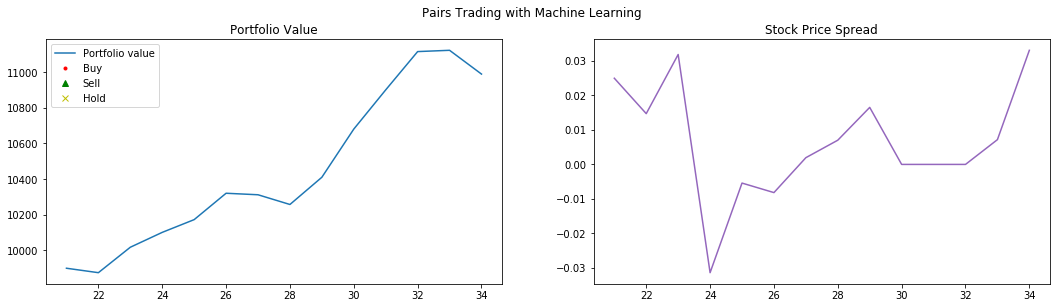

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2286056  0.22864091 0.22797745]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32656622 0.3249816  0.3277725 ]
 [0.33246958 0.33160502 0.3328056 ]
 [0.33921793 0.33872905 0.3403771 ]
 [0.31376958 0.3132362  0.3137244 ]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.34515196 0.34514445 0.34575266]
 [0.3322522  0.32986286 0.33431435]
 [0.33194903 0.33085322 0.33278435]
 [0.31817803 0.3183646  0.3186397 ]
 [0.3182222  0.31808347 0.31809008]], shape=(14, 3), dtype=float32)


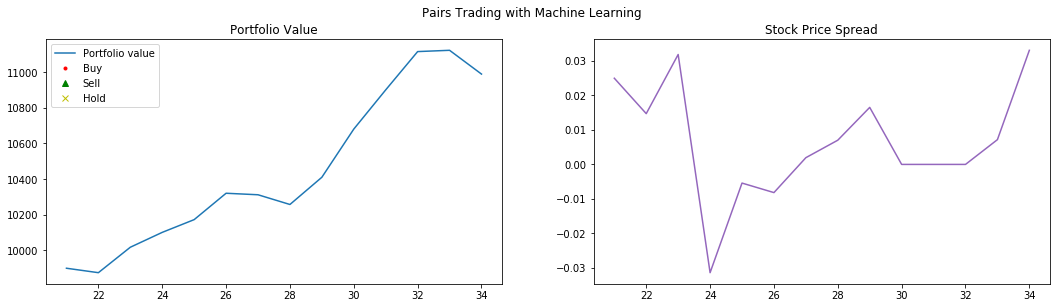

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22816902 0.22820437 0.22754091]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32624042 0.3246558  0.3274467 ]
 [0.33220196 0.3313374  0.33253798]
 [0.33882812 0.33833924 0.33998728]
 [0.31355178 0.3130184  0.3135066 ]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.34475034 0.34474283 0.34535104]
 [0.3320087  0.32961935 0.33407083]
 [0.33174336 0.33064756 0.3325787 ]
 [0.31782082 0.31800738 0.31828249]
 [0.31783354 0.3176948  0.31770143]], shape=(14, 3), dtype=float32)


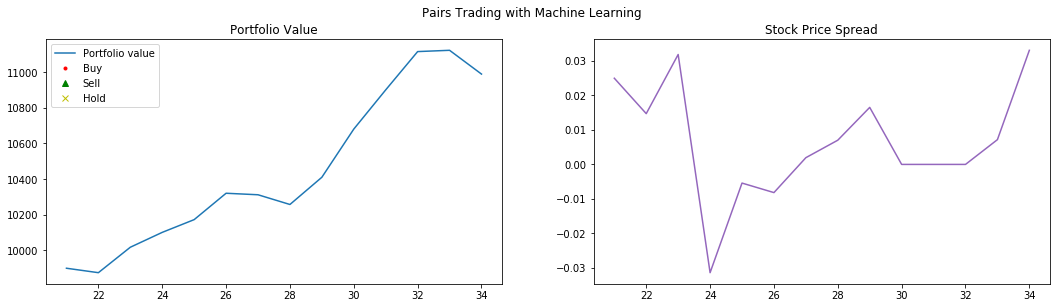

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2281892  0.22822455 0.22756109]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32624358 0.32465896 0.32744986]
 [0.33227867 0.3314141  0.3326147 ]
 [0.3388985  0.33840963 0.34005767]
 [0.31368697 0.3131536  0.3136418 ]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.34473675 0.34472924 0.34533745]
 [0.3321084  0.32971907 0.33417055]
 [0.33178514 0.33068934 0.33262047]
 [0.31780666 0.31799322 0.3182683 ]
 [0.31787065 0.31773192 0.31773853]], shape=(14, 3), dtype=float32)


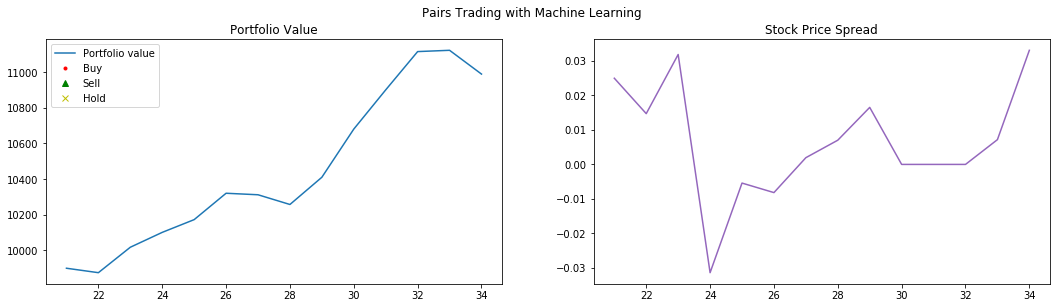

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2286178  0.22865315 0.22798969]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32655993 0.3249753  0.3277662 ]
 [0.33262485 0.3317603  0.33296087]
 [0.3393679  0.33887902 0.34052706]
 [0.31406313 0.31352976 0.31401795]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.34508598 0.34507847 0.34568667]
 [0.33244154 0.3300522  0.33450368]
 [0.3320572  0.3309614  0.33289254]
 [0.31803468 0.31822124 0.31849635]
 [0.3183079  0.31816918 0.3181758 ]], shape=(14, 3), dtype=float32)


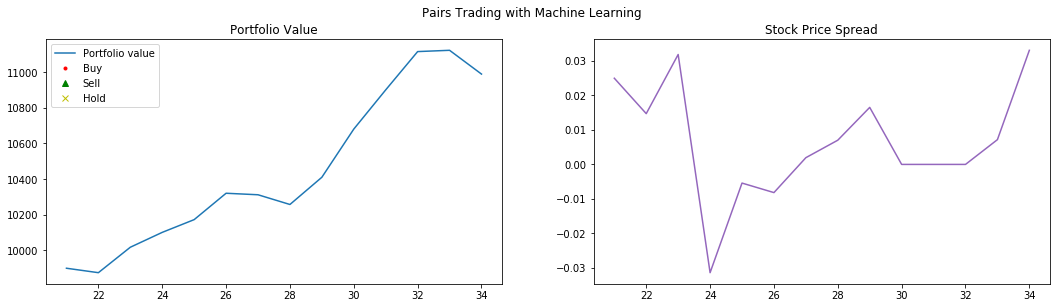

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22900492 0.22904027 0.2283768 ]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32684666 0.32526204 0.32805294]
 [0.33287388 0.33200932 0.3332099 ]
 [0.33974445 0.33925557 0.3409036 ]
 [0.3143095  0.31377614 0.31426433]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.34542203 0.34541452 0.34602273]
 [0.33263737 0.33024803 0.3346995 ]
 [0.3322496  0.3311538  0.33308494]
 [0.31834197 0.31852853 0.31880367]
 [0.31869116 0.31855243 0.31855905]], shape=(14, 3), dtype=float32)


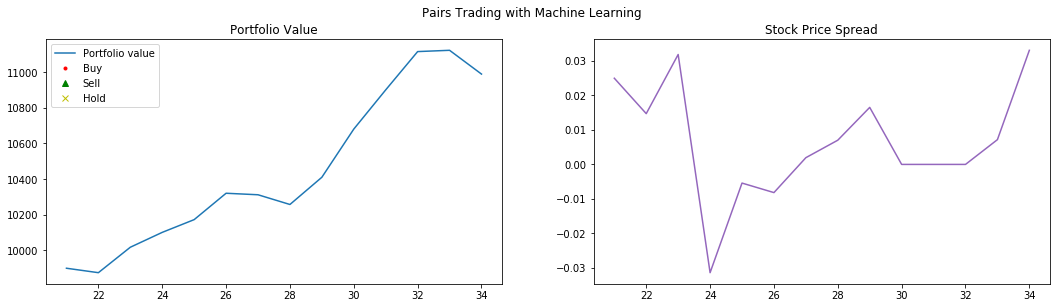

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22897911 0.22901446 0.228351  ]
 [0.33129233 0.3308067  0.33035004]
 [0.34753045 0.3483785  0.347438  ]
 [0.32682443 0.32523984 0.3280307 ]
 [0.3327785  0.33191395 0.33311453]
 [0.33966488 0.339176   0.34082404]
 [0.31416368 0.3136303  0.3141185 ]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.34536767 0.34536016 0.34596837]
 [0.3324545  0.33006516 0.33451664]
 [0.3321622  0.3310664  0.33299753]
 [0.318285   0.31847155 0.31874666]
 [0.31868023 0.3185415  0.3185481 ]], shape=(14, 3), dtype=float32)


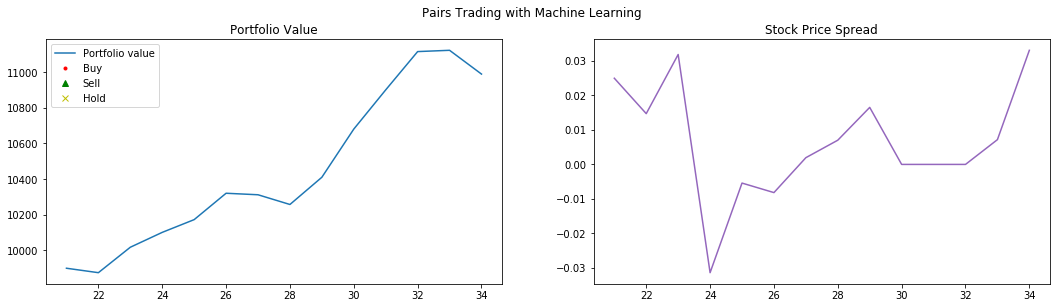

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22868615 0.2287215  0.22805804]
 [0.33129233 0.3308067  0.33035004]
 [0.34753045 0.3483785  0.347438  ]
 [0.32657355 0.32498896 0.32777983]
 [0.3324881  0.33162352 0.3328241 ]
 [0.33931866 0.3388298  0.34047782]
 [0.31383952 0.31330615 0.31379434]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.34505668 0.34504917 0.34565738]
 [0.33213085 0.32974148 0.334193  ]
 [0.3319306  0.3308348  0.33276594]
 [0.31793764 0.3181242  0.3183993 ]
 [0.3184008  0.31826207 0.3182687 ]], shape=(14, 3), dtype=float32)


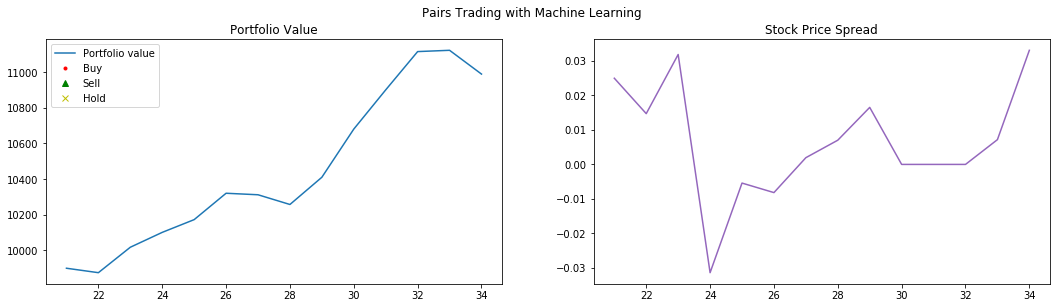

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22846405 0.2284994  0.22783594]
 [0.33129233 0.3308067  0.33035004]
 [0.34753045 0.3483785  0.347438  ]
 [0.3264024  0.3248178  0.32760867]
 [0.3322959  0.33143133 0.33263192]
 [0.3390986  0.33860973 0.34025776]
 [0.3136527  0.31311932 0.3136075 ]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.34483325 0.34482574 0.34543395]
 [0.33192343 0.32953408 0.33398557]
 [0.3318026  0.33070683 0.33263797]
 [0.31765124 0.3178378  0.3181129 ]
 [0.3181701  0.31803137 0.318038  ]], shape=(14, 3), dtype=float32)


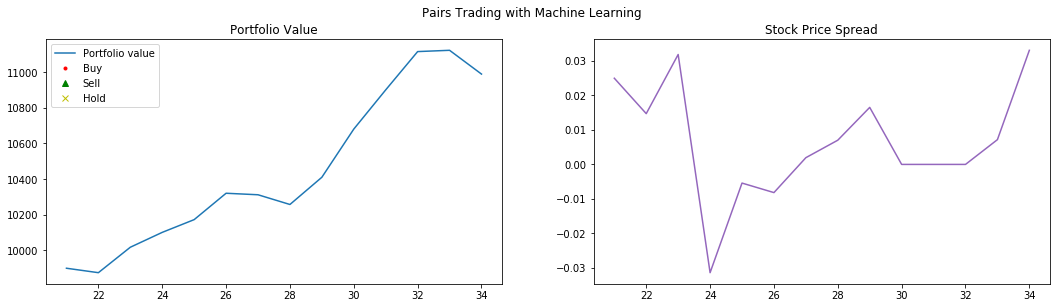

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22855312 0.22858846 0.227925  ]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32648447 0.32489988 0.32769075]
 [0.33238155 0.33151698 0.33271757]
 [0.33924153 0.33875266 0.3404007 ]
 [0.31379816 0.3132648  0.31375298]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.34489605 0.34488854 0.34549674]
 [0.33200908 0.32961974 0.33407122]
 [0.33190486 0.33080906 0.3327402 ]
 [0.31763425 0.31782082 0.31809592]
 [0.31822494 0.3180862  0.31809282]], shape=(14, 3), dtype=float32)


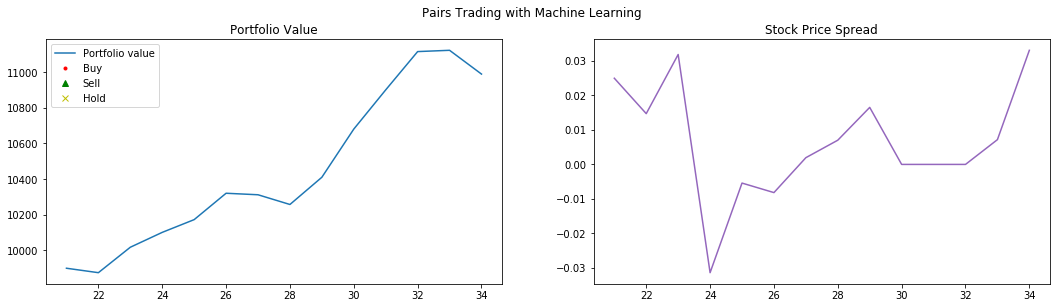

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22882459 0.2288599  0.22819644]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32669744 0.32511285 0.32790372]
 [0.33265322 0.33178866 0.33298925]
 [0.33962375 0.33913487 0.3407829 ]
 [0.31415182 0.31361845 0.31410664]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.34513187 0.34512436 0.34573257]
 [0.33231866 0.32992932 0.3343808 ]
 [0.33214542 0.33104962 0.33298075]
 [0.31784174 0.3180283  0.3183034 ]
 [0.31845346 0.31831473 0.31832135]], shape=(14, 3), dtype=float32)


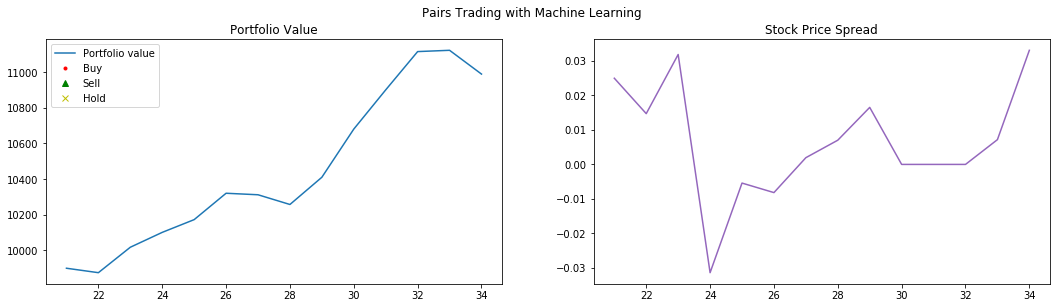

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22895706 0.22899237 0.22832891]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32679912 0.32521453 0.3280054 ]
 [0.33279568 0.3319311  0.3331317 ]
 [0.3398215  0.3393326  0.34098065]
 [0.31435293 0.31381956 0.31430775]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.34523416 0.34522665 0.34583485]
 [0.3325083  0.33011895 0.33457044]
 [0.332261   0.3311652  0.33309633]
 [0.3179251  0.31811166 0.31838676]
 [0.31856355 0.31842482 0.31843144]], shape=(14, 3), dtype=float32)


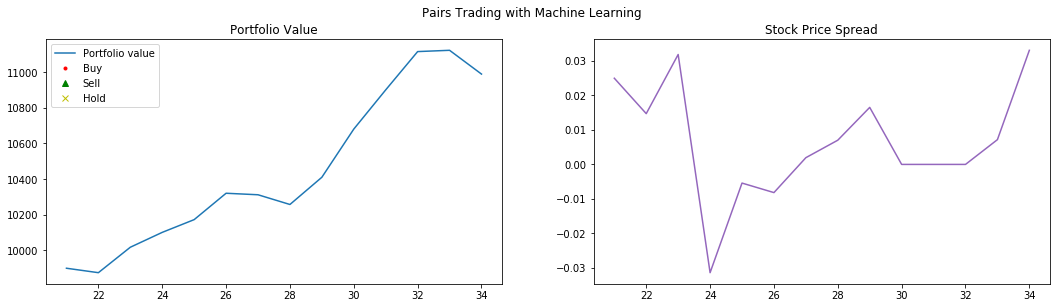

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22883223 0.22886755 0.22820409]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.3267047  0.32512012 0.327911  ]
 [0.33268544 0.33182088 0.33302146]
 [0.33969972 0.33921084 0.34085888]
 [0.31425977 0.3137264  0.3142146 ]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.345103   0.3450955  0.3457037 ]
 [0.332382   0.32999265 0.33444414]
 [0.33215183 0.33105603 0.33298716]
 [0.317753   0.31793955 0.31821465]
 [0.3184391  0.31830037 0.31830698]], shape=(14, 3), dtype=float32)


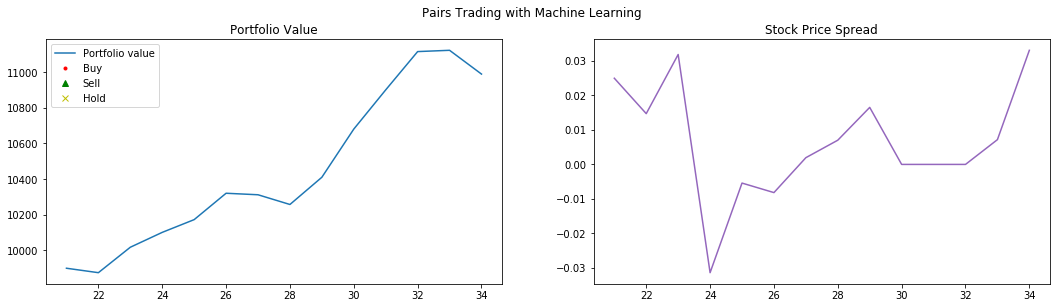

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22860575 0.22864106 0.2279776 ]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32654512 0.32496053 0.3277514 ]
 [0.33244246 0.3315779  0.33277848]
 [0.3394101  0.33892122 0.34056926]
 [0.3139807  0.31344733 0.31393552]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.34488058 0.34487307 0.34548128]
 [0.3320497  0.32966036 0.33411184]
 [0.33192435 0.33082855 0.33275968]
 [0.31745407 0.31764063 0.31791574]
 [0.31824365 0.31810492 0.31811154]], shape=(14, 3), dtype=float32)


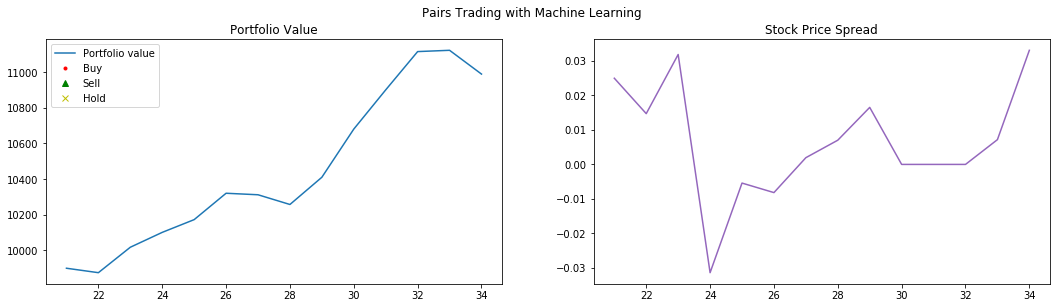

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22854054 0.22857586 0.2279124 ]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32651487 0.32493028 0.32772115]
 [0.3323641  0.33149955 0.33270013]
 [0.33930534 0.33881646 0.3404645 ]
 [0.31384468 0.3133113  0.3137995 ]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.34481275 0.34480524 0.34541345]
 [0.33187526 0.32948592 0.3339374 ]
 [0.3317921  0.33069628 0.33262742]
 [0.3173347  0.31752127 0.31779638]
 [0.31820992 0.3180712  0.3180778 ]], shape=(14, 3), dtype=float32)


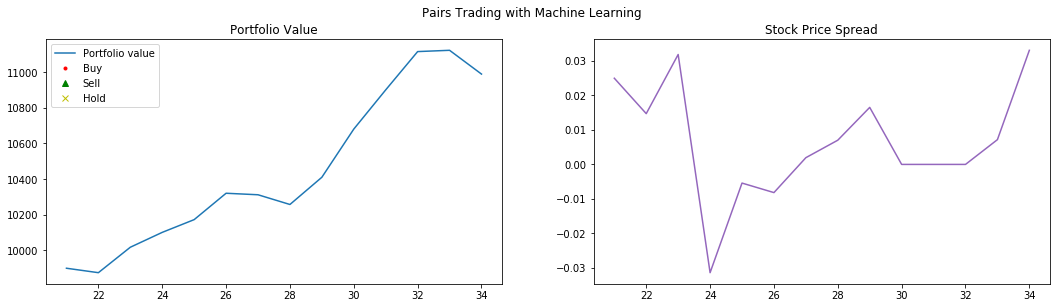

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22872846 0.22876377 0.22810031]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.3266632  0.3250786  0.32786947]
 [0.33252525 0.3316607  0.33286127]
 [0.3394915  0.3390026  0.34065065]
 [0.31397936 0.313446   0.31393418]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.34497738 0.34496987 0.34557807]
 [0.33197853 0.3295892  0.33404067]
 [0.33184737 0.33075154 0.33268267]
 [0.31744593 0.3176325  0.3179076 ]
 [0.31840324 0.3182645  0.31827113]], shape=(14, 3), dtype=float32)


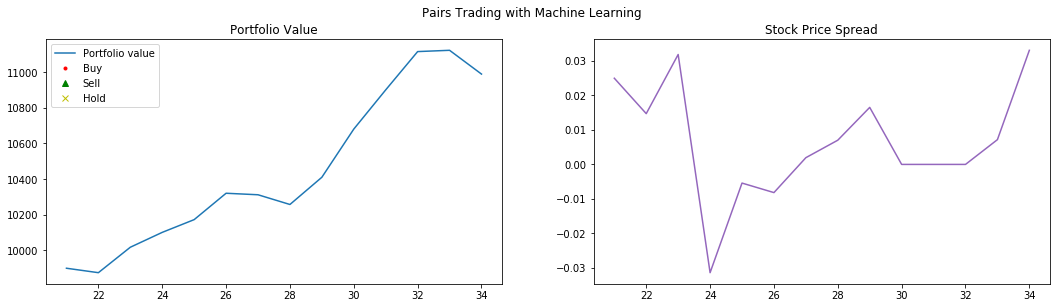

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22895642 0.22899173 0.22832827]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.3268566  0.32527202 0.3280629 ]
 [0.33272454 0.33185998 0.33306056]
 [0.33971626 0.33922738 0.34087542]
 [0.31417236 0.313639   0.31412718]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.34518355 0.34517604 0.34578425]
 [0.33213642 0.32974708 0.33419856]
 [0.33198208 0.33088627 0.3328174 ]
 [0.3176044  0.31779096 0.31806606]
 [0.31863236 0.31849363 0.31850025]], shape=(14, 3), dtype=float32)


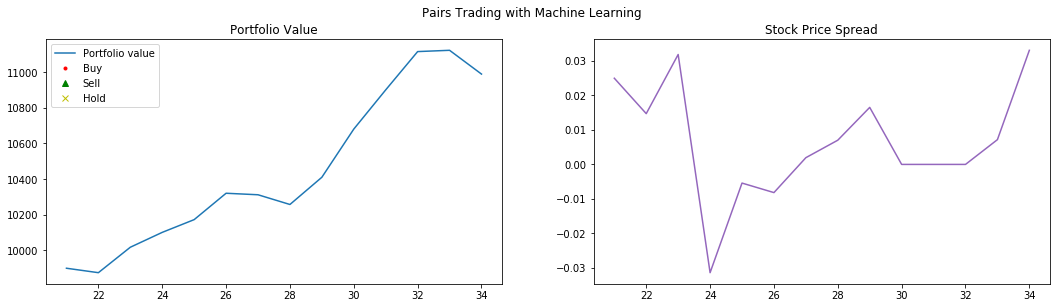

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22901312 0.22904843 0.22838497]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32692355 0.32533896 0.32812983]
 [0.33274493 0.33188036 0.33308095]
 [0.3397409  0.33925202 0.34090006]
 [0.31422347 0.3136901  0.3141783 ]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.34522393 0.34521642 0.34582463]
 [0.33215755 0.3297682  0.3342197 ]
 [0.33202934 0.33093357 0.3328647 ]
 [0.31758678 0.31777334 0.31804845]
 [0.31868008 0.31854135 0.31854796]], shape=(14, 3), dtype=float32)


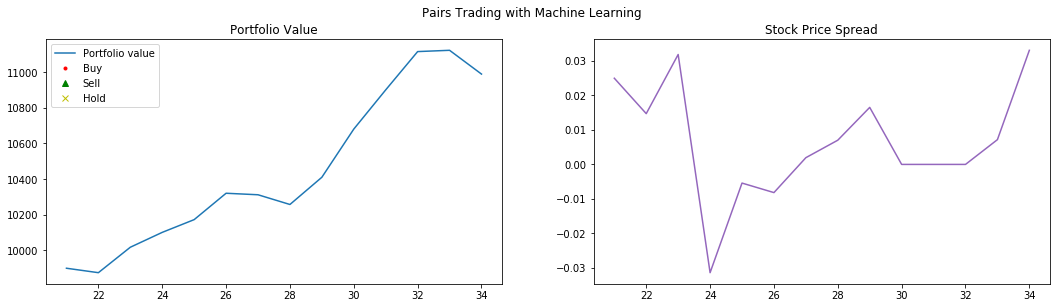

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22889212 0.22892743 0.22826397]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32683548 0.3252509  0.32804176]
 [0.3326295  0.33176494 0.33296552]
 [0.33963183 0.33914295 0.340791  ]
 [0.31417972 0.31364635 0.31413454]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.3450925  0.345085   0.3456932 ]
 [0.3320787  0.32968935 0.33414084]
 [0.3319798  0.330884   0.33281514]
 [0.31741318 0.31759977 0.31787485]
 [0.31855786 0.31841913 0.31842574]], shape=(14, 3), dtype=float32)


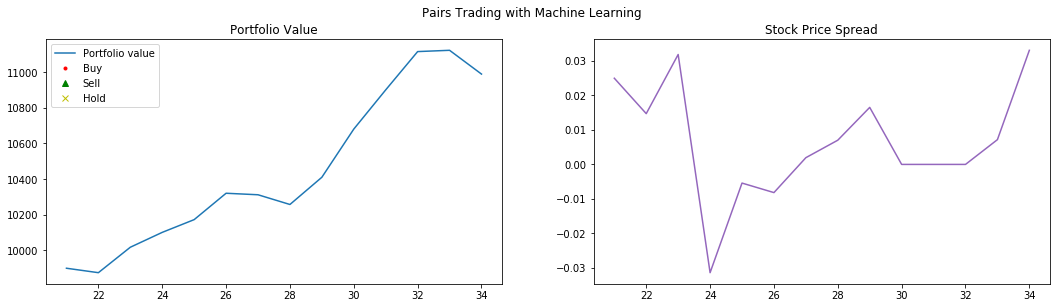

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22877109 0.2288064  0.22814295]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32672158 0.325137   0.32792786]
 [0.33251676 0.3316522  0.33285278]
 [0.33951312 0.33902422 0.34067225]
 [0.3141196  0.31358624 0.31407443]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.34763342]
 [0.34495184 0.34494433 0.34555253]
 [0.3319971  0.32960775 0.33405924]
 [0.33195475 0.33085895 0.33279008]
 [0.31721473 0.3174013  0.31767637]
 [0.31841576 0.31827703 0.31828365]], shape=(14, 3), dtype=float32)


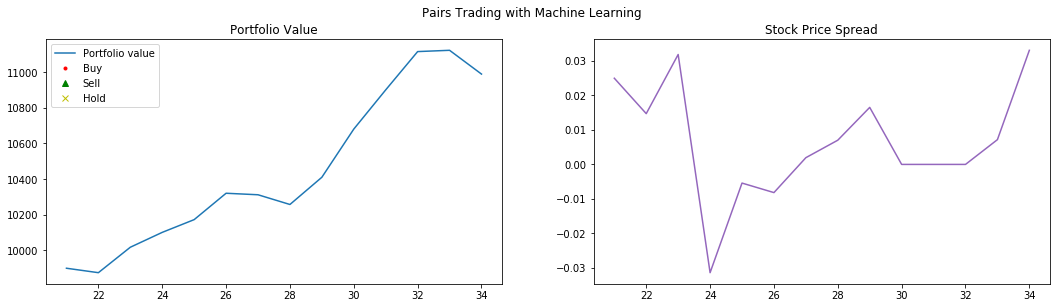

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.228755   0.22879031 0.22812685]
 [0.33129233 0.3308067  0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32669523 0.32511064 0.3279015 ]
 [0.332509   0.33164445 0.33284503]
 [0.33953962 0.3390507  0.34069875]
 [0.314157   0.31362364 0.31411183]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.3476334 ]
 [0.34489417 0.34488666 0.34549487]
 [0.3320087  0.32961935 0.33407083]
 [0.33201542 0.33091962 0.33285075]
 [0.31716514 0.31735173 0.3176268 ]
 [0.3183974  0.31825867 0.3182653 ]], shape=(14, 3), dtype=float32)


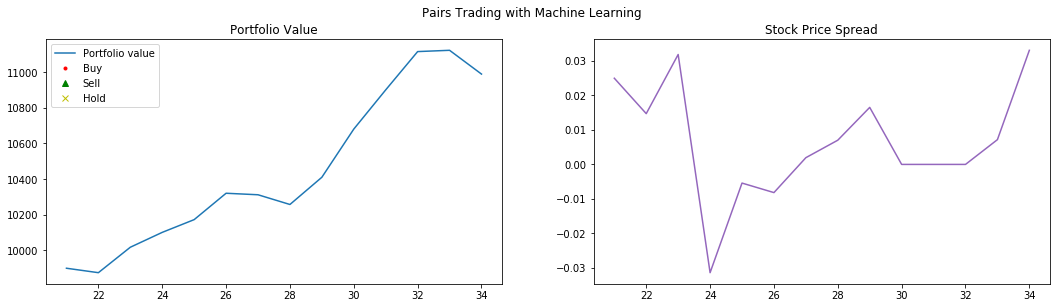

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22884619 0.22888151 0.22821805]
 [0.3312923  0.3308067  0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.32674736 0.32516277 0.32795364]
 [0.33259657 0.331732   0.3329326 ]
 [0.33967906 0.33919016 0.3408382 ]
 [0.31426686 0.3137335  0.31422168]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.3476334 ]
 [0.34492475 0.3449172  0.3455254 ]
 [0.33206627 0.32967693 0.3341284 ]
 [0.3320873  0.3309915  0.33292264]
 [0.3171997  0.3173863  0.31766137]
 [0.31850988 0.31837115 0.31837776]], shape=(14, 3), dtype=float32)


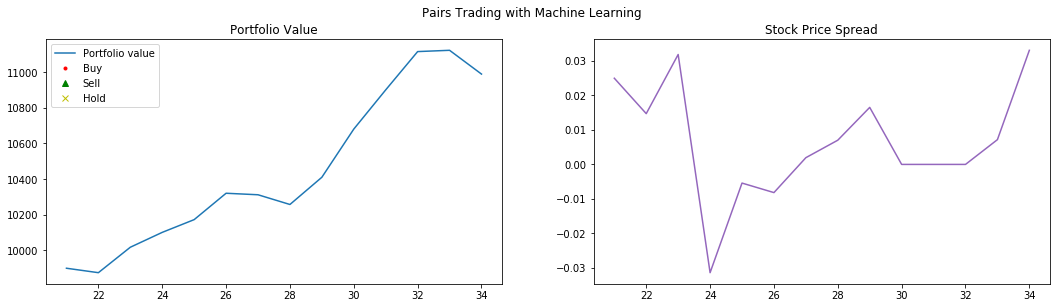

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22890224 0.22893755 0.22827409]
 [0.3312923  0.3308067  0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.32681346 0.32522887 0.32801974]
 [0.3326291  0.33176455 0.33296514]
 [0.33975732 0.33926842 0.34091645]
 [0.31431562 0.31378224 0.31427044]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.3476334 ]
 [0.34493425 0.3449267  0.34553492]
 [0.33207846 0.32968912 0.3341406 ]
 [0.3321235  0.3310277  0.33295882]
 [0.31722143 0.31740803 0.3176831 ]
 [0.31858942 0.3184507  0.3184573 ]], shape=(14, 3), dtype=float32)


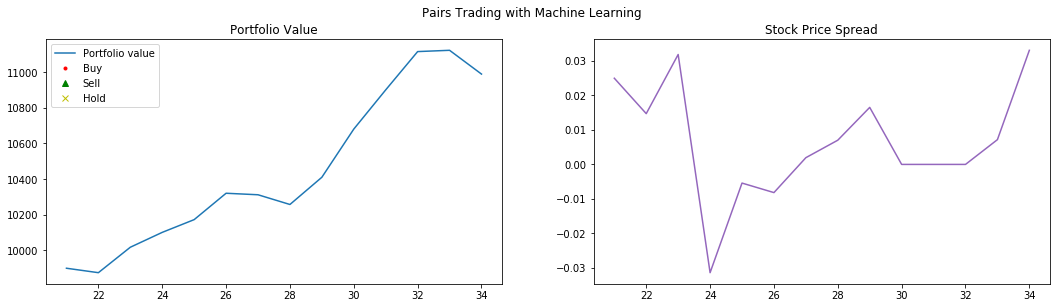

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2288836  0.22891891 0.22825545]
 [0.3312923  0.3308067  0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.32681248 0.3252279  0.32801875]
 [0.33259502 0.33173046 0.33293104]
 [0.33971107 0.33922216 0.3408702 ]
 [0.31427643 0.31374305 0.31423125]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.3476334 ]
 [0.34488592 0.34487838 0.34548658]
 [0.33200413 0.3296148  0.33406627]
 [0.33214557 0.33104977 0.3329809 ]
 [0.31718346 0.31737006 0.31764513]
 [0.31858772 0.318449   0.3184556 ]], shape=(14, 3), dtype=float32)


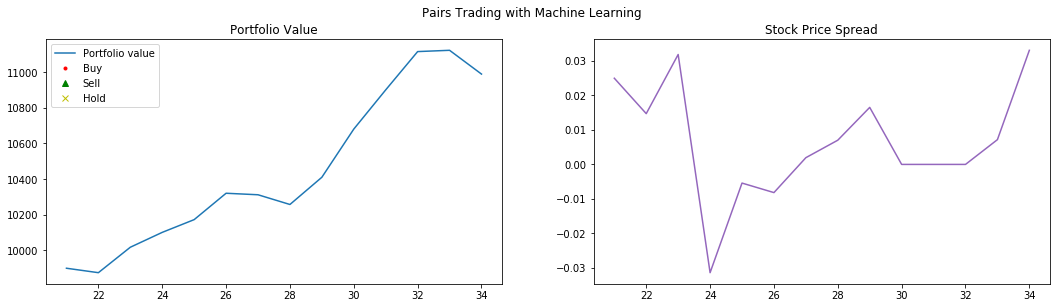

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22886188 0.2288972  0.22823374]
 [0.3312923  0.3308067  0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.3268193  0.3252347  0.32802558]
 [0.3325887  0.33172414 0.33292472]
 [0.33967927 0.33919036 0.3408384 ]
 [0.31427598 0.3137426  0.31423083]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.3476334 ]
 [0.34483755 0.34483    0.3454382 ]
 [0.33196583 0.3295765  0.33402798]
 [0.33216742 0.33107162 0.33300275]
 [0.31712627 0.31731287 0.31758794]
 [0.31857643 0.3184377  0.3184443 ]], shape=(14, 3), dtype=float32)


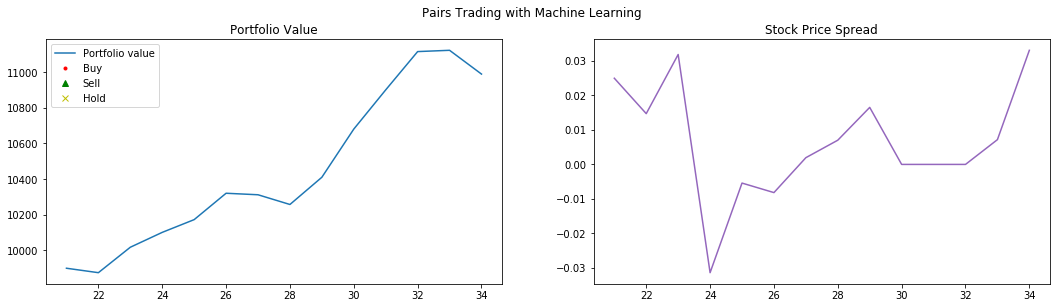

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22889425 0.22892956 0.2282661 ]
 [0.3312923  0.3308067  0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.3268605  0.3252759  0.32806677]
 [0.33259487 0.3317303  0.3329309 ]
 [0.33967227 0.33918336 0.3408314 ]
 [0.31426978 0.3137364  0.31422463]
 [0.3280116  0.32812214 0.32799867]
 [0.34889287 0.34814286 0.3476334 ]
 [0.34485793 0.3448504  0.3454586 ]
 [0.3319164  0.32952705 0.33397853]
 [0.33216697 0.3310712  0.33300233]
 [0.31709242 0.317279   0.3175541 ]
 [0.3186165  0.31847778 0.3184844 ]], shape=(14, 3), dtype=float32)


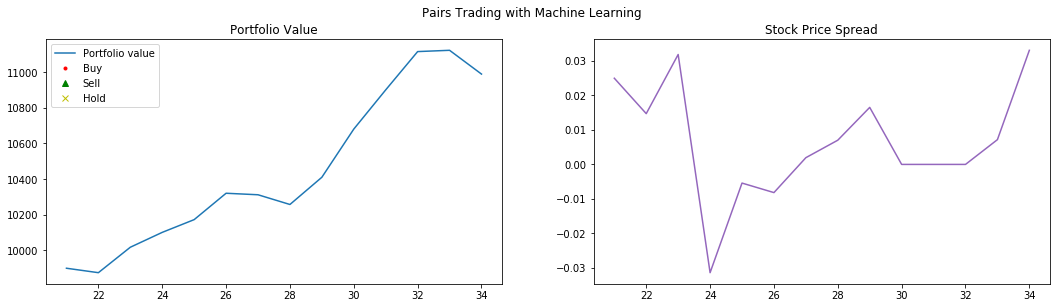

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22893003 0.22896534 0.22830188]
 [0.3312923  0.3308067  0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.3268785  0.3252939  0.32808477]
 [0.33262008 0.33175552 0.3329561 ]
 [0.33971587 0.33922696 0.340875  ]
 [0.31428766 0.3137543  0.3142425 ]
 [0.3280116  0.32812214 0.32799867]
 [0.3488929  0.3481429  0.34763342]
 [0.34489134 0.3448838  0.345492  ]
 [0.33189884 0.3295095  0.33396098]
 [0.3321535  0.3310577  0.33298883]
 [0.3170719  0.3172585  0.31753358]
 [0.31866732 0.3185286  0.3185352 ]], shape=(14, 3), dtype=float32)


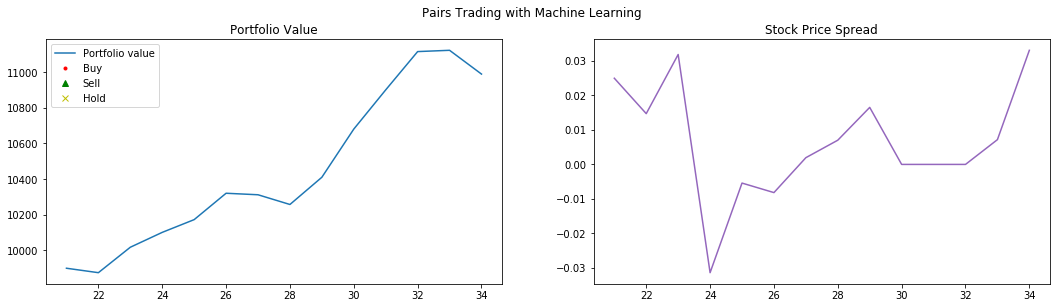

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22894971 0.22898503 0.22832157]
 [0.3312923  0.3308067  0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.3268645  0.32527992 0.3280708 ]
 [0.33265755 0.33179298 0.33299357]
 [0.33978787 0.33929896 0.340947  ]
 [0.31432518 0.3137918  0.31428003]
 [0.3280116  0.32812214 0.32799867]
 [0.3488929  0.3481429  0.34763342]
 [0.34489888 0.34489134 0.34549955]
 [0.33189896 0.32950962 0.3339611 ]
 [0.33213755 0.33104175 0.33297288]
 [0.31702924 0.31721583 0.3174909 ]
 [0.31869993 0.3185612  0.3185678 ]], shape=(14, 3), dtype=float32)


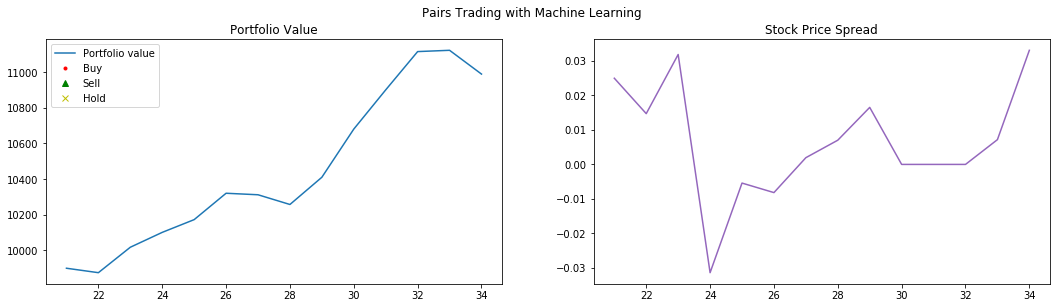

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22895691 0.22899222 0.22832876]
 [0.3312923  0.3308067  0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.3268206  0.32523602 0.3280269 ]
 [0.33264738 0.33178285 0.3329834 ]
 [0.339787   0.3392981  0.34094614]
 [0.31435096 0.3138176  0.3143058 ]
 [0.3280116  0.3281221  0.32799864]
 [0.3488929  0.34814286 0.34763342]
 [0.34488982 0.34488228 0.3454905 ]
 [0.33189076 0.32950142 0.3339529 ]
 [0.3320932  0.3309974  0.33292854]
 [0.3169509  0.31713748 0.31741256]
 [0.31870747 0.31856874 0.31857535]], shape=(14, 3), dtype=float32)


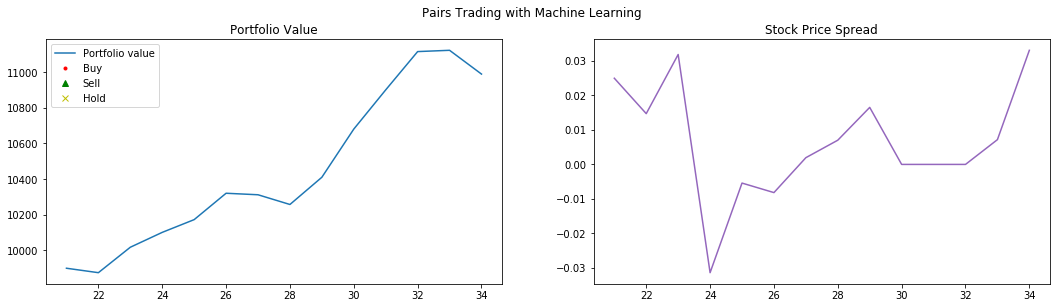

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22897315 0.22900847 0.228345  ]
 [0.3312923  0.3308067  0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.3268091  0.32522452 0.3280154 ]
 [0.33263952 0.33177498 0.33297554]
 [0.339773   0.3392841  0.34093213]
 [0.31439894 0.3138656  0.31435376]
 [0.3280116  0.3281221  0.32799864]
 [0.3488929  0.34814286 0.34763342]
 [0.3448839  0.34487635 0.34548455]
 [0.33190814 0.3295188  0.33397028]
 [0.332051   0.3309552  0.33288634]
 [0.31687745 0.31706405 0.31733912]
 [0.31870493 0.3185662  0.31857282]], shape=(14, 3), dtype=float32)


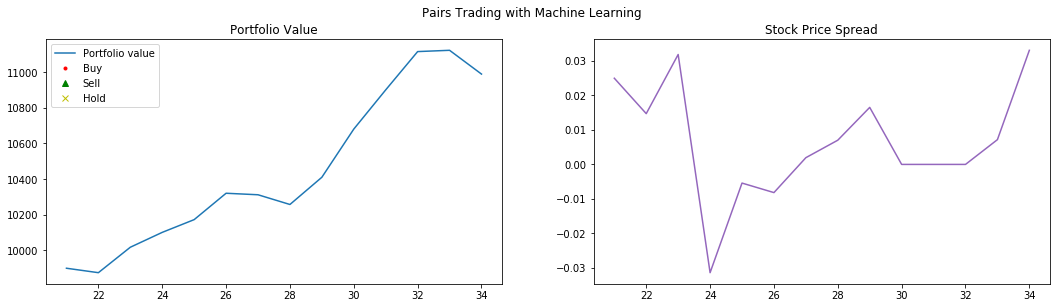

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22896546 0.22900078 0.22833732]
 [0.3312923  0.3308067  0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.32680163 0.32521704 0.3280079 ]
 [0.3326117  0.33174717 0.33294773]
 [0.3397318  0.3392429  0.34089094]
 [0.31439966 0.3138663  0.31435448]
 [0.3280116  0.3281221  0.32799864]
 [0.3488929  0.34814286 0.34763342]
 [0.34484798 0.34484044 0.34544864]
 [0.33187217 0.32948282 0.3339343 ]
 [0.3320148  0.330919   0.33285013]
 [0.31680208 0.31698868 0.31726375]
 [0.31867537 0.31853664 0.31854326]], shape=(14, 3), dtype=float32)


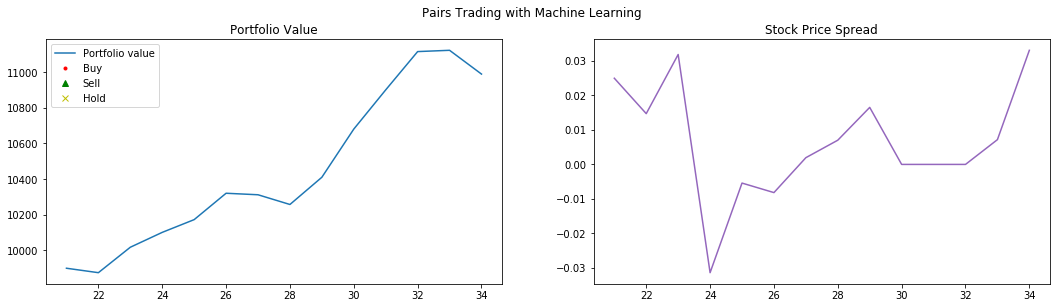

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22897601 0.22901133 0.22834787]
 [0.3312923  0.3308067  0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.32682988 0.3252453  0.32803616]
 [0.33262458 0.33176005 0.3329606 ]
 [0.33978844 0.33929953 0.34094757]
 [0.31442457 0.3138912  0.3143794 ]
 [0.3280116  0.3281221  0.32799864]
 [0.3488929  0.34814286 0.34763342]
 [0.34482077 0.34481323 0.34542143]
 [0.33186454 0.3294752  0.33392668]
 [0.33203775 0.33094195 0.33287308]
 [0.316776   0.3169626  0.31723768]
 [0.3187072  0.31856844 0.31857508]], shape=(14, 3), dtype=float32)


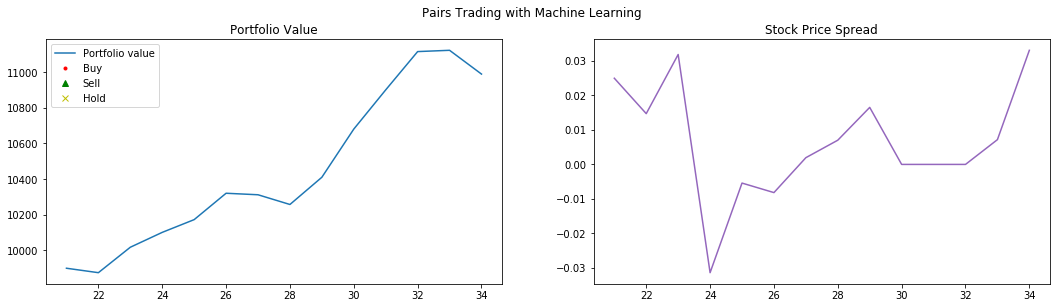

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2290053  0.22904062 0.22837716]
 [0.3312923  0.3308067  0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.32687    0.3252854  0.32807627]
 [0.33267987 0.33181533 0.3330159 ]
 [0.3398505  0.33936158 0.34100962]
 [0.31446734 0.31393397 0.31442216]
 [0.3280116  0.3281221  0.32799864]
 [0.34889293 0.3481429  0.34763342]
 [0.3448178  0.34481022 0.34541842]
 [0.33187336 0.32948402 0.3339355 ]
 [0.33211744 0.33102164 0.33295277]
 [0.31677157 0.31695816 0.31723323]
 [0.31876162 0.31862286 0.3186295 ]], shape=(14, 3), dtype=float32)


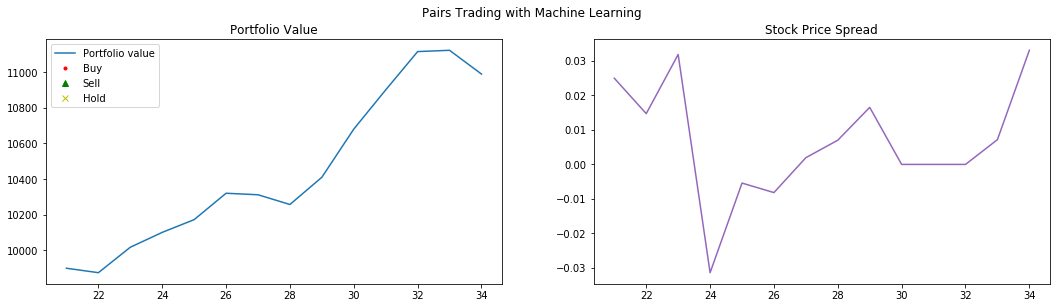

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22902372 0.22905907 0.22839561]
 [0.3312923  0.3308067  0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.32689235 0.32530776 0.32809862]
 [0.3326916  0.33182707 0.33302763]
 [0.33985886 0.33936992 0.34101796]
 [0.31448936 0.313956   0.31444418]
 [0.3280116  0.3281221  0.32799864]
 [0.34889305 0.348143   0.34763354]
 [0.3448103  0.34480274 0.34541094]
 [0.33186197 0.32947263 0.3339241 ]
 [0.3321816  0.33108583 0.33301693]
 [0.31676477 0.31695136 0.31722644]
 [0.3188048  0.31866604 0.3186727 ]], shape=(14, 3), dtype=float32)


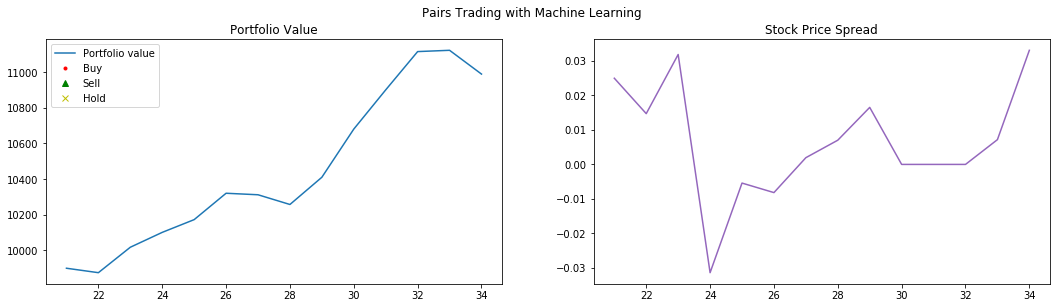

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22898674 0.22902209 0.22835863]
 [0.3312923  0.3308067  0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.32687587 0.32529128 0.32808214]
 [0.33262166 0.33175713 0.33295768]
 [0.33981386 0.33932492 0.34097296]
 [0.31448293 0.31394956 0.31443775]
 [0.3280116  0.3281221  0.32799864]
 [0.34889305 0.348143   0.34763354]
 [0.34475607 0.3447485  0.3453567 ]
 [0.33183673 0.3294474  0.33389887]
 [0.33219698 0.3311012  0.3330323 ]
 [0.31668434 0.31687093 0.317146  ]
 [0.31878987 0.3186511  0.31865776]], shape=(14, 3), dtype=float32)


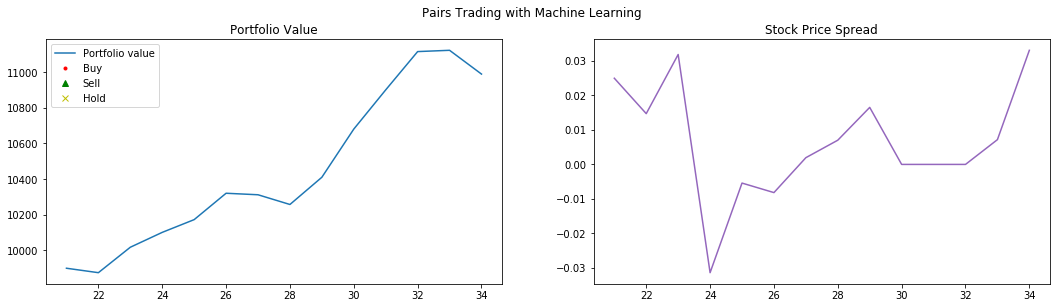

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22899774 0.22903308 0.22836962]
 [0.3312923  0.3308067  0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.3269098  0.32532522 0.3281161 ]
 [0.33256465 0.33170012 0.33290067]
 [0.33983636 0.33934742 0.34099546]
 [0.31454876 0.3140154  0.31450358]
 [0.3280116  0.3281221  0.32799864]
 [0.34889305 0.348143   0.34763354]
 [0.34473947 0.34473193 0.3453401 ]
 [0.33185974 0.3294704  0.33392188]
 [0.33219627 0.3311005  0.3330316 ]
 [0.31666434 0.31685093 0.317126  ]
 [0.31883067 0.3186919  0.31869856]], shape=(14, 3), dtype=float32)


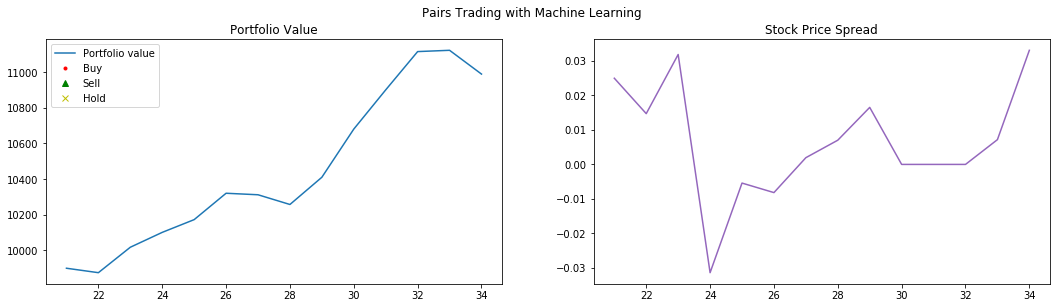

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22907506 0.2291104  0.22844695]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32698745 0.32540286 0.32819372]
 [0.3325808  0.33171627 0.33291683]
 [0.33994278 0.33945385 0.34110188]
 [0.31468618 0.3141528  0.314641  ]
 [0.3280116  0.3281221  0.32799864]
 [0.34889305 0.348143   0.34763354]
 [0.3447764  0.34476885 0.34537703]
 [0.33195037 0.329561   0.33401248]
 [0.3322019  0.33110613 0.33303723]
 [0.31669885 0.31688544 0.31716052]
 [0.3189274  0.31878865 0.3187953 ]], shape=(14, 3), dtype=float32)


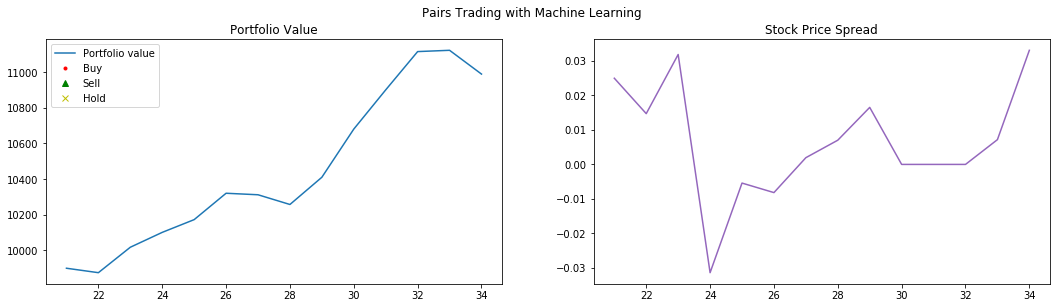

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22904712 0.22908247 0.228419  ]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32696903 0.32538444 0.3281753 ]
 [0.3325296  0.33166504 0.3328656 ]
 [0.3399609  0.33947197 0.34112   ]
 [0.31471103 0.31417766 0.31466585]
 [0.32801163 0.32812214 0.32799864]
 [0.34889305 0.348143   0.34763354]
 [0.34473056 0.34472302 0.3453312 ]
 [0.33193916 0.3295498  0.33400127]
 [0.33216202 0.33106625 0.33299735]
 [0.31664956 0.31683615 0.31711122]
 [0.31891742 0.31877866 0.3187853 ]], shape=(14, 3), dtype=float32)


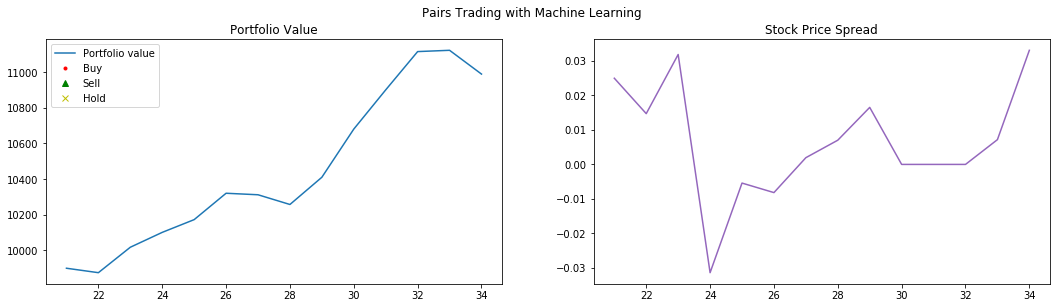

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22895578 0.22899112 0.22832766]
 [0.33129233 0.33080673 0.33035004]
 [0.34753048 0.3483785  0.347438  ]
 [0.32687578 0.3252912  0.32808205]
 [0.3324447  0.33158013 0.3327807 ]
 [0.33990222 0.33941326 0.3410613 ]
 [0.31465772 0.31412435 0.31461254]
 [0.32801163 0.32812214 0.32799864]
 [0.34889305 0.348143   0.3476335 ]
 [0.34462622 0.34461868 0.34522685]
 [0.33185598 0.3294666  0.3339181 ]
 [0.33208922 0.33099344 0.33292454]
 [0.31653577 0.31672236 0.31699744]
 [0.3188429  0.31870413 0.31871077]], shape=(14, 3), dtype=float32)


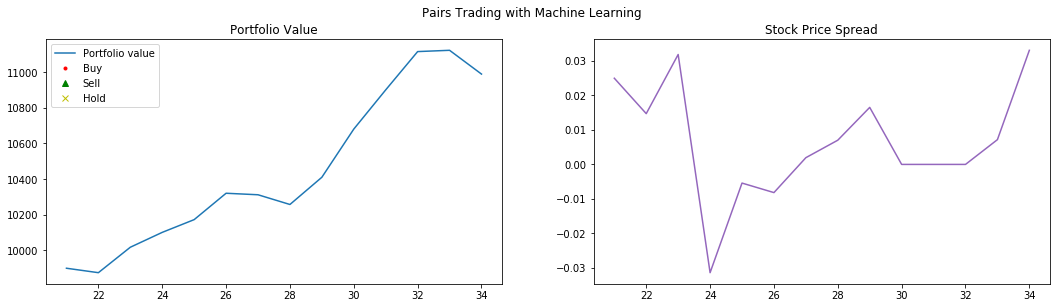

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.2289698  0.22900514 0.22834168]
 [0.3312923  0.33080673 0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.3268237  0.32523912 0.32803   ]
 [0.33244115 0.3315766  0.33277714]
 [0.33990496 0.33941603 0.34106404]
 [0.31462532 0.31409195 0.31458014]
 [0.32801163 0.32812214 0.32799864]
 [0.34889305 0.34814298 0.3476335 ]
 [0.34461522 0.34460768 0.34521586]
 [0.3317855  0.32939613 0.3338476 ]
 [0.33204016 0.33094436 0.33287546]
 [0.31644443 0.31663102 0.31690606]
 [0.31886542 0.31872666 0.3187333 ]], shape=(14, 3), dtype=float32)


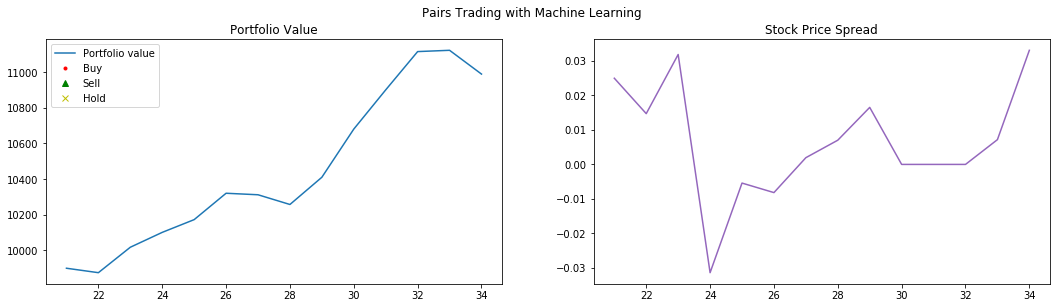

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22910318 0.22913852 0.22847506]
 [0.3312923  0.33080673 0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.32685772 0.32527313 0.328064  ]
 [0.33247766 0.3316131  0.33281365]
 [0.3399663  0.33947733 0.34112537]
 [0.3146299  0.31409654 0.31458473]
 [0.32801163 0.32812214 0.32799864]
 [0.34889305 0.34814298 0.3476335 ]
 [0.34472194 0.3447144  0.34532258]
 [0.33175024 0.32936087 0.33381236]
 [0.33201933 0.33092353 0.33285463]
 [0.31645605 0.31664264 0.3169177 ]
 [0.31897745 0.3188387  0.31884533]], shape=(14, 3), dtype=float32)


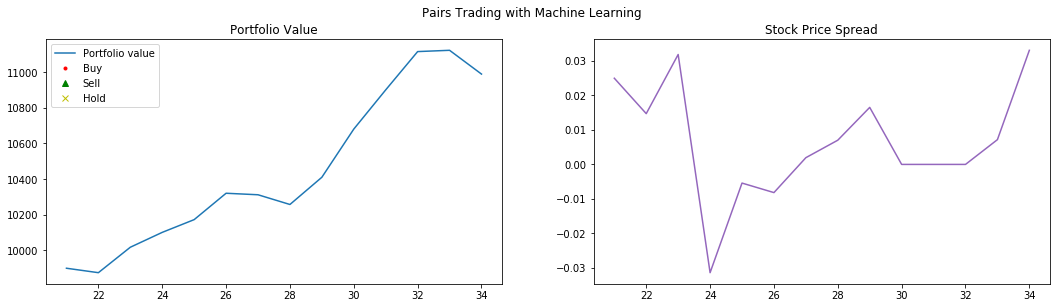

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22921723 0.22925258 0.22858912]
 [0.3312923  0.33080673 0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.32691133 0.32532674 0.3281176 ]
 [0.33251637 0.3316518  0.33285236]
 [0.34005743 0.33956847 0.3412165 ]
 [0.31467018 0.3141368  0.314625  ]
 [0.32801163 0.32812214 0.32799864]
 [0.34889305 0.34814298 0.3476335 ]
 [0.34480947 0.34480193 0.3454101 ]
 [0.33174908 0.3293597  0.3338112 ]
 [0.33204523 0.33094943 0.33288053]
 [0.3164948  0.31668139 0.31695643]
 [0.31906992 0.31893116 0.3189378 ]], shape=(14, 3), dtype=float32)


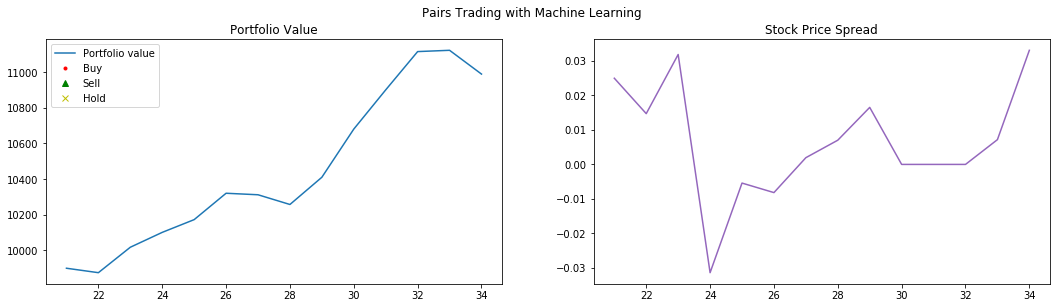

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
distribute
No distribtion
No distribtion
distribute
tf.Tensor(
[[0.22922784 0.22926319 0.22859973]
 [0.3312923  0.33080673 0.33035   ]
 [0.34753048 0.3483785  0.347438  ]
 [0.32689577 0.32531118 0.32810205]
 [0.3325021  0.33163753 0.3328381 ]
 [0.34007037 0.33958137 0.34122944]
 [0.31466925 0.31413588 0.31462407]
 [0.32801163 0.32812214 0.32799864]
 [0.34889305 0.34814298 0.3476335 ]
 [0.34479874 0.3447912  0.34539938]
 [0.33172083 0.32933146 0.33378294]
 [0.3320634  0.3309676  0.3328987 ]
 [0.31643242 0.316619   0.31689405]
 [0.3190618  0.31892303 0.31892967]], shape=(14, 3), dtype=float32)


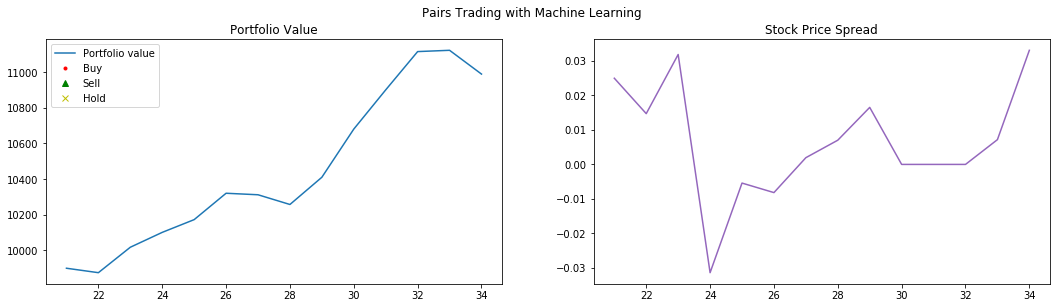

distribute
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion
No distribtion


KeyboardInterrupt: 

In [149]:
action_history = []

obs = env.reset()
running_reward = 0
gamma = 0.99
for episode in range(0, 1000):
    obs = env.reset()
    obs_history = []
    model.reset()
    reward = 0
    done = False
    counter = 0
    while not done and counter < 14:
        
        state_value, actionProb = model.predict(obs)
        obs, reward, done, msg = env.step(actionProb)
        obs_history.append(obs[None, :][0])
        
        model.saved_actions.append(action)
        model.saved_values.append(state_value[0][0])
        model.rewards.append(reward)
        if done:
            break
        counter+=1
    model.train(obs_history)
    
    env.render()
